Consider I have a random matrix. Find the distribution of the eigenvalues given the distribution of elements in the matrix. 

In [99]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

I can estimate the distribution of the eigenvalues by simulating the random variables and calculating the distribution of the eigenvalues by monte carlo method 


In [2]:
samples = 100000
x1_array = np.random.normal(0, 1, samples)
x2_array = np.random.normal(0, 1, samples)
x3_array = np.random.normal(0, 0.1, samples)
x4_array = np.random.normal(0, 1, samples)


In [78]:
eigenvalues = np.zeros((samples,2),dtype=complex)

for i in range(0, samples):
    random_matrix = np.array([[x1_array[i], x3_array[i]], [x3_array[i], x4_array[i]]])
    eigen = np.linalg.eigvals(random_matrix)
    eigen = np.sort_complex(eigen)
    eigenvalues[i] = eigen
print(eigenvalues.shape)
print(eigenvalues)

(100000, 2)
[[-0.17696448+0.j  1.10511139+0.j]
 [ 0.21461377+0.j  2.41447478+0.j]
 [-2.72222464+0.j -0.39274523+0.j]
 ...
 [ 0.3755242 +0.j  1.76707986+0.j]
 [ 0.49667753+0.j  0.93701772+0.j]
 [-1.4245597 +0.j -0.75924597+0.j]]


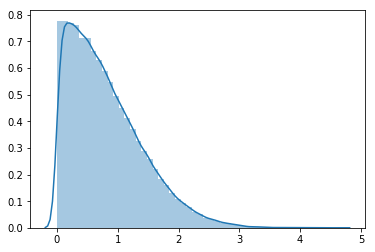

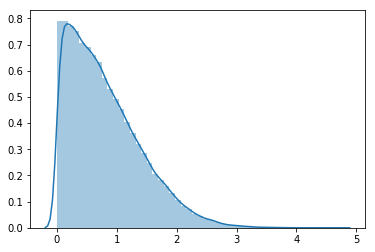

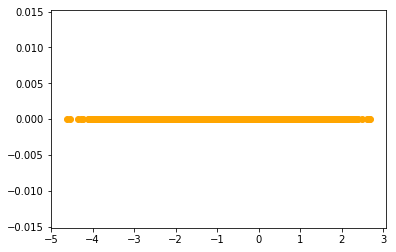

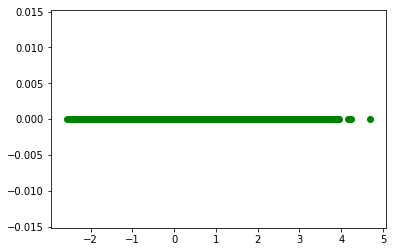

In [79]:
X = eigenvalues.real
Y = eigenvalues.imag
Z = np.power(np.power(X,2) + np.power(Y,2), 0.5)
sns.distplot(Z[:, 0])
plt.show()
sns.distplot(Z[:, 1])
plt.show()
plt.scatter(X[:, 0],Y[:, 0], color = 'orange')

plt.show()
plt.scatter(X[:, 1],Y[:, 1], color = 'green')
plt.show()

### Distribution of eigenvalues in $N \times N$ matrices

In [142]:
# Simulate an n * n iid random matrix with gaussian random variable 
def mesh(reduced_data, kmeans, count):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    filename = "figure" + str(count) + ".png"
#     plt.savefig(filename, bbox_inches='tight')
    plt.show()
    


In [160]:
n = int(input("Tell me the shape of the matrix: "))
from sklearn.svm import SVC as SVM
sample = 100000
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

coefficient_matrix = np.array([[0, 0]])
for j in range(sample):
    matrix = np.random.normal(0, 1, n*n)
    matrix = np.reshape(matrix, (n, n))

    # Applying Singular Value Decomposition on the above matrix 
    U, S, V_t = np.linalg.svd(matrix, full_matrices=False)
    S = np.diag(S)
    eigenvectors = np.dot(matrix, V_t.T)
#     print(eigenvectors)
    # Select the first two principal components
    two_principal = eigenvectors[:, :2] 
    
    X = two_principal[:, 0]
    Y = two_principal[:, 1]
    X_new = np.array([[X[0], Y[0]]])
    
    for i in range(1, X.shape[0]):
        X_new = np.vstack((X_new, np.array([X[i], Y[i]])))
        
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X_new)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    SVC_class = SVM(kernel='linear')
    SVC_class.fit(X_new, labels)
#     print(type(SVC_class.coef_))
#     print(SVC_class.intercept_)
#     print("The Boundaries are shown below")
#     mesh(two_principal, kmeans, j)
#     plt.scatter(X_new[:, 0], X_new[:, 1], c=labels, s=50, cmap='autumn')
#     plot_svc_decision_function(SVC_class)
    print("Sampling: ", j)
    coefficient_matrix = np.vstack((coefficient_matrix, SVC_class.coef_))

coefficient_matrix = coefficient_matrix[1:, :]
print(coefficient_matrix)


Tell me the shape of the matrix: 25
Sampling:  0
Sampling:  1
Sampling:  2
Sampling:  3
Sampling:  4
Sampling:  5
Sampling:  6
Sampling:  7
Sampling:  8
Sampling:  9
Sampling:  10
Sampling:  11
Sampling:  12
Sampling:  13
Sampling:  14
Sampling:  15
Sampling:  16
Sampling:  17
Sampling:  18
Sampling:  19
Sampling:  20
Sampling:  21
Sampling:  22
Sampling:  23
Sampling:  24
Sampling:  25
Sampling:  26
Sampling:  27
Sampling:  28
Sampling:  29
Sampling:  30
Sampling:  31
Sampling:  32
Sampling:  33
Sampling:  34
Sampling:  35
Sampling:  36
Sampling:  37
Sampling:  38
Sampling:  39
Sampling:  40
Sampling:  41
Sampling:  42
Sampling:  43
Sampling:  44
Sampling:  45
Sampling:  46
Sampling:  47
Sampling:  48
Sampling:  49
Sampling:  50
Sampling:  51
Sampling:  52
Sampling:  53
Sampling:  54
Sampling:  55
Sampling:  56
Sampling:  57
Sampling:  58
Sampling:  59
Sampling:  60
Sampling:  61
Sampling:  62
Sampling:  63
Sampling:  64
Sampling:  65
Sampling:  66
Sampling:  67
Sampling:  68
Sampling

Sampling:  555
Sampling:  556
Sampling:  557
Sampling:  558
Sampling:  559
Sampling:  560
Sampling:  561
Sampling:  562
Sampling:  563
Sampling:  564
Sampling:  565
Sampling:  566
Sampling:  567
Sampling:  568
Sampling:  569
Sampling:  570
Sampling:  571
Sampling:  572
Sampling:  573
Sampling:  574
Sampling:  575
Sampling:  576
Sampling:  577
Sampling:  578
Sampling:  579
Sampling:  580
Sampling:  581
Sampling:  582
Sampling:  583
Sampling:  584
Sampling:  585
Sampling:  586
Sampling:  587
Sampling:  588
Sampling:  589
Sampling:  590
Sampling:  591
Sampling:  592
Sampling:  593
Sampling:  594
Sampling:  595
Sampling:  596
Sampling:  597
Sampling:  598
Sampling:  599
Sampling:  600
Sampling:  601
Sampling:  602
Sampling:  603
Sampling:  604
Sampling:  605
Sampling:  606
Sampling:  607
Sampling:  608
Sampling:  609
Sampling:  610
Sampling:  611
Sampling:  612
Sampling:  613
Sampling:  614
Sampling:  615
Sampling:  616
Sampling:  617
Sampling:  618
Sampling:  619
Sampling:  620
Sampling: 

Sampling:  1095
Sampling:  1096
Sampling:  1097
Sampling:  1098
Sampling:  1099
Sampling:  1100
Sampling:  1101
Sampling:  1102
Sampling:  1103
Sampling:  1104
Sampling:  1105
Sampling:  1106
Sampling:  1107
Sampling:  1108
Sampling:  1109
Sampling:  1110
Sampling:  1111
Sampling:  1112
Sampling:  1113
Sampling:  1114
Sampling:  1115
Sampling:  1116
Sampling:  1117
Sampling:  1118
Sampling:  1119
Sampling:  1120
Sampling:  1121
Sampling:  1122
Sampling:  1123
Sampling:  1124
Sampling:  1125
Sampling:  1126
Sampling:  1127
Sampling:  1128
Sampling:  1129
Sampling:  1130
Sampling:  1131
Sampling:  1132
Sampling:  1133
Sampling:  1134
Sampling:  1135
Sampling:  1136
Sampling:  1137
Sampling:  1138
Sampling:  1139
Sampling:  1140
Sampling:  1141
Sampling:  1142
Sampling:  1143
Sampling:  1144
Sampling:  1145
Sampling:  1146
Sampling:  1147
Sampling:  1148
Sampling:  1149
Sampling:  1150
Sampling:  1151
Sampling:  1152
Sampling:  1153
Sampling:  1154
Sampling:  1155
Sampling:  1156
Sampling

Sampling:  1613
Sampling:  1614
Sampling:  1615
Sampling:  1616
Sampling:  1617
Sampling:  1618
Sampling:  1619
Sampling:  1620
Sampling:  1621
Sampling:  1622
Sampling:  1623
Sampling:  1624
Sampling:  1625
Sampling:  1626
Sampling:  1627
Sampling:  1628
Sampling:  1629
Sampling:  1630
Sampling:  1631
Sampling:  1632
Sampling:  1633
Sampling:  1634
Sampling:  1635
Sampling:  1636
Sampling:  1637
Sampling:  1638
Sampling:  1639
Sampling:  1640
Sampling:  1641
Sampling:  1642
Sampling:  1643
Sampling:  1644
Sampling:  1645
Sampling:  1646
Sampling:  1647
Sampling:  1648
Sampling:  1649
Sampling:  1650
Sampling:  1651
Sampling:  1652
Sampling:  1653
Sampling:  1654
Sampling:  1655
Sampling:  1656
Sampling:  1657
Sampling:  1658
Sampling:  1659
Sampling:  1660
Sampling:  1661
Sampling:  1662
Sampling:  1663
Sampling:  1664
Sampling:  1665
Sampling:  1666
Sampling:  1667
Sampling:  1668
Sampling:  1669
Sampling:  1670
Sampling:  1671
Sampling:  1672
Sampling:  1673
Sampling:  1674
Sampling

Sampling:  2136
Sampling:  2137
Sampling:  2138
Sampling:  2139
Sampling:  2140
Sampling:  2141
Sampling:  2142
Sampling:  2143
Sampling:  2144
Sampling:  2145
Sampling:  2146
Sampling:  2147
Sampling:  2148
Sampling:  2149
Sampling:  2150
Sampling:  2151
Sampling:  2152
Sampling:  2153
Sampling:  2154
Sampling:  2155
Sampling:  2156
Sampling:  2157
Sampling:  2158
Sampling:  2159
Sampling:  2160
Sampling:  2161
Sampling:  2162
Sampling:  2163
Sampling:  2164
Sampling:  2165
Sampling:  2166
Sampling:  2167
Sampling:  2168
Sampling:  2169
Sampling:  2170
Sampling:  2171
Sampling:  2172
Sampling:  2173
Sampling:  2174
Sampling:  2175
Sampling:  2176
Sampling:  2177
Sampling:  2178
Sampling:  2179
Sampling:  2180
Sampling:  2181
Sampling:  2182
Sampling:  2183
Sampling:  2184
Sampling:  2185
Sampling:  2186
Sampling:  2187
Sampling:  2188
Sampling:  2189
Sampling:  2190
Sampling:  2191
Sampling:  2192
Sampling:  2193
Sampling:  2194
Sampling:  2195
Sampling:  2196
Sampling:  2197
Sampling

Sampling:  2654
Sampling:  2655
Sampling:  2656
Sampling:  2657
Sampling:  2658
Sampling:  2659
Sampling:  2660
Sampling:  2661
Sampling:  2662
Sampling:  2663
Sampling:  2664
Sampling:  2665
Sampling:  2666
Sampling:  2667
Sampling:  2668
Sampling:  2669
Sampling:  2670
Sampling:  2671
Sampling:  2672
Sampling:  2673
Sampling:  2674
Sampling:  2675
Sampling:  2676
Sampling:  2677
Sampling:  2678
Sampling:  2679
Sampling:  2680
Sampling:  2681
Sampling:  2682
Sampling:  2683
Sampling:  2684
Sampling:  2685
Sampling:  2686
Sampling:  2687
Sampling:  2688
Sampling:  2689
Sampling:  2690
Sampling:  2691
Sampling:  2692
Sampling:  2693
Sampling:  2694
Sampling:  2695
Sampling:  2696
Sampling:  2697
Sampling:  2698
Sampling:  2699
Sampling:  2700
Sampling:  2701
Sampling:  2702
Sampling:  2703
Sampling:  2704
Sampling:  2705
Sampling:  2706
Sampling:  2707
Sampling:  2708
Sampling:  2709
Sampling:  2710
Sampling:  2711
Sampling:  2712
Sampling:  2713
Sampling:  2714
Sampling:  2715
Sampling

Sampling:  3167
Sampling:  3168
Sampling:  3169
Sampling:  3170
Sampling:  3171
Sampling:  3172
Sampling:  3173
Sampling:  3174
Sampling:  3175
Sampling:  3176
Sampling:  3177
Sampling:  3178
Sampling:  3179
Sampling:  3180
Sampling:  3181
Sampling:  3182
Sampling:  3183
Sampling:  3184
Sampling:  3185
Sampling:  3186
Sampling:  3187
Sampling:  3188
Sampling:  3189
Sampling:  3190
Sampling:  3191
Sampling:  3192
Sampling:  3193
Sampling:  3194
Sampling:  3195
Sampling:  3196
Sampling:  3197
Sampling:  3198
Sampling:  3199
Sampling:  3200
Sampling:  3201
Sampling:  3202
Sampling:  3203
Sampling:  3204
Sampling:  3205
Sampling:  3206
Sampling:  3207
Sampling:  3208
Sampling:  3209
Sampling:  3210
Sampling:  3211
Sampling:  3212
Sampling:  3213
Sampling:  3214
Sampling:  3215
Sampling:  3216
Sampling:  3217
Sampling:  3218
Sampling:  3219
Sampling:  3220
Sampling:  3221
Sampling:  3222
Sampling:  3223
Sampling:  3224
Sampling:  3225
Sampling:  3226
Sampling:  3227
Sampling:  3228
Sampling

Sampling:  3683
Sampling:  3684
Sampling:  3685
Sampling:  3686
Sampling:  3687
Sampling:  3688
Sampling:  3689
Sampling:  3690
Sampling:  3691
Sampling:  3692
Sampling:  3693
Sampling:  3694
Sampling:  3695
Sampling:  3696
Sampling:  3697
Sampling:  3698
Sampling:  3699
Sampling:  3700
Sampling:  3701
Sampling:  3702
Sampling:  3703
Sampling:  3704
Sampling:  3705
Sampling:  3706
Sampling:  3707
Sampling:  3708
Sampling:  3709
Sampling:  3710
Sampling:  3711
Sampling:  3712
Sampling:  3713
Sampling:  3714
Sampling:  3715
Sampling:  3716
Sampling:  3717
Sampling:  3718
Sampling:  3719
Sampling:  3720
Sampling:  3721
Sampling:  3722
Sampling:  3723
Sampling:  3724
Sampling:  3725
Sampling:  3726
Sampling:  3727
Sampling:  3728
Sampling:  3729
Sampling:  3730
Sampling:  3731
Sampling:  3732
Sampling:  3733
Sampling:  3734
Sampling:  3735
Sampling:  3736
Sampling:  3737
Sampling:  3738
Sampling:  3739
Sampling:  3740
Sampling:  3741
Sampling:  3742
Sampling:  3743
Sampling:  3744
Sampling

Sampling:  4206
Sampling:  4207
Sampling:  4208
Sampling:  4209
Sampling:  4210
Sampling:  4211
Sampling:  4212
Sampling:  4213
Sampling:  4214
Sampling:  4215
Sampling:  4216
Sampling:  4217
Sampling:  4218
Sampling:  4219
Sampling:  4220
Sampling:  4221
Sampling:  4222
Sampling:  4223
Sampling:  4224
Sampling:  4225
Sampling:  4226
Sampling:  4227
Sampling:  4228
Sampling:  4229
Sampling:  4230
Sampling:  4231
Sampling:  4232
Sampling:  4233
Sampling:  4234
Sampling:  4235
Sampling:  4236
Sampling:  4237
Sampling:  4238
Sampling:  4239
Sampling:  4240
Sampling:  4241
Sampling:  4242
Sampling:  4243
Sampling:  4244
Sampling:  4245
Sampling:  4246
Sampling:  4247
Sampling:  4248
Sampling:  4249
Sampling:  4250
Sampling:  4251
Sampling:  4252
Sampling:  4253
Sampling:  4254
Sampling:  4255
Sampling:  4256
Sampling:  4257
Sampling:  4258
Sampling:  4259
Sampling:  4260
Sampling:  4261
Sampling:  4262
Sampling:  4263
Sampling:  4264
Sampling:  4265
Sampling:  4266
Sampling:  4267
Sampling

Sampling:  4720
Sampling:  4721
Sampling:  4722
Sampling:  4723
Sampling:  4724
Sampling:  4725
Sampling:  4726
Sampling:  4727
Sampling:  4728
Sampling:  4729
Sampling:  4730
Sampling:  4731
Sampling:  4732
Sampling:  4733
Sampling:  4734
Sampling:  4735
Sampling:  4736
Sampling:  4737
Sampling:  4738
Sampling:  4739
Sampling:  4740
Sampling:  4741
Sampling:  4742
Sampling:  4743
Sampling:  4744
Sampling:  4745
Sampling:  4746
Sampling:  4747
Sampling:  4748
Sampling:  4749
Sampling:  4750
Sampling:  4751
Sampling:  4752
Sampling:  4753
Sampling:  4754
Sampling:  4755
Sampling:  4756
Sampling:  4757
Sampling:  4758
Sampling:  4759
Sampling:  4760
Sampling:  4761
Sampling:  4762
Sampling:  4763
Sampling:  4764
Sampling:  4765
Sampling:  4766
Sampling:  4767
Sampling:  4768
Sampling:  4769
Sampling:  4770
Sampling:  4771
Sampling:  4772
Sampling:  4773
Sampling:  4774
Sampling:  4775
Sampling:  4776
Sampling:  4777
Sampling:  4778
Sampling:  4779
Sampling:  4780
Sampling:  4781
Sampling

Sampling:  5234
Sampling:  5235
Sampling:  5236
Sampling:  5237
Sampling:  5238
Sampling:  5239
Sampling:  5240
Sampling:  5241
Sampling:  5242
Sampling:  5243
Sampling:  5244
Sampling:  5245
Sampling:  5246
Sampling:  5247
Sampling:  5248
Sampling:  5249
Sampling:  5250
Sampling:  5251
Sampling:  5252
Sampling:  5253
Sampling:  5254
Sampling:  5255
Sampling:  5256
Sampling:  5257
Sampling:  5258
Sampling:  5259
Sampling:  5260
Sampling:  5261
Sampling:  5262
Sampling:  5263
Sampling:  5264
Sampling:  5265
Sampling:  5266
Sampling:  5267
Sampling:  5268
Sampling:  5269
Sampling:  5270
Sampling:  5271
Sampling:  5272
Sampling:  5273
Sampling:  5274
Sampling:  5275
Sampling:  5276
Sampling:  5277
Sampling:  5278
Sampling:  5279
Sampling:  5280
Sampling:  5281
Sampling:  5282
Sampling:  5283
Sampling:  5284
Sampling:  5285
Sampling:  5286
Sampling:  5287
Sampling:  5288
Sampling:  5289
Sampling:  5290
Sampling:  5291
Sampling:  5292
Sampling:  5293
Sampling:  5294
Sampling:  5295
Sampling

Sampling:  5751
Sampling:  5752
Sampling:  5753
Sampling:  5754
Sampling:  5755
Sampling:  5756
Sampling:  5757
Sampling:  5758
Sampling:  5759
Sampling:  5760
Sampling:  5761
Sampling:  5762
Sampling:  5763
Sampling:  5764
Sampling:  5765
Sampling:  5766
Sampling:  5767
Sampling:  5768
Sampling:  5769
Sampling:  5770
Sampling:  5771
Sampling:  5772
Sampling:  5773
Sampling:  5774
Sampling:  5775
Sampling:  5776
Sampling:  5777
Sampling:  5778
Sampling:  5779
Sampling:  5780
Sampling:  5781
Sampling:  5782
Sampling:  5783
Sampling:  5784
Sampling:  5785
Sampling:  5786
Sampling:  5787
Sampling:  5788
Sampling:  5789
Sampling:  5790
Sampling:  5791
Sampling:  5792
Sampling:  5793
Sampling:  5794
Sampling:  5795
Sampling:  5796
Sampling:  5797
Sampling:  5798
Sampling:  5799
Sampling:  5800
Sampling:  5801
Sampling:  5802
Sampling:  5803
Sampling:  5804
Sampling:  5805
Sampling:  5806
Sampling:  5807
Sampling:  5808
Sampling:  5809
Sampling:  5810
Sampling:  5811
Sampling:  5812
Sampling

Sampling:  6271
Sampling:  6272
Sampling:  6273
Sampling:  6274
Sampling:  6275
Sampling:  6276
Sampling:  6277
Sampling:  6278
Sampling:  6279
Sampling:  6280
Sampling:  6281
Sampling:  6282
Sampling:  6283
Sampling:  6284
Sampling:  6285
Sampling:  6286
Sampling:  6287
Sampling:  6288
Sampling:  6289
Sampling:  6290
Sampling:  6291
Sampling:  6292
Sampling:  6293
Sampling:  6294
Sampling:  6295
Sampling:  6296
Sampling:  6297
Sampling:  6298
Sampling:  6299
Sampling:  6300
Sampling:  6301
Sampling:  6302
Sampling:  6303
Sampling:  6304
Sampling:  6305
Sampling:  6306
Sampling:  6307
Sampling:  6308
Sampling:  6309
Sampling:  6310
Sampling:  6311
Sampling:  6312
Sampling:  6313
Sampling:  6314
Sampling:  6315
Sampling:  6316
Sampling:  6317
Sampling:  6318
Sampling:  6319
Sampling:  6320
Sampling:  6321
Sampling:  6322
Sampling:  6323
Sampling:  6324
Sampling:  6325
Sampling:  6326
Sampling:  6327
Sampling:  6328
Sampling:  6329
Sampling:  6330
Sampling:  6331
Sampling:  6332
Sampling

Sampling:  6785
Sampling:  6786
Sampling:  6787
Sampling:  6788
Sampling:  6789
Sampling:  6790
Sampling:  6791
Sampling:  6792
Sampling:  6793
Sampling:  6794
Sampling:  6795
Sampling:  6796
Sampling:  6797
Sampling:  6798
Sampling:  6799
Sampling:  6800
Sampling:  6801
Sampling:  6802
Sampling:  6803
Sampling:  6804
Sampling:  6805
Sampling:  6806
Sampling:  6807
Sampling:  6808
Sampling:  6809
Sampling:  6810
Sampling:  6811
Sampling:  6812
Sampling:  6813
Sampling:  6814
Sampling:  6815
Sampling:  6816
Sampling:  6817
Sampling:  6818
Sampling:  6819
Sampling:  6820
Sampling:  6821
Sampling:  6822
Sampling:  6823
Sampling:  6824
Sampling:  6825
Sampling:  6826
Sampling:  6827
Sampling:  6828
Sampling:  6829
Sampling:  6830
Sampling:  6831
Sampling:  6832
Sampling:  6833
Sampling:  6834
Sampling:  6835
Sampling:  6836
Sampling:  6837
Sampling:  6838
Sampling:  6839
Sampling:  6840
Sampling:  6841
Sampling:  6842
Sampling:  6843
Sampling:  6844
Sampling:  6845
Sampling:  6846
Sampling

Sampling:  7301
Sampling:  7302
Sampling:  7303
Sampling:  7304
Sampling:  7305
Sampling:  7306
Sampling:  7307
Sampling:  7308
Sampling:  7309
Sampling:  7310
Sampling:  7311
Sampling:  7312
Sampling:  7313
Sampling:  7314
Sampling:  7315
Sampling:  7316
Sampling:  7317
Sampling:  7318
Sampling:  7319
Sampling:  7320
Sampling:  7321
Sampling:  7322
Sampling:  7323
Sampling:  7324
Sampling:  7325
Sampling:  7326
Sampling:  7327
Sampling:  7328
Sampling:  7329
Sampling:  7330
Sampling:  7331
Sampling:  7332
Sampling:  7333
Sampling:  7334
Sampling:  7335
Sampling:  7336
Sampling:  7337
Sampling:  7338
Sampling:  7339
Sampling:  7340
Sampling:  7341
Sampling:  7342
Sampling:  7343
Sampling:  7344
Sampling:  7345
Sampling:  7346
Sampling:  7347
Sampling:  7348
Sampling:  7349
Sampling:  7350
Sampling:  7351
Sampling:  7352
Sampling:  7353
Sampling:  7354
Sampling:  7355
Sampling:  7356
Sampling:  7357
Sampling:  7358
Sampling:  7359
Sampling:  7360
Sampling:  7361
Sampling:  7362
Sampling

Sampling:  7818
Sampling:  7819
Sampling:  7820
Sampling:  7821
Sampling:  7822
Sampling:  7823
Sampling:  7824
Sampling:  7825
Sampling:  7826
Sampling:  7827
Sampling:  7828
Sampling:  7829
Sampling:  7830
Sampling:  7831
Sampling:  7832
Sampling:  7833
Sampling:  7834
Sampling:  7835
Sampling:  7836
Sampling:  7837
Sampling:  7838
Sampling:  7839
Sampling:  7840
Sampling:  7841
Sampling:  7842
Sampling:  7843
Sampling:  7844
Sampling:  7845
Sampling:  7846
Sampling:  7847
Sampling:  7848
Sampling:  7849
Sampling:  7850
Sampling:  7851
Sampling:  7852
Sampling:  7853
Sampling:  7854
Sampling:  7855
Sampling:  7856
Sampling:  7857
Sampling:  7858
Sampling:  7859
Sampling:  7860
Sampling:  7861
Sampling:  7862
Sampling:  7863
Sampling:  7864
Sampling:  7865
Sampling:  7866
Sampling:  7867
Sampling:  7868
Sampling:  7869
Sampling:  7870
Sampling:  7871
Sampling:  7872
Sampling:  7873
Sampling:  7874
Sampling:  7875
Sampling:  7876
Sampling:  7877
Sampling:  7878
Sampling:  7879
Sampling

Sampling:  8341
Sampling:  8342
Sampling:  8343
Sampling:  8344
Sampling:  8345
Sampling:  8346
Sampling:  8347
Sampling:  8348
Sampling:  8349
Sampling:  8350
Sampling:  8351
Sampling:  8352
Sampling:  8353
Sampling:  8354
Sampling:  8355
Sampling:  8356
Sampling:  8357
Sampling:  8358
Sampling:  8359
Sampling:  8360
Sampling:  8361
Sampling:  8362
Sampling:  8363
Sampling:  8364
Sampling:  8365
Sampling:  8366
Sampling:  8367
Sampling:  8368
Sampling:  8369
Sampling:  8370
Sampling:  8371
Sampling:  8372
Sampling:  8373
Sampling:  8374
Sampling:  8375
Sampling:  8376
Sampling:  8377
Sampling:  8378
Sampling:  8379
Sampling:  8380
Sampling:  8381
Sampling:  8382
Sampling:  8383
Sampling:  8384
Sampling:  8385
Sampling:  8386
Sampling:  8387
Sampling:  8388
Sampling:  8389
Sampling:  8390
Sampling:  8391
Sampling:  8392
Sampling:  8393
Sampling:  8394
Sampling:  8395
Sampling:  8396
Sampling:  8397
Sampling:  8398
Sampling:  8399
Sampling:  8400
Sampling:  8401
Sampling:  8402
Sampling

Sampling:  8854
Sampling:  8855
Sampling:  8856
Sampling:  8857
Sampling:  8858
Sampling:  8859
Sampling:  8860
Sampling:  8861
Sampling:  8862
Sampling:  8863
Sampling:  8864
Sampling:  8865
Sampling:  8866
Sampling:  8867
Sampling:  8868
Sampling:  8869
Sampling:  8870
Sampling:  8871
Sampling:  8872
Sampling:  8873
Sampling:  8874
Sampling:  8875
Sampling:  8876
Sampling:  8877
Sampling:  8878
Sampling:  8879
Sampling:  8880
Sampling:  8881
Sampling:  8882
Sampling:  8883
Sampling:  8884
Sampling:  8885
Sampling:  8886
Sampling:  8887
Sampling:  8888
Sampling:  8889
Sampling:  8890
Sampling:  8891
Sampling:  8892
Sampling:  8893
Sampling:  8894
Sampling:  8895
Sampling:  8896
Sampling:  8897
Sampling:  8898
Sampling:  8899
Sampling:  8900
Sampling:  8901
Sampling:  8902
Sampling:  8903
Sampling:  8904
Sampling:  8905
Sampling:  8906
Sampling:  8907
Sampling:  8908
Sampling:  8909
Sampling:  8910
Sampling:  8911
Sampling:  8912
Sampling:  8913
Sampling:  8914
Sampling:  8915
Sampling

Sampling:  9379
Sampling:  9380
Sampling:  9381
Sampling:  9382
Sampling:  9383
Sampling:  9384
Sampling:  9385
Sampling:  9386
Sampling:  9387
Sampling:  9388
Sampling:  9389
Sampling:  9390
Sampling:  9391
Sampling:  9392
Sampling:  9393
Sampling:  9394
Sampling:  9395
Sampling:  9396
Sampling:  9397
Sampling:  9398
Sampling:  9399
Sampling:  9400
Sampling:  9401
Sampling:  9402
Sampling:  9403
Sampling:  9404
Sampling:  9405
Sampling:  9406
Sampling:  9407
Sampling:  9408
Sampling:  9409
Sampling:  9410
Sampling:  9411
Sampling:  9412
Sampling:  9413
Sampling:  9414
Sampling:  9415
Sampling:  9416
Sampling:  9417
Sampling:  9418
Sampling:  9419
Sampling:  9420
Sampling:  9421
Sampling:  9422
Sampling:  9423
Sampling:  9424
Sampling:  9425
Sampling:  9426
Sampling:  9427
Sampling:  9428
Sampling:  9429
Sampling:  9430
Sampling:  9431
Sampling:  9432
Sampling:  9433
Sampling:  9434
Sampling:  9435
Sampling:  9436
Sampling:  9437
Sampling:  9438
Sampling:  9439
Sampling:  9440
Sampling

Sampling:  9898
Sampling:  9899
Sampling:  9900
Sampling:  9901
Sampling:  9902
Sampling:  9903
Sampling:  9904
Sampling:  9905
Sampling:  9906
Sampling:  9907
Sampling:  9908
Sampling:  9909
Sampling:  9910
Sampling:  9911
Sampling:  9912
Sampling:  9913
Sampling:  9914
Sampling:  9915
Sampling:  9916
Sampling:  9917
Sampling:  9918
Sampling:  9919
Sampling:  9920
Sampling:  9921
Sampling:  9922
Sampling:  9923
Sampling:  9924
Sampling:  9925
Sampling:  9926
Sampling:  9927
Sampling:  9928
Sampling:  9929
Sampling:  9930
Sampling:  9931
Sampling:  9932
Sampling:  9933
Sampling:  9934
Sampling:  9935
Sampling:  9936
Sampling:  9937
Sampling:  9938
Sampling:  9939
Sampling:  9940
Sampling:  9941
Sampling:  9942
Sampling:  9943
Sampling:  9944
Sampling:  9945
Sampling:  9946
Sampling:  9947
Sampling:  9948
Sampling:  9949
Sampling:  9950
Sampling:  9951
Sampling:  9952
Sampling:  9953
Sampling:  9954
Sampling:  9955
Sampling:  9956
Sampling:  9957
Sampling:  9958
Sampling:  9959
Sampling

Sampling:  10396
Sampling:  10397
Sampling:  10398
Sampling:  10399
Sampling:  10400
Sampling:  10401
Sampling:  10402
Sampling:  10403
Sampling:  10404
Sampling:  10405
Sampling:  10406
Sampling:  10407
Sampling:  10408
Sampling:  10409
Sampling:  10410
Sampling:  10411
Sampling:  10412
Sampling:  10413
Sampling:  10414
Sampling:  10415
Sampling:  10416
Sampling:  10417
Sampling:  10418
Sampling:  10419
Sampling:  10420
Sampling:  10421
Sampling:  10422
Sampling:  10423
Sampling:  10424
Sampling:  10425
Sampling:  10426
Sampling:  10427
Sampling:  10428
Sampling:  10429
Sampling:  10430
Sampling:  10431
Sampling:  10432
Sampling:  10433
Sampling:  10434
Sampling:  10435
Sampling:  10436
Sampling:  10437
Sampling:  10438
Sampling:  10439
Sampling:  10440
Sampling:  10441
Sampling:  10442
Sampling:  10443
Sampling:  10444
Sampling:  10445
Sampling:  10446
Sampling:  10447
Sampling:  10448
Sampling:  10449
Sampling:  10450
Sampling:  10451
Sampling:  10452
Sampling:  10453
Sampling:  104

Sampling:  10886
Sampling:  10887
Sampling:  10888
Sampling:  10889
Sampling:  10890
Sampling:  10891
Sampling:  10892
Sampling:  10893
Sampling:  10894
Sampling:  10895
Sampling:  10896
Sampling:  10897
Sampling:  10898
Sampling:  10899
Sampling:  10900
Sampling:  10901
Sampling:  10902
Sampling:  10903
Sampling:  10904
Sampling:  10905
Sampling:  10906
Sampling:  10907
Sampling:  10908
Sampling:  10909
Sampling:  10910
Sampling:  10911
Sampling:  10912
Sampling:  10913
Sampling:  10914
Sampling:  10915
Sampling:  10916
Sampling:  10917
Sampling:  10918
Sampling:  10919
Sampling:  10920
Sampling:  10921
Sampling:  10922
Sampling:  10923
Sampling:  10924
Sampling:  10925
Sampling:  10926
Sampling:  10927
Sampling:  10928
Sampling:  10929
Sampling:  10930
Sampling:  10931
Sampling:  10932
Sampling:  10933
Sampling:  10934
Sampling:  10935
Sampling:  10936
Sampling:  10937
Sampling:  10938
Sampling:  10939
Sampling:  10940
Sampling:  10941
Sampling:  10942
Sampling:  10943
Sampling:  109

Sampling:  11371
Sampling:  11372
Sampling:  11373
Sampling:  11374
Sampling:  11375
Sampling:  11376
Sampling:  11377
Sampling:  11378
Sampling:  11379
Sampling:  11380
Sampling:  11381
Sampling:  11382
Sampling:  11383
Sampling:  11384
Sampling:  11385
Sampling:  11386
Sampling:  11387
Sampling:  11388
Sampling:  11389
Sampling:  11390
Sampling:  11391
Sampling:  11392
Sampling:  11393
Sampling:  11394
Sampling:  11395
Sampling:  11396
Sampling:  11397
Sampling:  11398
Sampling:  11399
Sampling:  11400
Sampling:  11401
Sampling:  11402
Sampling:  11403
Sampling:  11404
Sampling:  11405
Sampling:  11406
Sampling:  11407
Sampling:  11408
Sampling:  11409
Sampling:  11410
Sampling:  11411
Sampling:  11412
Sampling:  11413
Sampling:  11414
Sampling:  11415
Sampling:  11416
Sampling:  11417
Sampling:  11418
Sampling:  11419
Sampling:  11420
Sampling:  11421
Sampling:  11422
Sampling:  11423
Sampling:  11424
Sampling:  11425
Sampling:  11426
Sampling:  11427
Sampling:  11428
Sampling:  114

Sampling:  11859
Sampling:  11860
Sampling:  11861
Sampling:  11862
Sampling:  11863
Sampling:  11864
Sampling:  11865
Sampling:  11866
Sampling:  11867
Sampling:  11868
Sampling:  11869
Sampling:  11870
Sampling:  11871
Sampling:  11872
Sampling:  11873
Sampling:  11874
Sampling:  11875
Sampling:  11876
Sampling:  11877
Sampling:  11878
Sampling:  11879
Sampling:  11880
Sampling:  11881
Sampling:  11882
Sampling:  11883
Sampling:  11884
Sampling:  11885
Sampling:  11886
Sampling:  11887
Sampling:  11888
Sampling:  11889
Sampling:  11890
Sampling:  11891
Sampling:  11892
Sampling:  11893
Sampling:  11894
Sampling:  11895
Sampling:  11896
Sampling:  11897
Sampling:  11898
Sampling:  11899
Sampling:  11900
Sampling:  11901
Sampling:  11902
Sampling:  11903
Sampling:  11904
Sampling:  11905
Sampling:  11906
Sampling:  11907
Sampling:  11908
Sampling:  11909
Sampling:  11910
Sampling:  11911
Sampling:  11912
Sampling:  11913
Sampling:  11914
Sampling:  11915
Sampling:  11916
Sampling:  119

Sampling:  12348
Sampling:  12349
Sampling:  12350
Sampling:  12351
Sampling:  12352
Sampling:  12353
Sampling:  12354
Sampling:  12355
Sampling:  12356
Sampling:  12357
Sampling:  12358
Sampling:  12359
Sampling:  12360
Sampling:  12361
Sampling:  12362
Sampling:  12363
Sampling:  12364
Sampling:  12365
Sampling:  12366
Sampling:  12367
Sampling:  12368
Sampling:  12369
Sampling:  12370
Sampling:  12371
Sampling:  12372
Sampling:  12373
Sampling:  12374
Sampling:  12375
Sampling:  12376
Sampling:  12377
Sampling:  12378
Sampling:  12379
Sampling:  12380
Sampling:  12381
Sampling:  12382
Sampling:  12383
Sampling:  12384
Sampling:  12385
Sampling:  12386
Sampling:  12387
Sampling:  12388
Sampling:  12389
Sampling:  12390
Sampling:  12391
Sampling:  12392
Sampling:  12393
Sampling:  12394
Sampling:  12395
Sampling:  12396
Sampling:  12397
Sampling:  12398
Sampling:  12399
Sampling:  12400
Sampling:  12401
Sampling:  12402
Sampling:  12403
Sampling:  12404
Sampling:  12405
Sampling:  124

Sampling:  12838
Sampling:  12839
Sampling:  12840
Sampling:  12841
Sampling:  12842
Sampling:  12843
Sampling:  12844
Sampling:  12845
Sampling:  12846
Sampling:  12847
Sampling:  12848
Sampling:  12849
Sampling:  12850
Sampling:  12851
Sampling:  12852
Sampling:  12853
Sampling:  12854
Sampling:  12855
Sampling:  12856
Sampling:  12857
Sampling:  12858
Sampling:  12859
Sampling:  12860
Sampling:  12861
Sampling:  12862
Sampling:  12863
Sampling:  12864
Sampling:  12865
Sampling:  12866
Sampling:  12867
Sampling:  12868
Sampling:  12869
Sampling:  12870
Sampling:  12871
Sampling:  12872
Sampling:  12873
Sampling:  12874
Sampling:  12875
Sampling:  12876
Sampling:  12877
Sampling:  12878
Sampling:  12879
Sampling:  12880
Sampling:  12881
Sampling:  12882
Sampling:  12883
Sampling:  12884
Sampling:  12885
Sampling:  12886
Sampling:  12887
Sampling:  12888
Sampling:  12889
Sampling:  12890
Sampling:  12891
Sampling:  12892
Sampling:  12893
Sampling:  12894
Sampling:  12895
Sampling:  128

Sampling:  13329
Sampling:  13330
Sampling:  13331
Sampling:  13332
Sampling:  13333
Sampling:  13334
Sampling:  13335
Sampling:  13336
Sampling:  13337
Sampling:  13338
Sampling:  13339
Sampling:  13340
Sampling:  13341
Sampling:  13342
Sampling:  13343
Sampling:  13344
Sampling:  13345
Sampling:  13346
Sampling:  13347
Sampling:  13348
Sampling:  13349
Sampling:  13350
Sampling:  13351
Sampling:  13352
Sampling:  13353
Sampling:  13354
Sampling:  13355
Sampling:  13356
Sampling:  13357
Sampling:  13358
Sampling:  13359
Sampling:  13360
Sampling:  13361
Sampling:  13362
Sampling:  13363
Sampling:  13364
Sampling:  13365
Sampling:  13366
Sampling:  13367
Sampling:  13368
Sampling:  13369
Sampling:  13370
Sampling:  13371
Sampling:  13372
Sampling:  13373
Sampling:  13374
Sampling:  13375
Sampling:  13376
Sampling:  13377
Sampling:  13378
Sampling:  13379
Sampling:  13380
Sampling:  13381
Sampling:  13382
Sampling:  13383
Sampling:  13384
Sampling:  13385
Sampling:  13386
Sampling:  133

Sampling:  13815
Sampling:  13816
Sampling:  13817
Sampling:  13818
Sampling:  13819
Sampling:  13820
Sampling:  13821
Sampling:  13822
Sampling:  13823
Sampling:  13824
Sampling:  13825
Sampling:  13826
Sampling:  13827
Sampling:  13828
Sampling:  13829
Sampling:  13830
Sampling:  13831
Sampling:  13832
Sampling:  13833
Sampling:  13834
Sampling:  13835
Sampling:  13836
Sampling:  13837
Sampling:  13838
Sampling:  13839
Sampling:  13840
Sampling:  13841
Sampling:  13842
Sampling:  13843
Sampling:  13844
Sampling:  13845
Sampling:  13846
Sampling:  13847
Sampling:  13848
Sampling:  13849
Sampling:  13850
Sampling:  13851
Sampling:  13852
Sampling:  13853
Sampling:  13854
Sampling:  13855
Sampling:  13856
Sampling:  13857
Sampling:  13858
Sampling:  13859
Sampling:  13860
Sampling:  13861
Sampling:  13862
Sampling:  13863
Sampling:  13864
Sampling:  13865
Sampling:  13866
Sampling:  13867
Sampling:  13868
Sampling:  13869
Sampling:  13870
Sampling:  13871
Sampling:  13872
Sampling:  138

Sampling:  14305
Sampling:  14306
Sampling:  14307
Sampling:  14308
Sampling:  14309
Sampling:  14310
Sampling:  14311
Sampling:  14312
Sampling:  14313
Sampling:  14314
Sampling:  14315
Sampling:  14316
Sampling:  14317
Sampling:  14318
Sampling:  14319
Sampling:  14320
Sampling:  14321
Sampling:  14322
Sampling:  14323
Sampling:  14324
Sampling:  14325
Sampling:  14326
Sampling:  14327
Sampling:  14328
Sampling:  14329
Sampling:  14330
Sampling:  14331
Sampling:  14332
Sampling:  14333
Sampling:  14334
Sampling:  14335
Sampling:  14336
Sampling:  14337
Sampling:  14338
Sampling:  14339
Sampling:  14340
Sampling:  14341
Sampling:  14342
Sampling:  14343
Sampling:  14344
Sampling:  14345
Sampling:  14346
Sampling:  14347
Sampling:  14348
Sampling:  14349
Sampling:  14350
Sampling:  14351
Sampling:  14352
Sampling:  14353
Sampling:  14354
Sampling:  14355
Sampling:  14356
Sampling:  14357
Sampling:  14358
Sampling:  14359
Sampling:  14360
Sampling:  14361
Sampling:  14362
Sampling:  143

Sampling:  14792
Sampling:  14793
Sampling:  14794
Sampling:  14795
Sampling:  14796
Sampling:  14797
Sampling:  14798
Sampling:  14799
Sampling:  14800
Sampling:  14801
Sampling:  14802
Sampling:  14803
Sampling:  14804
Sampling:  14805
Sampling:  14806
Sampling:  14807
Sampling:  14808
Sampling:  14809
Sampling:  14810
Sampling:  14811
Sampling:  14812
Sampling:  14813
Sampling:  14814
Sampling:  14815
Sampling:  14816
Sampling:  14817
Sampling:  14818
Sampling:  14819
Sampling:  14820
Sampling:  14821
Sampling:  14822
Sampling:  14823
Sampling:  14824
Sampling:  14825
Sampling:  14826
Sampling:  14827
Sampling:  14828
Sampling:  14829
Sampling:  14830
Sampling:  14831
Sampling:  14832
Sampling:  14833
Sampling:  14834
Sampling:  14835
Sampling:  14836
Sampling:  14837
Sampling:  14838
Sampling:  14839
Sampling:  14840
Sampling:  14841
Sampling:  14842
Sampling:  14843
Sampling:  14844
Sampling:  14845
Sampling:  14846
Sampling:  14847
Sampling:  14848
Sampling:  14849
Sampling:  148

Sampling:  15274
Sampling:  15275
Sampling:  15276
Sampling:  15277
Sampling:  15278
Sampling:  15279
Sampling:  15280
Sampling:  15281
Sampling:  15282
Sampling:  15283
Sampling:  15284
Sampling:  15285
Sampling:  15286
Sampling:  15287
Sampling:  15288
Sampling:  15289
Sampling:  15290
Sampling:  15291
Sampling:  15292
Sampling:  15293
Sampling:  15294
Sampling:  15295
Sampling:  15296
Sampling:  15297
Sampling:  15298
Sampling:  15299
Sampling:  15300
Sampling:  15301
Sampling:  15302
Sampling:  15303
Sampling:  15304
Sampling:  15305
Sampling:  15306
Sampling:  15307
Sampling:  15308
Sampling:  15309
Sampling:  15310
Sampling:  15311
Sampling:  15312
Sampling:  15313
Sampling:  15314
Sampling:  15315
Sampling:  15316
Sampling:  15317
Sampling:  15318
Sampling:  15319
Sampling:  15320
Sampling:  15321
Sampling:  15322
Sampling:  15323
Sampling:  15324
Sampling:  15325
Sampling:  15326
Sampling:  15327
Sampling:  15328
Sampling:  15329
Sampling:  15330
Sampling:  15331
Sampling:  153

Sampling:  15765
Sampling:  15766
Sampling:  15767
Sampling:  15768
Sampling:  15769
Sampling:  15770
Sampling:  15771
Sampling:  15772
Sampling:  15773
Sampling:  15774
Sampling:  15775
Sampling:  15776
Sampling:  15777
Sampling:  15778
Sampling:  15779
Sampling:  15780
Sampling:  15781
Sampling:  15782
Sampling:  15783
Sampling:  15784
Sampling:  15785
Sampling:  15786
Sampling:  15787
Sampling:  15788
Sampling:  15789
Sampling:  15790
Sampling:  15791
Sampling:  15792
Sampling:  15793
Sampling:  15794
Sampling:  15795
Sampling:  15796
Sampling:  15797
Sampling:  15798
Sampling:  15799
Sampling:  15800
Sampling:  15801
Sampling:  15802
Sampling:  15803
Sampling:  15804
Sampling:  15805
Sampling:  15806
Sampling:  15807
Sampling:  15808
Sampling:  15809
Sampling:  15810
Sampling:  15811
Sampling:  15812
Sampling:  15813
Sampling:  15814
Sampling:  15815
Sampling:  15816
Sampling:  15817
Sampling:  15818
Sampling:  15819
Sampling:  15820
Sampling:  15821
Sampling:  15822
Sampling:  158

Sampling:  16249
Sampling:  16250
Sampling:  16251
Sampling:  16252
Sampling:  16253
Sampling:  16254
Sampling:  16255
Sampling:  16256
Sampling:  16257
Sampling:  16258
Sampling:  16259
Sampling:  16260
Sampling:  16261
Sampling:  16262
Sampling:  16263
Sampling:  16264
Sampling:  16265
Sampling:  16266
Sampling:  16267
Sampling:  16268
Sampling:  16269
Sampling:  16270
Sampling:  16271
Sampling:  16272
Sampling:  16273
Sampling:  16274
Sampling:  16275
Sampling:  16276
Sampling:  16277
Sampling:  16278
Sampling:  16279
Sampling:  16280
Sampling:  16281
Sampling:  16282
Sampling:  16283
Sampling:  16284
Sampling:  16285
Sampling:  16286
Sampling:  16287
Sampling:  16288
Sampling:  16289
Sampling:  16290
Sampling:  16291
Sampling:  16292
Sampling:  16293
Sampling:  16294
Sampling:  16295
Sampling:  16296
Sampling:  16297
Sampling:  16298
Sampling:  16299
Sampling:  16300
Sampling:  16301
Sampling:  16302
Sampling:  16303
Sampling:  16304
Sampling:  16305
Sampling:  16306
Sampling:  163

Sampling:  16738
Sampling:  16739
Sampling:  16740
Sampling:  16741
Sampling:  16742
Sampling:  16743
Sampling:  16744
Sampling:  16745
Sampling:  16746
Sampling:  16747
Sampling:  16748
Sampling:  16749
Sampling:  16750
Sampling:  16751
Sampling:  16752
Sampling:  16753
Sampling:  16754
Sampling:  16755
Sampling:  16756
Sampling:  16757
Sampling:  16758
Sampling:  16759
Sampling:  16760
Sampling:  16761
Sampling:  16762
Sampling:  16763
Sampling:  16764
Sampling:  16765
Sampling:  16766
Sampling:  16767
Sampling:  16768
Sampling:  16769
Sampling:  16770
Sampling:  16771
Sampling:  16772
Sampling:  16773
Sampling:  16774
Sampling:  16775
Sampling:  16776
Sampling:  16777
Sampling:  16778
Sampling:  16779
Sampling:  16780
Sampling:  16781
Sampling:  16782
Sampling:  16783
Sampling:  16784
Sampling:  16785
Sampling:  16786
Sampling:  16787
Sampling:  16788
Sampling:  16789
Sampling:  16790
Sampling:  16791
Sampling:  16792
Sampling:  16793
Sampling:  16794
Sampling:  16795
Sampling:  167

Sampling:  17232
Sampling:  17233
Sampling:  17234
Sampling:  17235
Sampling:  17236
Sampling:  17237
Sampling:  17238
Sampling:  17239
Sampling:  17240
Sampling:  17241
Sampling:  17242
Sampling:  17243
Sampling:  17244
Sampling:  17245
Sampling:  17246
Sampling:  17247
Sampling:  17248
Sampling:  17249
Sampling:  17250
Sampling:  17251
Sampling:  17252
Sampling:  17253
Sampling:  17254
Sampling:  17255
Sampling:  17256
Sampling:  17257
Sampling:  17258
Sampling:  17259
Sampling:  17260
Sampling:  17261
Sampling:  17262
Sampling:  17263
Sampling:  17264
Sampling:  17265
Sampling:  17266
Sampling:  17267
Sampling:  17268
Sampling:  17269
Sampling:  17270
Sampling:  17271
Sampling:  17272
Sampling:  17273
Sampling:  17274
Sampling:  17275
Sampling:  17276
Sampling:  17277
Sampling:  17278
Sampling:  17279
Sampling:  17280
Sampling:  17281
Sampling:  17282
Sampling:  17283
Sampling:  17284
Sampling:  17285
Sampling:  17286
Sampling:  17287
Sampling:  17288
Sampling:  17289
Sampling:  172

Sampling:  17725
Sampling:  17726
Sampling:  17727
Sampling:  17728
Sampling:  17729
Sampling:  17730
Sampling:  17731
Sampling:  17732
Sampling:  17733
Sampling:  17734
Sampling:  17735
Sampling:  17736
Sampling:  17737
Sampling:  17738
Sampling:  17739
Sampling:  17740
Sampling:  17741
Sampling:  17742
Sampling:  17743
Sampling:  17744
Sampling:  17745
Sampling:  17746
Sampling:  17747
Sampling:  17748
Sampling:  17749
Sampling:  17750
Sampling:  17751
Sampling:  17752
Sampling:  17753
Sampling:  17754
Sampling:  17755
Sampling:  17756
Sampling:  17757
Sampling:  17758
Sampling:  17759
Sampling:  17760
Sampling:  17761
Sampling:  17762
Sampling:  17763
Sampling:  17764
Sampling:  17765
Sampling:  17766
Sampling:  17767
Sampling:  17768
Sampling:  17769
Sampling:  17770
Sampling:  17771
Sampling:  17772
Sampling:  17773
Sampling:  17774
Sampling:  17775
Sampling:  17776
Sampling:  17777
Sampling:  17778
Sampling:  17779
Sampling:  17780
Sampling:  17781
Sampling:  17782
Sampling:  177

Sampling:  18213
Sampling:  18214
Sampling:  18215
Sampling:  18216
Sampling:  18217
Sampling:  18218
Sampling:  18219
Sampling:  18220
Sampling:  18221
Sampling:  18222
Sampling:  18223
Sampling:  18224
Sampling:  18225
Sampling:  18226
Sampling:  18227
Sampling:  18228
Sampling:  18229
Sampling:  18230
Sampling:  18231
Sampling:  18232
Sampling:  18233
Sampling:  18234
Sampling:  18235
Sampling:  18236
Sampling:  18237
Sampling:  18238
Sampling:  18239
Sampling:  18240
Sampling:  18241
Sampling:  18242
Sampling:  18243
Sampling:  18244
Sampling:  18245
Sampling:  18246
Sampling:  18247
Sampling:  18248
Sampling:  18249
Sampling:  18250
Sampling:  18251
Sampling:  18252
Sampling:  18253
Sampling:  18254
Sampling:  18255
Sampling:  18256
Sampling:  18257
Sampling:  18258
Sampling:  18259
Sampling:  18260
Sampling:  18261
Sampling:  18262
Sampling:  18263
Sampling:  18264
Sampling:  18265
Sampling:  18266
Sampling:  18267
Sampling:  18268
Sampling:  18269
Sampling:  18270
Sampling:  182

Sampling:  18704
Sampling:  18705
Sampling:  18706
Sampling:  18707
Sampling:  18708
Sampling:  18709
Sampling:  18710
Sampling:  18711
Sampling:  18712
Sampling:  18713
Sampling:  18714
Sampling:  18715
Sampling:  18716
Sampling:  18717
Sampling:  18718
Sampling:  18719
Sampling:  18720
Sampling:  18721
Sampling:  18722
Sampling:  18723
Sampling:  18724
Sampling:  18725
Sampling:  18726
Sampling:  18727
Sampling:  18728
Sampling:  18729
Sampling:  18730
Sampling:  18731
Sampling:  18732
Sampling:  18733
Sampling:  18734
Sampling:  18735
Sampling:  18736
Sampling:  18737
Sampling:  18738
Sampling:  18739
Sampling:  18740
Sampling:  18741
Sampling:  18742
Sampling:  18743
Sampling:  18744
Sampling:  18745
Sampling:  18746
Sampling:  18747
Sampling:  18748
Sampling:  18749
Sampling:  18750
Sampling:  18751
Sampling:  18752
Sampling:  18753
Sampling:  18754
Sampling:  18755
Sampling:  18756
Sampling:  18757
Sampling:  18758
Sampling:  18759
Sampling:  18760
Sampling:  18761
Sampling:  187

Sampling:  19195
Sampling:  19196
Sampling:  19197
Sampling:  19198
Sampling:  19199
Sampling:  19200
Sampling:  19201
Sampling:  19202
Sampling:  19203
Sampling:  19204
Sampling:  19205
Sampling:  19206
Sampling:  19207
Sampling:  19208
Sampling:  19209
Sampling:  19210
Sampling:  19211
Sampling:  19212
Sampling:  19213
Sampling:  19214
Sampling:  19215
Sampling:  19216
Sampling:  19217
Sampling:  19218
Sampling:  19219
Sampling:  19220
Sampling:  19221
Sampling:  19222
Sampling:  19223
Sampling:  19224
Sampling:  19225
Sampling:  19226
Sampling:  19227
Sampling:  19228
Sampling:  19229
Sampling:  19230
Sampling:  19231
Sampling:  19232
Sampling:  19233
Sampling:  19234
Sampling:  19235
Sampling:  19236
Sampling:  19237
Sampling:  19238
Sampling:  19239
Sampling:  19240
Sampling:  19241
Sampling:  19242
Sampling:  19243
Sampling:  19244
Sampling:  19245
Sampling:  19246
Sampling:  19247
Sampling:  19248
Sampling:  19249
Sampling:  19250
Sampling:  19251
Sampling:  19252
Sampling:  192

Sampling:  19677
Sampling:  19678
Sampling:  19679
Sampling:  19680
Sampling:  19681
Sampling:  19682
Sampling:  19683
Sampling:  19684
Sampling:  19685
Sampling:  19686
Sampling:  19687
Sampling:  19688
Sampling:  19689
Sampling:  19690
Sampling:  19691
Sampling:  19692
Sampling:  19693
Sampling:  19694
Sampling:  19695
Sampling:  19696
Sampling:  19697
Sampling:  19698
Sampling:  19699
Sampling:  19700
Sampling:  19701
Sampling:  19702
Sampling:  19703
Sampling:  19704
Sampling:  19705
Sampling:  19706
Sampling:  19707
Sampling:  19708
Sampling:  19709
Sampling:  19710
Sampling:  19711
Sampling:  19712
Sampling:  19713
Sampling:  19714
Sampling:  19715
Sampling:  19716
Sampling:  19717
Sampling:  19718
Sampling:  19719
Sampling:  19720
Sampling:  19721
Sampling:  19722
Sampling:  19723
Sampling:  19724
Sampling:  19725
Sampling:  19726
Sampling:  19727
Sampling:  19728
Sampling:  19729
Sampling:  19730
Sampling:  19731
Sampling:  19732
Sampling:  19733
Sampling:  19734
Sampling:  197

Sampling:  20161
Sampling:  20162
Sampling:  20163
Sampling:  20164
Sampling:  20165
Sampling:  20166
Sampling:  20167
Sampling:  20168
Sampling:  20169
Sampling:  20170
Sampling:  20171
Sampling:  20172
Sampling:  20173
Sampling:  20174
Sampling:  20175
Sampling:  20176
Sampling:  20177
Sampling:  20178
Sampling:  20179
Sampling:  20180
Sampling:  20181
Sampling:  20182
Sampling:  20183
Sampling:  20184
Sampling:  20185
Sampling:  20186
Sampling:  20187
Sampling:  20188
Sampling:  20189
Sampling:  20190
Sampling:  20191
Sampling:  20192
Sampling:  20193
Sampling:  20194
Sampling:  20195
Sampling:  20196
Sampling:  20197
Sampling:  20198
Sampling:  20199
Sampling:  20200
Sampling:  20201
Sampling:  20202
Sampling:  20203
Sampling:  20204
Sampling:  20205
Sampling:  20206
Sampling:  20207
Sampling:  20208
Sampling:  20209
Sampling:  20210
Sampling:  20211
Sampling:  20212
Sampling:  20213
Sampling:  20214
Sampling:  20215
Sampling:  20216
Sampling:  20217
Sampling:  20218
Sampling:  202

Sampling:  20651
Sampling:  20652
Sampling:  20653
Sampling:  20654
Sampling:  20655
Sampling:  20656
Sampling:  20657
Sampling:  20658
Sampling:  20659
Sampling:  20660
Sampling:  20661
Sampling:  20662
Sampling:  20663
Sampling:  20664
Sampling:  20665
Sampling:  20666
Sampling:  20667
Sampling:  20668
Sampling:  20669
Sampling:  20670
Sampling:  20671
Sampling:  20672
Sampling:  20673
Sampling:  20674
Sampling:  20675
Sampling:  20676
Sampling:  20677
Sampling:  20678
Sampling:  20679
Sampling:  20680
Sampling:  20681
Sampling:  20682
Sampling:  20683
Sampling:  20684
Sampling:  20685
Sampling:  20686
Sampling:  20687
Sampling:  20688
Sampling:  20689
Sampling:  20690
Sampling:  20691
Sampling:  20692
Sampling:  20693
Sampling:  20694
Sampling:  20695
Sampling:  20696
Sampling:  20697
Sampling:  20698
Sampling:  20699
Sampling:  20700
Sampling:  20701
Sampling:  20702
Sampling:  20703
Sampling:  20704
Sampling:  20705
Sampling:  20706
Sampling:  20707
Sampling:  20708
Sampling:  207

Sampling:  21142
Sampling:  21143
Sampling:  21144
Sampling:  21145
Sampling:  21146
Sampling:  21147
Sampling:  21148
Sampling:  21149
Sampling:  21150
Sampling:  21151
Sampling:  21152
Sampling:  21153
Sampling:  21154
Sampling:  21155
Sampling:  21156
Sampling:  21157
Sampling:  21158
Sampling:  21159
Sampling:  21160
Sampling:  21161
Sampling:  21162
Sampling:  21163
Sampling:  21164
Sampling:  21165
Sampling:  21166
Sampling:  21167
Sampling:  21168
Sampling:  21169
Sampling:  21170
Sampling:  21171
Sampling:  21172
Sampling:  21173
Sampling:  21174
Sampling:  21175
Sampling:  21176
Sampling:  21177
Sampling:  21178
Sampling:  21179
Sampling:  21180
Sampling:  21181
Sampling:  21182
Sampling:  21183
Sampling:  21184
Sampling:  21185
Sampling:  21186
Sampling:  21187
Sampling:  21188
Sampling:  21189
Sampling:  21190
Sampling:  21191
Sampling:  21192
Sampling:  21193
Sampling:  21194
Sampling:  21195
Sampling:  21196
Sampling:  21197
Sampling:  21198
Sampling:  21199
Sampling:  212

Sampling:  21630
Sampling:  21631
Sampling:  21632
Sampling:  21633
Sampling:  21634
Sampling:  21635
Sampling:  21636
Sampling:  21637
Sampling:  21638
Sampling:  21639
Sampling:  21640
Sampling:  21641
Sampling:  21642
Sampling:  21643
Sampling:  21644
Sampling:  21645
Sampling:  21646
Sampling:  21647
Sampling:  21648
Sampling:  21649
Sampling:  21650
Sampling:  21651
Sampling:  21652
Sampling:  21653
Sampling:  21654
Sampling:  21655
Sampling:  21656
Sampling:  21657
Sampling:  21658
Sampling:  21659
Sampling:  21660
Sampling:  21661
Sampling:  21662
Sampling:  21663
Sampling:  21664
Sampling:  21665
Sampling:  21666
Sampling:  21667
Sampling:  21668
Sampling:  21669
Sampling:  21670
Sampling:  21671
Sampling:  21672
Sampling:  21673
Sampling:  21674
Sampling:  21675
Sampling:  21676
Sampling:  21677
Sampling:  21678
Sampling:  21679
Sampling:  21680
Sampling:  21681
Sampling:  21682
Sampling:  21683
Sampling:  21684
Sampling:  21685
Sampling:  21686
Sampling:  21687
Sampling:  216

Sampling:  22122
Sampling:  22123
Sampling:  22124
Sampling:  22125
Sampling:  22126
Sampling:  22127
Sampling:  22128
Sampling:  22129
Sampling:  22130
Sampling:  22131
Sampling:  22132
Sampling:  22133
Sampling:  22134
Sampling:  22135
Sampling:  22136
Sampling:  22137
Sampling:  22138
Sampling:  22139
Sampling:  22140
Sampling:  22141
Sampling:  22142
Sampling:  22143
Sampling:  22144
Sampling:  22145
Sampling:  22146
Sampling:  22147
Sampling:  22148
Sampling:  22149
Sampling:  22150
Sampling:  22151
Sampling:  22152
Sampling:  22153
Sampling:  22154
Sampling:  22155
Sampling:  22156
Sampling:  22157
Sampling:  22158
Sampling:  22159
Sampling:  22160
Sampling:  22161
Sampling:  22162
Sampling:  22163
Sampling:  22164
Sampling:  22165
Sampling:  22166
Sampling:  22167
Sampling:  22168
Sampling:  22169
Sampling:  22170
Sampling:  22171
Sampling:  22172
Sampling:  22173
Sampling:  22174
Sampling:  22175
Sampling:  22176
Sampling:  22177
Sampling:  22178
Sampling:  22179
Sampling:  221

Sampling:  22608
Sampling:  22609
Sampling:  22610
Sampling:  22611
Sampling:  22612
Sampling:  22613
Sampling:  22614
Sampling:  22615
Sampling:  22616
Sampling:  22617
Sampling:  22618
Sampling:  22619
Sampling:  22620
Sampling:  22621
Sampling:  22622
Sampling:  22623
Sampling:  22624
Sampling:  22625
Sampling:  22626
Sampling:  22627
Sampling:  22628
Sampling:  22629
Sampling:  22630
Sampling:  22631
Sampling:  22632
Sampling:  22633
Sampling:  22634
Sampling:  22635
Sampling:  22636
Sampling:  22637
Sampling:  22638
Sampling:  22639
Sampling:  22640
Sampling:  22641
Sampling:  22642
Sampling:  22643
Sampling:  22644
Sampling:  22645
Sampling:  22646
Sampling:  22647
Sampling:  22648
Sampling:  22649
Sampling:  22650
Sampling:  22651
Sampling:  22652
Sampling:  22653
Sampling:  22654
Sampling:  22655
Sampling:  22656
Sampling:  22657
Sampling:  22658
Sampling:  22659
Sampling:  22660
Sampling:  22661
Sampling:  22662
Sampling:  22663
Sampling:  22664
Sampling:  22665
Sampling:  226

Sampling:  23092
Sampling:  23093
Sampling:  23094
Sampling:  23095
Sampling:  23096
Sampling:  23097
Sampling:  23098
Sampling:  23099
Sampling:  23100
Sampling:  23101
Sampling:  23102
Sampling:  23103
Sampling:  23104
Sampling:  23105
Sampling:  23106
Sampling:  23107
Sampling:  23108
Sampling:  23109
Sampling:  23110
Sampling:  23111
Sampling:  23112
Sampling:  23113
Sampling:  23114
Sampling:  23115
Sampling:  23116
Sampling:  23117
Sampling:  23118
Sampling:  23119
Sampling:  23120
Sampling:  23121
Sampling:  23122
Sampling:  23123
Sampling:  23124
Sampling:  23125
Sampling:  23126
Sampling:  23127
Sampling:  23128
Sampling:  23129
Sampling:  23130
Sampling:  23131
Sampling:  23132
Sampling:  23133
Sampling:  23134
Sampling:  23135
Sampling:  23136
Sampling:  23137
Sampling:  23138
Sampling:  23139
Sampling:  23140
Sampling:  23141
Sampling:  23142
Sampling:  23143
Sampling:  23144
Sampling:  23145
Sampling:  23146
Sampling:  23147
Sampling:  23148
Sampling:  23149
Sampling:  231

Sampling:  23581
Sampling:  23582
Sampling:  23583
Sampling:  23584
Sampling:  23585
Sampling:  23586
Sampling:  23587
Sampling:  23588
Sampling:  23589
Sampling:  23590
Sampling:  23591
Sampling:  23592
Sampling:  23593
Sampling:  23594
Sampling:  23595
Sampling:  23596
Sampling:  23597
Sampling:  23598
Sampling:  23599
Sampling:  23600
Sampling:  23601
Sampling:  23602
Sampling:  23603
Sampling:  23604
Sampling:  23605
Sampling:  23606
Sampling:  23607
Sampling:  23608
Sampling:  23609
Sampling:  23610
Sampling:  23611
Sampling:  23612
Sampling:  23613
Sampling:  23614
Sampling:  23615
Sampling:  23616
Sampling:  23617
Sampling:  23618
Sampling:  23619
Sampling:  23620
Sampling:  23621
Sampling:  23622
Sampling:  23623
Sampling:  23624
Sampling:  23625
Sampling:  23626
Sampling:  23627
Sampling:  23628
Sampling:  23629
Sampling:  23630
Sampling:  23631
Sampling:  23632
Sampling:  23633
Sampling:  23634
Sampling:  23635
Sampling:  23636
Sampling:  23637
Sampling:  23638
Sampling:  236

Sampling:  24071
Sampling:  24072
Sampling:  24073
Sampling:  24074
Sampling:  24075
Sampling:  24076
Sampling:  24077
Sampling:  24078
Sampling:  24079
Sampling:  24080
Sampling:  24081
Sampling:  24082
Sampling:  24083
Sampling:  24084
Sampling:  24085
Sampling:  24086
Sampling:  24087
Sampling:  24088
Sampling:  24089
Sampling:  24090
Sampling:  24091
Sampling:  24092
Sampling:  24093
Sampling:  24094
Sampling:  24095
Sampling:  24096
Sampling:  24097
Sampling:  24098
Sampling:  24099
Sampling:  24100
Sampling:  24101
Sampling:  24102
Sampling:  24103
Sampling:  24104
Sampling:  24105
Sampling:  24106
Sampling:  24107
Sampling:  24108
Sampling:  24109
Sampling:  24110
Sampling:  24111
Sampling:  24112
Sampling:  24113
Sampling:  24114
Sampling:  24115
Sampling:  24116
Sampling:  24117
Sampling:  24118
Sampling:  24119
Sampling:  24120
Sampling:  24121
Sampling:  24122
Sampling:  24123
Sampling:  24124
Sampling:  24125
Sampling:  24126
Sampling:  24127
Sampling:  24128
Sampling:  241

Sampling:  24562
Sampling:  24563
Sampling:  24564
Sampling:  24565
Sampling:  24566
Sampling:  24567
Sampling:  24568
Sampling:  24569
Sampling:  24570
Sampling:  24571
Sampling:  24572
Sampling:  24573
Sampling:  24574
Sampling:  24575
Sampling:  24576
Sampling:  24577
Sampling:  24578
Sampling:  24579
Sampling:  24580
Sampling:  24581
Sampling:  24582
Sampling:  24583
Sampling:  24584
Sampling:  24585
Sampling:  24586
Sampling:  24587
Sampling:  24588
Sampling:  24589
Sampling:  24590
Sampling:  24591
Sampling:  24592
Sampling:  24593
Sampling:  24594
Sampling:  24595
Sampling:  24596
Sampling:  24597
Sampling:  24598
Sampling:  24599
Sampling:  24600
Sampling:  24601
Sampling:  24602
Sampling:  24603
Sampling:  24604
Sampling:  24605
Sampling:  24606
Sampling:  24607
Sampling:  24608
Sampling:  24609
Sampling:  24610
Sampling:  24611
Sampling:  24612
Sampling:  24613
Sampling:  24614
Sampling:  24615
Sampling:  24616
Sampling:  24617
Sampling:  24618
Sampling:  24619
Sampling:  246

Sampling:  25049
Sampling:  25050
Sampling:  25051
Sampling:  25052
Sampling:  25053
Sampling:  25054
Sampling:  25055
Sampling:  25056
Sampling:  25057
Sampling:  25058
Sampling:  25059
Sampling:  25060
Sampling:  25061
Sampling:  25062
Sampling:  25063
Sampling:  25064
Sampling:  25065
Sampling:  25066
Sampling:  25067
Sampling:  25068
Sampling:  25069
Sampling:  25070
Sampling:  25071
Sampling:  25072
Sampling:  25073
Sampling:  25074
Sampling:  25075
Sampling:  25076
Sampling:  25077
Sampling:  25078
Sampling:  25079
Sampling:  25080
Sampling:  25081
Sampling:  25082
Sampling:  25083
Sampling:  25084
Sampling:  25085
Sampling:  25086
Sampling:  25087
Sampling:  25088
Sampling:  25089
Sampling:  25090
Sampling:  25091
Sampling:  25092
Sampling:  25093
Sampling:  25094
Sampling:  25095
Sampling:  25096
Sampling:  25097
Sampling:  25098
Sampling:  25099
Sampling:  25100
Sampling:  25101
Sampling:  25102
Sampling:  25103
Sampling:  25104
Sampling:  25105
Sampling:  25106
Sampling:  251

Sampling:  25540
Sampling:  25541
Sampling:  25542
Sampling:  25543
Sampling:  25544
Sampling:  25545
Sampling:  25546
Sampling:  25547
Sampling:  25548
Sampling:  25549
Sampling:  25550
Sampling:  25551
Sampling:  25552
Sampling:  25553
Sampling:  25554
Sampling:  25555
Sampling:  25556
Sampling:  25557
Sampling:  25558
Sampling:  25559
Sampling:  25560
Sampling:  25561
Sampling:  25562
Sampling:  25563
Sampling:  25564
Sampling:  25565
Sampling:  25566
Sampling:  25567
Sampling:  25568
Sampling:  25569
Sampling:  25570
Sampling:  25571
Sampling:  25572
Sampling:  25573
Sampling:  25574
Sampling:  25575
Sampling:  25576
Sampling:  25577
Sampling:  25578
Sampling:  25579
Sampling:  25580
Sampling:  25581
Sampling:  25582
Sampling:  25583
Sampling:  25584
Sampling:  25585
Sampling:  25586
Sampling:  25587
Sampling:  25588
Sampling:  25589
Sampling:  25590
Sampling:  25591
Sampling:  25592
Sampling:  25593
Sampling:  25594
Sampling:  25595
Sampling:  25596
Sampling:  25597
Sampling:  255

Sampling:  26033
Sampling:  26034
Sampling:  26035
Sampling:  26036
Sampling:  26037
Sampling:  26038
Sampling:  26039
Sampling:  26040
Sampling:  26041
Sampling:  26042
Sampling:  26043
Sampling:  26044
Sampling:  26045
Sampling:  26046
Sampling:  26047
Sampling:  26048
Sampling:  26049
Sampling:  26050
Sampling:  26051
Sampling:  26052
Sampling:  26053
Sampling:  26054
Sampling:  26055
Sampling:  26056
Sampling:  26057
Sampling:  26058
Sampling:  26059
Sampling:  26060
Sampling:  26061
Sampling:  26062
Sampling:  26063
Sampling:  26064
Sampling:  26065
Sampling:  26066
Sampling:  26067
Sampling:  26068
Sampling:  26069
Sampling:  26070
Sampling:  26071
Sampling:  26072
Sampling:  26073
Sampling:  26074
Sampling:  26075
Sampling:  26076
Sampling:  26077
Sampling:  26078
Sampling:  26079
Sampling:  26080
Sampling:  26081
Sampling:  26082
Sampling:  26083
Sampling:  26084
Sampling:  26085
Sampling:  26086
Sampling:  26087
Sampling:  26088
Sampling:  26089
Sampling:  26090
Sampling:  260

Sampling:  26524
Sampling:  26525
Sampling:  26526
Sampling:  26527
Sampling:  26528
Sampling:  26529
Sampling:  26530
Sampling:  26531
Sampling:  26532
Sampling:  26533
Sampling:  26534
Sampling:  26535
Sampling:  26536
Sampling:  26537
Sampling:  26538
Sampling:  26539
Sampling:  26540
Sampling:  26541
Sampling:  26542
Sampling:  26543
Sampling:  26544
Sampling:  26545
Sampling:  26546
Sampling:  26547
Sampling:  26548
Sampling:  26549
Sampling:  26550
Sampling:  26551
Sampling:  26552
Sampling:  26553
Sampling:  26554
Sampling:  26555
Sampling:  26556
Sampling:  26557
Sampling:  26558
Sampling:  26559
Sampling:  26560
Sampling:  26561
Sampling:  26562
Sampling:  26563
Sampling:  26564
Sampling:  26565
Sampling:  26566
Sampling:  26567
Sampling:  26568
Sampling:  26569
Sampling:  26570
Sampling:  26571
Sampling:  26572
Sampling:  26573
Sampling:  26574
Sampling:  26575
Sampling:  26576
Sampling:  26577
Sampling:  26578
Sampling:  26579
Sampling:  26580
Sampling:  26581
Sampling:  265

Sampling:  27006
Sampling:  27007
Sampling:  27008
Sampling:  27009
Sampling:  27010
Sampling:  27011
Sampling:  27012
Sampling:  27013
Sampling:  27014
Sampling:  27015
Sampling:  27016
Sampling:  27017
Sampling:  27018
Sampling:  27019
Sampling:  27020
Sampling:  27021
Sampling:  27022
Sampling:  27023
Sampling:  27024
Sampling:  27025
Sampling:  27026
Sampling:  27027
Sampling:  27028
Sampling:  27029
Sampling:  27030
Sampling:  27031
Sampling:  27032
Sampling:  27033
Sampling:  27034
Sampling:  27035
Sampling:  27036
Sampling:  27037
Sampling:  27038
Sampling:  27039
Sampling:  27040
Sampling:  27041
Sampling:  27042
Sampling:  27043
Sampling:  27044
Sampling:  27045
Sampling:  27046
Sampling:  27047
Sampling:  27048
Sampling:  27049
Sampling:  27050
Sampling:  27051
Sampling:  27052
Sampling:  27053
Sampling:  27054
Sampling:  27055
Sampling:  27056
Sampling:  27057
Sampling:  27058
Sampling:  27059
Sampling:  27060
Sampling:  27061
Sampling:  27062
Sampling:  27063
Sampling:  270

Sampling:  27488
Sampling:  27489
Sampling:  27490
Sampling:  27491
Sampling:  27492
Sampling:  27493
Sampling:  27494
Sampling:  27495
Sampling:  27496
Sampling:  27497
Sampling:  27498
Sampling:  27499
Sampling:  27500
Sampling:  27501
Sampling:  27502
Sampling:  27503
Sampling:  27504
Sampling:  27505
Sampling:  27506
Sampling:  27507
Sampling:  27508
Sampling:  27509
Sampling:  27510
Sampling:  27511
Sampling:  27512
Sampling:  27513
Sampling:  27514
Sampling:  27515
Sampling:  27516
Sampling:  27517
Sampling:  27518
Sampling:  27519
Sampling:  27520
Sampling:  27521
Sampling:  27522
Sampling:  27523
Sampling:  27524
Sampling:  27525
Sampling:  27526
Sampling:  27527
Sampling:  27528
Sampling:  27529
Sampling:  27530
Sampling:  27531
Sampling:  27532
Sampling:  27533
Sampling:  27534
Sampling:  27535
Sampling:  27536
Sampling:  27537
Sampling:  27538
Sampling:  27539
Sampling:  27540
Sampling:  27541
Sampling:  27542
Sampling:  27543
Sampling:  27544
Sampling:  27545
Sampling:  275

Sampling:  27973
Sampling:  27974
Sampling:  27975
Sampling:  27976
Sampling:  27977
Sampling:  27978
Sampling:  27979
Sampling:  27980
Sampling:  27981
Sampling:  27982
Sampling:  27983
Sampling:  27984
Sampling:  27985
Sampling:  27986
Sampling:  27987
Sampling:  27988
Sampling:  27989
Sampling:  27990
Sampling:  27991
Sampling:  27992
Sampling:  27993
Sampling:  27994
Sampling:  27995
Sampling:  27996
Sampling:  27997
Sampling:  27998
Sampling:  27999
Sampling:  28000
Sampling:  28001
Sampling:  28002
Sampling:  28003
Sampling:  28004
Sampling:  28005
Sampling:  28006
Sampling:  28007
Sampling:  28008
Sampling:  28009
Sampling:  28010
Sampling:  28011
Sampling:  28012
Sampling:  28013
Sampling:  28014
Sampling:  28015
Sampling:  28016
Sampling:  28017
Sampling:  28018
Sampling:  28019
Sampling:  28020
Sampling:  28021
Sampling:  28022
Sampling:  28023
Sampling:  28024
Sampling:  28025
Sampling:  28026
Sampling:  28027
Sampling:  28028
Sampling:  28029
Sampling:  28030
Sampling:  280

Sampling:  28466
Sampling:  28467
Sampling:  28468
Sampling:  28469
Sampling:  28470
Sampling:  28471
Sampling:  28472
Sampling:  28473
Sampling:  28474
Sampling:  28475
Sampling:  28476
Sampling:  28477
Sampling:  28478
Sampling:  28479
Sampling:  28480
Sampling:  28481
Sampling:  28482
Sampling:  28483
Sampling:  28484
Sampling:  28485
Sampling:  28486
Sampling:  28487
Sampling:  28488
Sampling:  28489
Sampling:  28490
Sampling:  28491
Sampling:  28492
Sampling:  28493
Sampling:  28494
Sampling:  28495
Sampling:  28496
Sampling:  28497
Sampling:  28498
Sampling:  28499
Sampling:  28500
Sampling:  28501
Sampling:  28502
Sampling:  28503
Sampling:  28504
Sampling:  28505
Sampling:  28506
Sampling:  28507
Sampling:  28508
Sampling:  28509
Sampling:  28510
Sampling:  28511
Sampling:  28512
Sampling:  28513
Sampling:  28514
Sampling:  28515
Sampling:  28516
Sampling:  28517
Sampling:  28518
Sampling:  28519
Sampling:  28520
Sampling:  28521
Sampling:  28522
Sampling:  28523
Sampling:  285

Sampling:  28956
Sampling:  28957
Sampling:  28958
Sampling:  28959
Sampling:  28960
Sampling:  28961
Sampling:  28962
Sampling:  28963
Sampling:  28964
Sampling:  28965
Sampling:  28966
Sampling:  28967
Sampling:  28968
Sampling:  28969
Sampling:  28970
Sampling:  28971
Sampling:  28972
Sampling:  28973
Sampling:  28974
Sampling:  28975
Sampling:  28976
Sampling:  28977
Sampling:  28978
Sampling:  28979
Sampling:  28980
Sampling:  28981
Sampling:  28982
Sampling:  28983
Sampling:  28984
Sampling:  28985
Sampling:  28986
Sampling:  28987
Sampling:  28988
Sampling:  28989
Sampling:  28990
Sampling:  28991
Sampling:  28992
Sampling:  28993
Sampling:  28994
Sampling:  28995
Sampling:  28996
Sampling:  28997
Sampling:  28998
Sampling:  28999
Sampling:  29000
Sampling:  29001
Sampling:  29002
Sampling:  29003
Sampling:  29004
Sampling:  29005
Sampling:  29006
Sampling:  29007
Sampling:  29008
Sampling:  29009
Sampling:  29010
Sampling:  29011
Sampling:  29012
Sampling:  29013
Sampling:  290

Sampling:  29440
Sampling:  29441
Sampling:  29442
Sampling:  29443
Sampling:  29444
Sampling:  29445
Sampling:  29446
Sampling:  29447
Sampling:  29448
Sampling:  29449
Sampling:  29450
Sampling:  29451
Sampling:  29452
Sampling:  29453
Sampling:  29454
Sampling:  29455
Sampling:  29456
Sampling:  29457
Sampling:  29458
Sampling:  29459
Sampling:  29460
Sampling:  29461
Sampling:  29462
Sampling:  29463
Sampling:  29464
Sampling:  29465
Sampling:  29466
Sampling:  29467
Sampling:  29468
Sampling:  29469
Sampling:  29470
Sampling:  29471
Sampling:  29472
Sampling:  29473
Sampling:  29474
Sampling:  29475
Sampling:  29476
Sampling:  29477
Sampling:  29478
Sampling:  29479
Sampling:  29480
Sampling:  29481
Sampling:  29482
Sampling:  29483
Sampling:  29484
Sampling:  29485
Sampling:  29486
Sampling:  29487
Sampling:  29488
Sampling:  29489
Sampling:  29490
Sampling:  29491
Sampling:  29492
Sampling:  29493
Sampling:  29494
Sampling:  29495
Sampling:  29496
Sampling:  29497
Sampling:  294

Sampling:  29931
Sampling:  29932
Sampling:  29933
Sampling:  29934
Sampling:  29935
Sampling:  29936
Sampling:  29937
Sampling:  29938
Sampling:  29939
Sampling:  29940
Sampling:  29941
Sampling:  29942
Sampling:  29943
Sampling:  29944
Sampling:  29945
Sampling:  29946
Sampling:  29947
Sampling:  29948
Sampling:  29949
Sampling:  29950
Sampling:  29951
Sampling:  29952
Sampling:  29953
Sampling:  29954
Sampling:  29955
Sampling:  29956
Sampling:  29957
Sampling:  29958
Sampling:  29959
Sampling:  29960
Sampling:  29961
Sampling:  29962
Sampling:  29963
Sampling:  29964
Sampling:  29965
Sampling:  29966
Sampling:  29967
Sampling:  29968
Sampling:  29969
Sampling:  29970
Sampling:  29971
Sampling:  29972
Sampling:  29973
Sampling:  29974
Sampling:  29975
Sampling:  29976
Sampling:  29977
Sampling:  29978
Sampling:  29979
Sampling:  29980
Sampling:  29981
Sampling:  29982
Sampling:  29983
Sampling:  29984
Sampling:  29985
Sampling:  29986
Sampling:  29987
Sampling:  29988
Sampling:  299

Sampling:  30422
Sampling:  30423
Sampling:  30424
Sampling:  30425
Sampling:  30426
Sampling:  30427
Sampling:  30428
Sampling:  30429
Sampling:  30430
Sampling:  30431
Sampling:  30432
Sampling:  30433
Sampling:  30434
Sampling:  30435
Sampling:  30436
Sampling:  30437
Sampling:  30438
Sampling:  30439
Sampling:  30440
Sampling:  30441
Sampling:  30442
Sampling:  30443
Sampling:  30444
Sampling:  30445
Sampling:  30446
Sampling:  30447
Sampling:  30448
Sampling:  30449
Sampling:  30450
Sampling:  30451
Sampling:  30452
Sampling:  30453
Sampling:  30454
Sampling:  30455
Sampling:  30456
Sampling:  30457
Sampling:  30458
Sampling:  30459
Sampling:  30460
Sampling:  30461
Sampling:  30462
Sampling:  30463
Sampling:  30464
Sampling:  30465
Sampling:  30466
Sampling:  30467
Sampling:  30468
Sampling:  30469
Sampling:  30470
Sampling:  30471
Sampling:  30472
Sampling:  30473
Sampling:  30474
Sampling:  30475
Sampling:  30476
Sampling:  30477
Sampling:  30478
Sampling:  30479
Sampling:  304

Sampling:  30907
Sampling:  30908
Sampling:  30909
Sampling:  30910
Sampling:  30911
Sampling:  30912
Sampling:  30913
Sampling:  30914
Sampling:  30915
Sampling:  30916
Sampling:  30917
Sampling:  30918
Sampling:  30919
Sampling:  30920
Sampling:  30921
Sampling:  30922
Sampling:  30923
Sampling:  30924
Sampling:  30925
Sampling:  30926
Sampling:  30927
Sampling:  30928
Sampling:  30929
Sampling:  30930
Sampling:  30931
Sampling:  30932
Sampling:  30933
Sampling:  30934
Sampling:  30935
Sampling:  30936
Sampling:  30937
Sampling:  30938
Sampling:  30939
Sampling:  30940
Sampling:  30941
Sampling:  30942
Sampling:  30943
Sampling:  30944
Sampling:  30945
Sampling:  30946
Sampling:  30947
Sampling:  30948
Sampling:  30949
Sampling:  30950
Sampling:  30951
Sampling:  30952
Sampling:  30953
Sampling:  30954
Sampling:  30955
Sampling:  30956
Sampling:  30957
Sampling:  30958
Sampling:  30959
Sampling:  30960
Sampling:  30961
Sampling:  30962
Sampling:  30963
Sampling:  30964
Sampling:  309

Sampling:  31401
Sampling:  31402
Sampling:  31403
Sampling:  31404
Sampling:  31405
Sampling:  31406
Sampling:  31407
Sampling:  31408
Sampling:  31409
Sampling:  31410
Sampling:  31411
Sampling:  31412
Sampling:  31413
Sampling:  31414
Sampling:  31415
Sampling:  31416
Sampling:  31417
Sampling:  31418
Sampling:  31419
Sampling:  31420
Sampling:  31421
Sampling:  31422
Sampling:  31423
Sampling:  31424
Sampling:  31425
Sampling:  31426
Sampling:  31427
Sampling:  31428
Sampling:  31429
Sampling:  31430
Sampling:  31431
Sampling:  31432
Sampling:  31433
Sampling:  31434
Sampling:  31435
Sampling:  31436
Sampling:  31437
Sampling:  31438
Sampling:  31439
Sampling:  31440
Sampling:  31441
Sampling:  31442
Sampling:  31443
Sampling:  31444
Sampling:  31445
Sampling:  31446
Sampling:  31447
Sampling:  31448
Sampling:  31449
Sampling:  31450
Sampling:  31451
Sampling:  31452
Sampling:  31453
Sampling:  31454
Sampling:  31455
Sampling:  31456
Sampling:  31457
Sampling:  31458
Sampling:  314

Sampling:  31884
Sampling:  31885
Sampling:  31886
Sampling:  31887
Sampling:  31888
Sampling:  31889
Sampling:  31890
Sampling:  31891
Sampling:  31892
Sampling:  31893
Sampling:  31894
Sampling:  31895
Sampling:  31896
Sampling:  31897
Sampling:  31898
Sampling:  31899
Sampling:  31900
Sampling:  31901
Sampling:  31902
Sampling:  31903
Sampling:  31904
Sampling:  31905
Sampling:  31906
Sampling:  31907
Sampling:  31908
Sampling:  31909
Sampling:  31910
Sampling:  31911
Sampling:  31912
Sampling:  31913
Sampling:  31914
Sampling:  31915
Sampling:  31916
Sampling:  31917
Sampling:  31918
Sampling:  31919
Sampling:  31920
Sampling:  31921
Sampling:  31922
Sampling:  31923
Sampling:  31924
Sampling:  31925
Sampling:  31926
Sampling:  31927
Sampling:  31928
Sampling:  31929
Sampling:  31930
Sampling:  31931
Sampling:  31932
Sampling:  31933
Sampling:  31934
Sampling:  31935
Sampling:  31936
Sampling:  31937
Sampling:  31938
Sampling:  31939
Sampling:  31940
Sampling:  31941
Sampling:  319

Sampling:  32375
Sampling:  32376
Sampling:  32377
Sampling:  32378
Sampling:  32379
Sampling:  32380
Sampling:  32381
Sampling:  32382
Sampling:  32383
Sampling:  32384
Sampling:  32385
Sampling:  32386
Sampling:  32387
Sampling:  32388
Sampling:  32389
Sampling:  32390
Sampling:  32391
Sampling:  32392
Sampling:  32393
Sampling:  32394
Sampling:  32395
Sampling:  32396
Sampling:  32397
Sampling:  32398
Sampling:  32399
Sampling:  32400
Sampling:  32401
Sampling:  32402
Sampling:  32403
Sampling:  32404
Sampling:  32405
Sampling:  32406
Sampling:  32407
Sampling:  32408
Sampling:  32409
Sampling:  32410
Sampling:  32411
Sampling:  32412
Sampling:  32413
Sampling:  32414
Sampling:  32415
Sampling:  32416
Sampling:  32417
Sampling:  32418
Sampling:  32419
Sampling:  32420
Sampling:  32421
Sampling:  32422
Sampling:  32423
Sampling:  32424
Sampling:  32425
Sampling:  32426
Sampling:  32427
Sampling:  32428
Sampling:  32429
Sampling:  32430
Sampling:  32431
Sampling:  32432
Sampling:  324

Sampling:  32857
Sampling:  32858
Sampling:  32859
Sampling:  32860
Sampling:  32861
Sampling:  32862
Sampling:  32863
Sampling:  32864
Sampling:  32865
Sampling:  32866
Sampling:  32867
Sampling:  32868
Sampling:  32869
Sampling:  32870
Sampling:  32871
Sampling:  32872
Sampling:  32873
Sampling:  32874
Sampling:  32875
Sampling:  32876
Sampling:  32877
Sampling:  32878
Sampling:  32879
Sampling:  32880
Sampling:  32881
Sampling:  32882
Sampling:  32883
Sampling:  32884
Sampling:  32885
Sampling:  32886
Sampling:  32887
Sampling:  32888
Sampling:  32889
Sampling:  32890
Sampling:  32891
Sampling:  32892
Sampling:  32893
Sampling:  32894
Sampling:  32895
Sampling:  32896
Sampling:  32897
Sampling:  32898
Sampling:  32899
Sampling:  32900
Sampling:  32901
Sampling:  32902
Sampling:  32903
Sampling:  32904
Sampling:  32905
Sampling:  32906
Sampling:  32907
Sampling:  32908
Sampling:  32909
Sampling:  32910
Sampling:  32911
Sampling:  32912
Sampling:  32913
Sampling:  32914
Sampling:  329

Sampling:  33339
Sampling:  33340
Sampling:  33341
Sampling:  33342
Sampling:  33343
Sampling:  33344
Sampling:  33345
Sampling:  33346
Sampling:  33347
Sampling:  33348
Sampling:  33349
Sampling:  33350
Sampling:  33351
Sampling:  33352
Sampling:  33353
Sampling:  33354
Sampling:  33355
Sampling:  33356
Sampling:  33357
Sampling:  33358
Sampling:  33359
Sampling:  33360
Sampling:  33361
Sampling:  33362
Sampling:  33363
Sampling:  33364
Sampling:  33365
Sampling:  33366
Sampling:  33367
Sampling:  33368
Sampling:  33369
Sampling:  33370
Sampling:  33371
Sampling:  33372
Sampling:  33373
Sampling:  33374
Sampling:  33375
Sampling:  33376
Sampling:  33377
Sampling:  33378
Sampling:  33379
Sampling:  33380
Sampling:  33381
Sampling:  33382
Sampling:  33383
Sampling:  33384
Sampling:  33385
Sampling:  33386
Sampling:  33387
Sampling:  33388
Sampling:  33389
Sampling:  33390
Sampling:  33391
Sampling:  33392
Sampling:  33393
Sampling:  33394
Sampling:  33395
Sampling:  33396
Sampling:  333

Sampling:  33828
Sampling:  33829
Sampling:  33830
Sampling:  33831
Sampling:  33832
Sampling:  33833
Sampling:  33834
Sampling:  33835
Sampling:  33836
Sampling:  33837
Sampling:  33838
Sampling:  33839
Sampling:  33840
Sampling:  33841
Sampling:  33842
Sampling:  33843
Sampling:  33844
Sampling:  33845
Sampling:  33846
Sampling:  33847
Sampling:  33848
Sampling:  33849
Sampling:  33850
Sampling:  33851
Sampling:  33852
Sampling:  33853
Sampling:  33854
Sampling:  33855
Sampling:  33856
Sampling:  33857
Sampling:  33858
Sampling:  33859
Sampling:  33860
Sampling:  33861
Sampling:  33862
Sampling:  33863
Sampling:  33864
Sampling:  33865
Sampling:  33866
Sampling:  33867
Sampling:  33868
Sampling:  33869
Sampling:  33870
Sampling:  33871
Sampling:  33872
Sampling:  33873
Sampling:  33874
Sampling:  33875
Sampling:  33876
Sampling:  33877
Sampling:  33878
Sampling:  33879
Sampling:  33880
Sampling:  33881
Sampling:  33882
Sampling:  33883
Sampling:  33884
Sampling:  33885
Sampling:  338

Sampling:  34317
Sampling:  34318
Sampling:  34319
Sampling:  34320
Sampling:  34321
Sampling:  34322
Sampling:  34323
Sampling:  34324
Sampling:  34325
Sampling:  34326
Sampling:  34327
Sampling:  34328
Sampling:  34329
Sampling:  34330
Sampling:  34331
Sampling:  34332
Sampling:  34333
Sampling:  34334
Sampling:  34335
Sampling:  34336
Sampling:  34337
Sampling:  34338
Sampling:  34339
Sampling:  34340
Sampling:  34341
Sampling:  34342
Sampling:  34343
Sampling:  34344
Sampling:  34345
Sampling:  34346
Sampling:  34347
Sampling:  34348
Sampling:  34349
Sampling:  34350
Sampling:  34351
Sampling:  34352
Sampling:  34353
Sampling:  34354
Sampling:  34355
Sampling:  34356
Sampling:  34357
Sampling:  34358
Sampling:  34359
Sampling:  34360
Sampling:  34361
Sampling:  34362
Sampling:  34363
Sampling:  34364
Sampling:  34365
Sampling:  34366
Sampling:  34367
Sampling:  34368
Sampling:  34369
Sampling:  34370
Sampling:  34371
Sampling:  34372
Sampling:  34373
Sampling:  34374
Sampling:  343

Sampling:  34810
Sampling:  34811
Sampling:  34812
Sampling:  34813
Sampling:  34814
Sampling:  34815
Sampling:  34816
Sampling:  34817
Sampling:  34818
Sampling:  34819
Sampling:  34820
Sampling:  34821
Sampling:  34822
Sampling:  34823
Sampling:  34824
Sampling:  34825
Sampling:  34826
Sampling:  34827
Sampling:  34828
Sampling:  34829
Sampling:  34830
Sampling:  34831
Sampling:  34832
Sampling:  34833
Sampling:  34834
Sampling:  34835
Sampling:  34836
Sampling:  34837
Sampling:  34838
Sampling:  34839
Sampling:  34840
Sampling:  34841
Sampling:  34842
Sampling:  34843
Sampling:  34844
Sampling:  34845
Sampling:  34846
Sampling:  34847
Sampling:  34848
Sampling:  34849
Sampling:  34850
Sampling:  34851
Sampling:  34852
Sampling:  34853
Sampling:  34854
Sampling:  34855
Sampling:  34856
Sampling:  34857
Sampling:  34858
Sampling:  34859
Sampling:  34860
Sampling:  34861
Sampling:  34862
Sampling:  34863
Sampling:  34864
Sampling:  34865
Sampling:  34866
Sampling:  34867
Sampling:  348

Sampling:  35294
Sampling:  35295
Sampling:  35296
Sampling:  35297
Sampling:  35298
Sampling:  35299
Sampling:  35300
Sampling:  35301
Sampling:  35302
Sampling:  35303
Sampling:  35304
Sampling:  35305
Sampling:  35306
Sampling:  35307
Sampling:  35308
Sampling:  35309
Sampling:  35310
Sampling:  35311
Sampling:  35312
Sampling:  35313
Sampling:  35314
Sampling:  35315
Sampling:  35316
Sampling:  35317
Sampling:  35318
Sampling:  35319
Sampling:  35320
Sampling:  35321
Sampling:  35322
Sampling:  35323
Sampling:  35324
Sampling:  35325
Sampling:  35326
Sampling:  35327
Sampling:  35328
Sampling:  35329
Sampling:  35330
Sampling:  35331
Sampling:  35332
Sampling:  35333
Sampling:  35334
Sampling:  35335
Sampling:  35336
Sampling:  35337
Sampling:  35338
Sampling:  35339
Sampling:  35340
Sampling:  35341
Sampling:  35342
Sampling:  35343
Sampling:  35344
Sampling:  35345
Sampling:  35346
Sampling:  35347
Sampling:  35348
Sampling:  35349
Sampling:  35350
Sampling:  35351
Sampling:  353

Sampling:  35778
Sampling:  35779
Sampling:  35780
Sampling:  35781
Sampling:  35782
Sampling:  35783
Sampling:  35784
Sampling:  35785
Sampling:  35786
Sampling:  35787
Sampling:  35788
Sampling:  35789
Sampling:  35790
Sampling:  35791
Sampling:  35792
Sampling:  35793
Sampling:  35794
Sampling:  35795
Sampling:  35796
Sampling:  35797
Sampling:  35798
Sampling:  35799
Sampling:  35800
Sampling:  35801
Sampling:  35802
Sampling:  35803
Sampling:  35804
Sampling:  35805
Sampling:  35806
Sampling:  35807
Sampling:  35808
Sampling:  35809
Sampling:  35810
Sampling:  35811
Sampling:  35812
Sampling:  35813
Sampling:  35814
Sampling:  35815
Sampling:  35816
Sampling:  35817
Sampling:  35818
Sampling:  35819
Sampling:  35820
Sampling:  35821
Sampling:  35822
Sampling:  35823
Sampling:  35824
Sampling:  35825
Sampling:  35826
Sampling:  35827
Sampling:  35828
Sampling:  35829
Sampling:  35830
Sampling:  35831
Sampling:  35832
Sampling:  35833
Sampling:  35834
Sampling:  35835
Sampling:  358

Sampling:  36271
Sampling:  36272
Sampling:  36273
Sampling:  36274
Sampling:  36275
Sampling:  36276
Sampling:  36277
Sampling:  36278
Sampling:  36279
Sampling:  36280
Sampling:  36281
Sampling:  36282
Sampling:  36283
Sampling:  36284
Sampling:  36285
Sampling:  36286
Sampling:  36287
Sampling:  36288
Sampling:  36289
Sampling:  36290
Sampling:  36291
Sampling:  36292
Sampling:  36293
Sampling:  36294
Sampling:  36295
Sampling:  36296
Sampling:  36297
Sampling:  36298
Sampling:  36299
Sampling:  36300
Sampling:  36301
Sampling:  36302
Sampling:  36303
Sampling:  36304
Sampling:  36305
Sampling:  36306
Sampling:  36307
Sampling:  36308
Sampling:  36309
Sampling:  36310
Sampling:  36311
Sampling:  36312
Sampling:  36313
Sampling:  36314
Sampling:  36315
Sampling:  36316
Sampling:  36317
Sampling:  36318
Sampling:  36319
Sampling:  36320
Sampling:  36321
Sampling:  36322
Sampling:  36323
Sampling:  36324
Sampling:  36325
Sampling:  36326
Sampling:  36327
Sampling:  36328
Sampling:  363

Sampling:  36765
Sampling:  36766
Sampling:  36767
Sampling:  36768
Sampling:  36769
Sampling:  36770
Sampling:  36771
Sampling:  36772
Sampling:  36773
Sampling:  36774
Sampling:  36775
Sampling:  36776
Sampling:  36777
Sampling:  36778
Sampling:  36779
Sampling:  36780
Sampling:  36781
Sampling:  36782
Sampling:  36783
Sampling:  36784
Sampling:  36785
Sampling:  36786
Sampling:  36787
Sampling:  36788
Sampling:  36789
Sampling:  36790
Sampling:  36791
Sampling:  36792
Sampling:  36793
Sampling:  36794
Sampling:  36795
Sampling:  36796
Sampling:  36797
Sampling:  36798
Sampling:  36799
Sampling:  36800
Sampling:  36801
Sampling:  36802
Sampling:  36803
Sampling:  36804
Sampling:  36805
Sampling:  36806
Sampling:  36807
Sampling:  36808
Sampling:  36809
Sampling:  36810
Sampling:  36811
Sampling:  36812
Sampling:  36813
Sampling:  36814
Sampling:  36815
Sampling:  36816
Sampling:  36817
Sampling:  36818
Sampling:  36819
Sampling:  36820
Sampling:  36821
Sampling:  36822
Sampling:  368

Sampling:  37252
Sampling:  37253
Sampling:  37254
Sampling:  37255
Sampling:  37256
Sampling:  37257
Sampling:  37258
Sampling:  37259
Sampling:  37260
Sampling:  37261
Sampling:  37262
Sampling:  37263
Sampling:  37264
Sampling:  37265
Sampling:  37266
Sampling:  37267
Sampling:  37268
Sampling:  37269
Sampling:  37270
Sampling:  37271
Sampling:  37272
Sampling:  37273
Sampling:  37274
Sampling:  37275
Sampling:  37276
Sampling:  37277
Sampling:  37278
Sampling:  37279
Sampling:  37280
Sampling:  37281
Sampling:  37282
Sampling:  37283
Sampling:  37284
Sampling:  37285
Sampling:  37286
Sampling:  37287
Sampling:  37288
Sampling:  37289
Sampling:  37290
Sampling:  37291
Sampling:  37292
Sampling:  37293
Sampling:  37294
Sampling:  37295
Sampling:  37296
Sampling:  37297
Sampling:  37298
Sampling:  37299
Sampling:  37300
Sampling:  37301
Sampling:  37302
Sampling:  37303
Sampling:  37304
Sampling:  37305
Sampling:  37306
Sampling:  37307
Sampling:  37308
Sampling:  37309
Sampling:  373

Sampling:  37744
Sampling:  37745
Sampling:  37746
Sampling:  37747
Sampling:  37748
Sampling:  37749
Sampling:  37750
Sampling:  37751
Sampling:  37752
Sampling:  37753
Sampling:  37754
Sampling:  37755
Sampling:  37756
Sampling:  37757
Sampling:  37758
Sampling:  37759
Sampling:  37760
Sampling:  37761
Sampling:  37762
Sampling:  37763
Sampling:  37764
Sampling:  37765
Sampling:  37766
Sampling:  37767
Sampling:  37768
Sampling:  37769
Sampling:  37770
Sampling:  37771
Sampling:  37772
Sampling:  37773
Sampling:  37774
Sampling:  37775
Sampling:  37776
Sampling:  37777
Sampling:  37778
Sampling:  37779
Sampling:  37780
Sampling:  37781
Sampling:  37782
Sampling:  37783
Sampling:  37784
Sampling:  37785
Sampling:  37786
Sampling:  37787
Sampling:  37788
Sampling:  37789
Sampling:  37790
Sampling:  37791
Sampling:  37792
Sampling:  37793
Sampling:  37794
Sampling:  37795
Sampling:  37796
Sampling:  37797
Sampling:  37798
Sampling:  37799
Sampling:  37800
Sampling:  37801
Sampling:  378

Sampling:  38227
Sampling:  38228
Sampling:  38229
Sampling:  38230
Sampling:  38231
Sampling:  38232
Sampling:  38233
Sampling:  38234
Sampling:  38235
Sampling:  38236
Sampling:  38237
Sampling:  38238
Sampling:  38239
Sampling:  38240
Sampling:  38241
Sampling:  38242
Sampling:  38243
Sampling:  38244
Sampling:  38245
Sampling:  38246
Sampling:  38247
Sampling:  38248
Sampling:  38249
Sampling:  38250
Sampling:  38251
Sampling:  38252
Sampling:  38253
Sampling:  38254
Sampling:  38255
Sampling:  38256
Sampling:  38257
Sampling:  38258
Sampling:  38259
Sampling:  38260
Sampling:  38261
Sampling:  38262
Sampling:  38263
Sampling:  38264
Sampling:  38265
Sampling:  38266
Sampling:  38267
Sampling:  38268
Sampling:  38269
Sampling:  38270
Sampling:  38271
Sampling:  38272
Sampling:  38273
Sampling:  38274
Sampling:  38275
Sampling:  38276
Sampling:  38277
Sampling:  38278
Sampling:  38279
Sampling:  38280
Sampling:  38281
Sampling:  38282
Sampling:  38283
Sampling:  38284
Sampling:  382

Sampling:  38717
Sampling:  38718
Sampling:  38719
Sampling:  38720
Sampling:  38721
Sampling:  38722
Sampling:  38723
Sampling:  38724
Sampling:  38725
Sampling:  38726
Sampling:  38727
Sampling:  38728
Sampling:  38729
Sampling:  38730
Sampling:  38731
Sampling:  38732
Sampling:  38733
Sampling:  38734
Sampling:  38735
Sampling:  38736
Sampling:  38737
Sampling:  38738
Sampling:  38739
Sampling:  38740
Sampling:  38741
Sampling:  38742
Sampling:  38743
Sampling:  38744
Sampling:  38745
Sampling:  38746
Sampling:  38747
Sampling:  38748
Sampling:  38749
Sampling:  38750
Sampling:  38751
Sampling:  38752
Sampling:  38753
Sampling:  38754
Sampling:  38755
Sampling:  38756
Sampling:  38757
Sampling:  38758
Sampling:  38759
Sampling:  38760
Sampling:  38761
Sampling:  38762
Sampling:  38763
Sampling:  38764
Sampling:  38765
Sampling:  38766
Sampling:  38767
Sampling:  38768
Sampling:  38769
Sampling:  38770
Sampling:  38771
Sampling:  38772
Sampling:  38773
Sampling:  38774
Sampling:  387

Sampling:  39205
Sampling:  39206
Sampling:  39207
Sampling:  39208
Sampling:  39209
Sampling:  39210
Sampling:  39211
Sampling:  39212
Sampling:  39213
Sampling:  39214
Sampling:  39215
Sampling:  39216
Sampling:  39217
Sampling:  39218
Sampling:  39219
Sampling:  39220
Sampling:  39221
Sampling:  39222
Sampling:  39223
Sampling:  39224
Sampling:  39225
Sampling:  39226
Sampling:  39227
Sampling:  39228
Sampling:  39229
Sampling:  39230
Sampling:  39231
Sampling:  39232
Sampling:  39233
Sampling:  39234
Sampling:  39235
Sampling:  39236
Sampling:  39237
Sampling:  39238
Sampling:  39239
Sampling:  39240
Sampling:  39241
Sampling:  39242
Sampling:  39243
Sampling:  39244
Sampling:  39245
Sampling:  39246
Sampling:  39247
Sampling:  39248
Sampling:  39249
Sampling:  39250
Sampling:  39251
Sampling:  39252
Sampling:  39253
Sampling:  39254
Sampling:  39255
Sampling:  39256
Sampling:  39257
Sampling:  39258
Sampling:  39259
Sampling:  39260
Sampling:  39261
Sampling:  39262
Sampling:  392

Sampling:  39690
Sampling:  39691
Sampling:  39692
Sampling:  39693
Sampling:  39694
Sampling:  39695
Sampling:  39696
Sampling:  39697
Sampling:  39698
Sampling:  39699
Sampling:  39700
Sampling:  39701
Sampling:  39702
Sampling:  39703
Sampling:  39704
Sampling:  39705
Sampling:  39706
Sampling:  39707
Sampling:  39708
Sampling:  39709
Sampling:  39710
Sampling:  39711
Sampling:  39712
Sampling:  39713
Sampling:  39714
Sampling:  39715
Sampling:  39716
Sampling:  39717
Sampling:  39718
Sampling:  39719
Sampling:  39720
Sampling:  39721
Sampling:  39722
Sampling:  39723
Sampling:  39724
Sampling:  39725
Sampling:  39726
Sampling:  39727
Sampling:  39728
Sampling:  39729
Sampling:  39730
Sampling:  39731
Sampling:  39732
Sampling:  39733
Sampling:  39734
Sampling:  39735
Sampling:  39736
Sampling:  39737
Sampling:  39738
Sampling:  39739
Sampling:  39740
Sampling:  39741
Sampling:  39742
Sampling:  39743
Sampling:  39744
Sampling:  39745
Sampling:  39746
Sampling:  39747
Sampling:  397

Sampling:  40174
Sampling:  40175
Sampling:  40176
Sampling:  40177
Sampling:  40178
Sampling:  40179
Sampling:  40180
Sampling:  40181
Sampling:  40182
Sampling:  40183
Sampling:  40184
Sampling:  40185
Sampling:  40186
Sampling:  40187
Sampling:  40188
Sampling:  40189
Sampling:  40190
Sampling:  40191
Sampling:  40192
Sampling:  40193
Sampling:  40194
Sampling:  40195
Sampling:  40196
Sampling:  40197
Sampling:  40198
Sampling:  40199
Sampling:  40200
Sampling:  40201
Sampling:  40202
Sampling:  40203
Sampling:  40204
Sampling:  40205
Sampling:  40206
Sampling:  40207
Sampling:  40208
Sampling:  40209
Sampling:  40210
Sampling:  40211
Sampling:  40212
Sampling:  40213
Sampling:  40214
Sampling:  40215
Sampling:  40216
Sampling:  40217
Sampling:  40218
Sampling:  40219
Sampling:  40220
Sampling:  40221
Sampling:  40222
Sampling:  40223
Sampling:  40224
Sampling:  40225
Sampling:  40226
Sampling:  40227
Sampling:  40228
Sampling:  40229
Sampling:  40230
Sampling:  40231
Sampling:  402

Sampling:  40657
Sampling:  40658
Sampling:  40659
Sampling:  40660
Sampling:  40661
Sampling:  40662
Sampling:  40663
Sampling:  40664
Sampling:  40665
Sampling:  40666
Sampling:  40667
Sampling:  40668
Sampling:  40669
Sampling:  40670
Sampling:  40671
Sampling:  40672
Sampling:  40673
Sampling:  40674
Sampling:  40675
Sampling:  40676
Sampling:  40677
Sampling:  40678
Sampling:  40679
Sampling:  40680
Sampling:  40681
Sampling:  40682
Sampling:  40683
Sampling:  40684
Sampling:  40685
Sampling:  40686
Sampling:  40687
Sampling:  40688
Sampling:  40689
Sampling:  40690
Sampling:  40691
Sampling:  40692
Sampling:  40693
Sampling:  40694
Sampling:  40695
Sampling:  40696
Sampling:  40697
Sampling:  40698
Sampling:  40699
Sampling:  40700
Sampling:  40701
Sampling:  40702
Sampling:  40703
Sampling:  40704
Sampling:  40705
Sampling:  40706
Sampling:  40707
Sampling:  40708
Sampling:  40709
Sampling:  40710
Sampling:  40711
Sampling:  40712
Sampling:  40713
Sampling:  40714
Sampling:  407

Sampling:  41147
Sampling:  41148
Sampling:  41149
Sampling:  41150
Sampling:  41151
Sampling:  41152
Sampling:  41153
Sampling:  41154
Sampling:  41155
Sampling:  41156
Sampling:  41157
Sampling:  41158
Sampling:  41159
Sampling:  41160
Sampling:  41161
Sampling:  41162
Sampling:  41163
Sampling:  41164
Sampling:  41165
Sampling:  41166
Sampling:  41167
Sampling:  41168
Sampling:  41169
Sampling:  41170
Sampling:  41171
Sampling:  41172
Sampling:  41173
Sampling:  41174
Sampling:  41175
Sampling:  41176
Sampling:  41177
Sampling:  41178
Sampling:  41179
Sampling:  41180
Sampling:  41181
Sampling:  41182
Sampling:  41183
Sampling:  41184
Sampling:  41185
Sampling:  41186
Sampling:  41187
Sampling:  41188
Sampling:  41189
Sampling:  41190
Sampling:  41191
Sampling:  41192
Sampling:  41193
Sampling:  41194
Sampling:  41195
Sampling:  41196
Sampling:  41197
Sampling:  41198
Sampling:  41199
Sampling:  41200
Sampling:  41201
Sampling:  41202
Sampling:  41203
Sampling:  41204
Sampling:  412

Sampling:  41631
Sampling:  41632
Sampling:  41633
Sampling:  41634
Sampling:  41635
Sampling:  41636
Sampling:  41637
Sampling:  41638
Sampling:  41639
Sampling:  41640
Sampling:  41641
Sampling:  41642
Sampling:  41643
Sampling:  41644
Sampling:  41645
Sampling:  41646
Sampling:  41647
Sampling:  41648
Sampling:  41649
Sampling:  41650
Sampling:  41651
Sampling:  41652
Sampling:  41653
Sampling:  41654
Sampling:  41655
Sampling:  41656
Sampling:  41657
Sampling:  41658
Sampling:  41659
Sampling:  41660
Sampling:  41661
Sampling:  41662
Sampling:  41663
Sampling:  41664
Sampling:  41665
Sampling:  41666
Sampling:  41667
Sampling:  41668
Sampling:  41669
Sampling:  41670
Sampling:  41671
Sampling:  41672
Sampling:  41673
Sampling:  41674
Sampling:  41675
Sampling:  41676
Sampling:  41677
Sampling:  41678
Sampling:  41679
Sampling:  41680
Sampling:  41681
Sampling:  41682
Sampling:  41683
Sampling:  41684
Sampling:  41685
Sampling:  41686
Sampling:  41687
Sampling:  41688
Sampling:  416

Sampling:  42117
Sampling:  42118
Sampling:  42119
Sampling:  42120
Sampling:  42121
Sampling:  42122
Sampling:  42123
Sampling:  42124
Sampling:  42125
Sampling:  42126
Sampling:  42127
Sampling:  42128
Sampling:  42129
Sampling:  42130
Sampling:  42131
Sampling:  42132
Sampling:  42133
Sampling:  42134
Sampling:  42135
Sampling:  42136
Sampling:  42137
Sampling:  42138
Sampling:  42139
Sampling:  42140
Sampling:  42141
Sampling:  42142
Sampling:  42143
Sampling:  42144
Sampling:  42145
Sampling:  42146
Sampling:  42147
Sampling:  42148
Sampling:  42149
Sampling:  42150
Sampling:  42151
Sampling:  42152
Sampling:  42153
Sampling:  42154
Sampling:  42155
Sampling:  42156
Sampling:  42157
Sampling:  42158
Sampling:  42159
Sampling:  42160
Sampling:  42161
Sampling:  42162
Sampling:  42163
Sampling:  42164
Sampling:  42165
Sampling:  42166
Sampling:  42167
Sampling:  42168
Sampling:  42169
Sampling:  42170
Sampling:  42171
Sampling:  42172
Sampling:  42173
Sampling:  42174
Sampling:  421

Sampling:  42600
Sampling:  42601
Sampling:  42602
Sampling:  42603
Sampling:  42604
Sampling:  42605
Sampling:  42606
Sampling:  42607
Sampling:  42608
Sampling:  42609
Sampling:  42610
Sampling:  42611
Sampling:  42612
Sampling:  42613
Sampling:  42614
Sampling:  42615
Sampling:  42616
Sampling:  42617
Sampling:  42618
Sampling:  42619
Sampling:  42620
Sampling:  42621
Sampling:  42622
Sampling:  42623
Sampling:  42624
Sampling:  42625
Sampling:  42626
Sampling:  42627
Sampling:  42628
Sampling:  42629
Sampling:  42630
Sampling:  42631
Sampling:  42632
Sampling:  42633
Sampling:  42634
Sampling:  42635
Sampling:  42636
Sampling:  42637
Sampling:  42638
Sampling:  42639
Sampling:  42640
Sampling:  42641
Sampling:  42642
Sampling:  42643
Sampling:  42644
Sampling:  42645
Sampling:  42646
Sampling:  42647
Sampling:  42648
Sampling:  42649
Sampling:  42650
Sampling:  42651
Sampling:  42652
Sampling:  42653
Sampling:  42654
Sampling:  42655
Sampling:  42656
Sampling:  42657
Sampling:  426

Sampling:  43091
Sampling:  43092
Sampling:  43093
Sampling:  43094
Sampling:  43095
Sampling:  43096
Sampling:  43097
Sampling:  43098
Sampling:  43099
Sampling:  43100
Sampling:  43101
Sampling:  43102
Sampling:  43103
Sampling:  43104
Sampling:  43105
Sampling:  43106
Sampling:  43107
Sampling:  43108
Sampling:  43109
Sampling:  43110
Sampling:  43111
Sampling:  43112
Sampling:  43113
Sampling:  43114
Sampling:  43115
Sampling:  43116
Sampling:  43117
Sampling:  43118
Sampling:  43119
Sampling:  43120
Sampling:  43121
Sampling:  43122
Sampling:  43123
Sampling:  43124
Sampling:  43125
Sampling:  43126
Sampling:  43127
Sampling:  43128
Sampling:  43129
Sampling:  43130
Sampling:  43131
Sampling:  43132
Sampling:  43133
Sampling:  43134
Sampling:  43135
Sampling:  43136
Sampling:  43137
Sampling:  43138
Sampling:  43139
Sampling:  43140
Sampling:  43141
Sampling:  43142
Sampling:  43143
Sampling:  43144
Sampling:  43145
Sampling:  43146
Sampling:  43147
Sampling:  43148
Sampling:  431

Sampling:  43577
Sampling:  43578
Sampling:  43579
Sampling:  43580
Sampling:  43581
Sampling:  43582
Sampling:  43583
Sampling:  43584
Sampling:  43585
Sampling:  43586
Sampling:  43587
Sampling:  43588
Sampling:  43589
Sampling:  43590
Sampling:  43591
Sampling:  43592
Sampling:  43593
Sampling:  43594
Sampling:  43595
Sampling:  43596
Sampling:  43597
Sampling:  43598
Sampling:  43599
Sampling:  43600
Sampling:  43601
Sampling:  43602
Sampling:  43603
Sampling:  43604
Sampling:  43605
Sampling:  43606
Sampling:  43607
Sampling:  43608
Sampling:  43609
Sampling:  43610
Sampling:  43611
Sampling:  43612
Sampling:  43613
Sampling:  43614
Sampling:  43615
Sampling:  43616
Sampling:  43617
Sampling:  43618
Sampling:  43619
Sampling:  43620
Sampling:  43621
Sampling:  43622
Sampling:  43623
Sampling:  43624
Sampling:  43625
Sampling:  43626
Sampling:  43627
Sampling:  43628
Sampling:  43629
Sampling:  43630
Sampling:  43631
Sampling:  43632
Sampling:  43633
Sampling:  43634
Sampling:  436

Sampling:  44061
Sampling:  44062
Sampling:  44063
Sampling:  44064
Sampling:  44065
Sampling:  44066
Sampling:  44067
Sampling:  44068
Sampling:  44069
Sampling:  44070
Sampling:  44071
Sampling:  44072
Sampling:  44073
Sampling:  44074
Sampling:  44075
Sampling:  44076
Sampling:  44077
Sampling:  44078
Sampling:  44079
Sampling:  44080
Sampling:  44081
Sampling:  44082
Sampling:  44083
Sampling:  44084
Sampling:  44085
Sampling:  44086
Sampling:  44087
Sampling:  44088
Sampling:  44089
Sampling:  44090
Sampling:  44091
Sampling:  44092
Sampling:  44093
Sampling:  44094
Sampling:  44095
Sampling:  44096
Sampling:  44097
Sampling:  44098
Sampling:  44099
Sampling:  44100
Sampling:  44101
Sampling:  44102
Sampling:  44103
Sampling:  44104
Sampling:  44105
Sampling:  44106
Sampling:  44107
Sampling:  44108
Sampling:  44109
Sampling:  44110
Sampling:  44111
Sampling:  44112
Sampling:  44113
Sampling:  44114
Sampling:  44115
Sampling:  44116
Sampling:  44117
Sampling:  44118
Sampling:  441

Sampling:  44546
Sampling:  44547
Sampling:  44548
Sampling:  44549
Sampling:  44550
Sampling:  44551
Sampling:  44552
Sampling:  44553
Sampling:  44554
Sampling:  44555
Sampling:  44556
Sampling:  44557
Sampling:  44558
Sampling:  44559
Sampling:  44560
Sampling:  44561
Sampling:  44562
Sampling:  44563
Sampling:  44564
Sampling:  44565
Sampling:  44566
Sampling:  44567
Sampling:  44568
Sampling:  44569
Sampling:  44570
Sampling:  44571
Sampling:  44572
Sampling:  44573
Sampling:  44574
Sampling:  44575
Sampling:  44576
Sampling:  44577
Sampling:  44578
Sampling:  44579
Sampling:  44580
Sampling:  44581
Sampling:  44582
Sampling:  44583
Sampling:  44584
Sampling:  44585
Sampling:  44586
Sampling:  44587
Sampling:  44588
Sampling:  44589
Sampling:  44590
Sampling:  44591
Sampling:  44592
Sampling:  44593
Sampling:  44594
Sampling:  44595
Sampling:  44596
Sampling:  44597
Sampling:  44598
Sampling:  44599
Sampling:  44600
Sampling:  44601
Sampling:  44602
Sampling:  44603
Sampling:  446

Sampling:  45032
Sampling:  45033
Sampling:  45034
Sampling:  45035
Sampling:  45036
Sampling:  45037
Sampling:  45038
Sampling:  45039
Sampling:  45040
Sampling:  45041
Sampling:  45042
Sampling:  45043
Sampling:  45044
Sampling:  45045
Sampling:  45046
Sampling:  45047
Sampling:  45048
Sampling:  45049
Sampling:  45050
Sampling:  45051
Sampling:  45052
Sampling:  45053
Sampling:  45054
Sampling:  45055
Sampling:  45056
Sampling:  45057
Sampling:  45058
Sampling:  45059
Sampling:  45060
Sampling:  45061
Sampling:  45062
Sampling:  45063
Sampling:  45064
Sampling:  45065
Sampling:  45066
Sampling:  45067
Sampling:  45068
Sampling:  45069
Sampling:  45070
Sampling:  45071
Sampling:  45072
Sampling:  45073
Sampling:  45074
Sampling:  45075
Sampling:  45076
Sampling:  45077
Sampling:  45078
Sampling:  45079
Sampling:  45080
Sampling:  45081
Sampling:  45082
Sampling:  45083
Sampling:  45084
Sampling:  45085
Sampling:  45086
Sampling:  45087
Sampling:  45088
Sampling:  45089
Sampling:  450

Sampling:  45518
Sampling:  45519
Sampling:  45520
Sampling:  45521
Sampling:  45522
Sampling:  45523
Sampling:  45524
Sampling:  45525
Sampling:  45526
Sampling:  45527
Sampling:  45528
Sampling:  45529
Sampling:  45530
Sampling:  45531
Sampling:  45532
Sampling:  45533
Sampling:  45534
Sampling:  45535
Sampling:  45536
Sampling:  45537
Sampling:  45538
Sampling:  45539
Sampling:  45540
Sampling:  45541
Sampling:  45542
Sampling:  45543
Sampling:  45544
Sampling:  45545
Sampling:  45546
Sampling:  45547
Sampling:  45548
Sampling:  45549
Sampling:  45550
Sampling:  45551
Sampling:  45552
Sampling:  45553
Sampling:  45554
Sampling:  45555
Sampling:  45556
Sampling:  45557
Sampling:  45558
Sampling:  45559
Sampling:  45560
Sampling:  45561
Sampling:  45562
Sampling:  45563
Sampling:  45564
Sampling:  45565
Sampling:  45566
Sampling:  45567
Sampling:  45568
Sampling:  45569
Sampling:  45570
Sampling:  45571
Sampling:  45572
Sampling:  45573
Sampling:  45574
Sampling:  45575
Sampling:  455

Sampling:  46004
Sampling:  46005
Sampling:  46006
Sampling:  46007
Sampling:  46008
Sampling:  46009
Sampling:  46010
Sampling:  46011
Sampling:  46012
Sampling:  46013
Sampling:  46014
Sampling:  46015
Sampling:  46016
Sampling:  46017
Sampling:  46018
Sampling:  46019
Sampling:  46020
Sampling:  46021
Sampling:  46022
Sampling:  46023
Sampling:  46024
Sampling:  46025
Sampling:  46026
Sampling:  46027
Sampling:  46028
Sampling:  46029
Sampling:  46030
Sampling:  46031
Sampling:  46032
Sampling:  46033
Sampling:  46034
Sampling:  46035
Sampling:  46036
Sampling:  46037
Sampling:  46038
Sampling:  46039
Sampling:  46040
Sampling:  46041
Sampling:  46042
Sampling:  46043
Sampling:  46044
Sampling:  46045
Sampling:  46046
Sampling:  46047
Sampling:  46048
Sampling:  46049
Sampling:  46050
Sampling:  46051
Sampling:  46052
Sampling:  46053
Sampling:  46054
Sampling:  46055
Sampling:  46056
Sampling:  46057
Sampling:  46058
Sampling:  46059
Sampling:  46060
Sampling:  46061
Sampling:  460

Sampling:  46488
Sampling:  46489
Sampling:  46490
Sampling:  46491
Sampling:  46492
Sampling:  46493
Sampling:  46494
Sampling:  46495
Sampling:  46496
Sampling:  46497
Sampling:  46498
Sampling:  46499
Sampling:  46500
Sampling:  46501
Sampling:  46502
Sampling:  46503
Sampling:  46504
Sampling:  46505
Sampling:  46506
Sampling:  46507
Sampling:  46508
Sampling:  46509
Sampling:  46510
Sampling:  46511
Sampling:  46512
Sampling:  46513
Sampling:  46514
Sampling:  46515
Sampling:  46516
Sampling:  46517
Sampling:  46518
Sampling:  46519
Sampling:  46520
Sampling:  46521
Sampling:  46522
Sampling:  46523
Sampling:  46524
Sampling:  46525
Sampling:  46526
Sampling:  46527
Sampling:  46528
Sampling:  46529
Sampling:  46530
Sampling:  46531
Sampling:  46532
Sampling:  46533
Sampling:  46534
Sampling:  46535
Sampling:  46536
Sampling:  46537
Sampling:  46538
Sampling:  46539
Sampling:  46540
Sampling:  46541
Sampling:  46542
Sampling:  46543
Sampling:  46544
Sampling:  46545
Sampling:  465

Sampling:  46972
Sampling:  46973
Sampling:  46974
Sampling:  46975
Sampling:  46976
Sampling:  46977
Sampling:  46978
Sampling:  46979
Sampling:  46980
Sampling:  46981
Sampling:  46982
Sampling:  46983
Sampling:  46984
Sampling:  46985
Sampling:  46986
Sampling:  46987
Sampling:  46988
Sampling:  46989
Sampling:  46990
Sampling:  46991
Sampling:  46992
Sampling:  46993
Sampling:  46994
Sampling:  46995
Sampling:  46996
Sampling:  46997
Sampling:  46998
Sampling:  46999
Sampling:  47000
Sampling:  47001
Sampling:  47002
Sampling:  47003
Sampling:  47004
Sampling:  47005
Sampling:  47006
Sampling:  47007
Sampling:  47008
Sampling:  47009
Sampling:  47010
Sampling:  47011
Sampling:  47012
Sampling:  47013
Sampling:  47014
Sampling:  47015
Sampling:  47016
Sampling:  47017
Sampling:  47018
Sampling:  47019
Sampling:  47020
Sampling:  47021
Sampling:  47022
Sampling:  47023
Sampling:  47024
Sampling:  47025
Sampling:  47026
Sampling:  47027
Sampling:  47028
Sampling:  47029
Sampling:  470

Sampling:  47454
Sampling:  47455
Sampling:  47456
Sampling:  47457
Sampling:  47458
Sampling:  47459
Sampling:  47460
Sampling:  47461
Sampling:  47462
Sampling:  47463
Sampling:  47464
Sampling:  47465
Sampling:  47466
Sampling:  47467
Sampling:  47468
Sampling:  47469
Sampling:  47470
Sampling:  47471
Sampling:  47472
Sampling:  47473
Sampling:  47474
Sampling:  47475
Sampling:  47476
Sampling:  47477
Sampling:  47478
Sampling:  47479
Sampling:  47480
Sampling:  47481
Sampling:  47482
Sampling:  47483
Sampling:  47484
Sampling:  47485
Sampling:  47486
Sampling:  47487
Sampling:  47488
Sampling:  47489
Sampling:  47490
Sampling:  47491
Sampling:  47492
Sampling:  47493
Sampling:  47494
Sampling:  47495
Sampling:  47496
Sampling:  47497
Sampling:  47498
Sampling:  47499
Sampling:  47500
Sampling:  47501
Sampling:  47502
Sampling:  47503
Sampling:  47504
Sampling:  47505
Sampling:  47506
Sampling:  47507
Sampling:  47508
Sampling:  47509
Sampling:  47510
Sampling:  47511
Sampling:  475

Sampling:  47943
Sampling:  47944
Sampling:  47945
Sampling:  47946
Sampling:  47947
Sampling:  47948
Sampling:  47949
Sampling:  47950
Sampling:  47951
Sampling:  47952
Sampling:  47953
Sampling:  47954
Sampling:  47955
Sampling:  47956
Sampling:  47957
Sampling:  47958
Sampling:  47959
Sampling:  47960
Sampling:  47961
Sampling:  47962
Sampling:  47963
Sampling:  47964
Sampling:  47965
Sampling:  47966
Sampling:  47967
Sampling:  47968
Sampling:  47969
Sampling:  47970
Sampling:  47971
Sampling:  47972
Sampling:  47973
Sampling:  47974
Sampling:  47975
Sampling:  47976
Sampling:  47977
Sampling:  47978
Sampling:  47979
Sampling:  47980
Sampling:  47981
Sampling:  47982
Sampling:  47983
Sampling:  47984
Sampling:  47985
Sampling:  47986
Sampling:  47987
Sampling:  47988
Sampling:  47989
Sampling:  47990
Sampling:  47991
Sampling:  47992
Sampling:  47993
Sampling:  47994
Sampling:  47995
Sampling:  47996
Sampling:  47997
Sampling:  47998
Sampling:  47999
Sampling:  48000
Sampling:  480

Sampling:  48431
Sampling:  48432
Sampling:  48433
Sampling:  48434
Sampling:  48435
Sampling:  48436
Sampling:  48437
Sampling:  48438
Sampling:  48439
Sampling:  48440
Sampling:  48441
Sampling:  48442
Sampling:  48443
Sampling:  48444
Sampling:  48445
Sampling:  48446
Sampling:  48447
Sampling:  48448
Sampling:  48449
Sampling:  48450
Sampling:  48451
Sampling:  48452
Sampling:  48453
Sampling:  48454
Sampling:  48455
Sampling:  48456
Sampling:  48457
Sampling:  48458
Sampling:  48459
Sampling:  48460
Sampling:  48461
Sampling:  48462
Sampling:  48463
Sampling:  48464
Sampling:  48465
Sampling:  48466
Sampling:  48467
Sampling:  48468
Sampling:  48469
Sampling:  48470
Sampling:  48471
Sampling:  48472
Sampling:  48473
Sampling:  48474
Sampling:  48475
Sampling:  48476
Sampling:  48477
Sampling:  48478
Sampling:  48479
Sampling:  48480
Sampling:  48481
Sampling:  48482
Sampling:  48483
Sampling:  48484
Sampling:  48485
Sampling:  48486
Sampling:  48487
Sampling:  48488
Sampling:  484

Sampling:  48913
Sampling:  48914
Sampling:  48915
Sampling:  48916
Sampling:  48917
Sampling:  48918
Sampling:  48919
Sampling:  48920
Sampling:  48921
Sampling:  48922
Sampling:  48923
Sampling:  48924
Sampling:  48925
Sampling:  48926
Sampling:  48927
Sampling:  48928
Sampling:  48929
Sampling:  48930
Sampling:  48931
Sampling:  48932
Sampling:  48933
Sampling:  48934
Sampling:  48935
Sampling:  48936
Sampling:  48937
Sampling:  48938
Sampling:  48939
Sampling:  48940
Sampling:  48941
Sampling:  48942
Sampling:  48943
Sampling:  48944
Sampling:  48945
Sampling:  48946
Sampling:  48947
Sampling:  48948
Sampling:  48949
Sampling:  48950
Sampling:  48951
Sampling:  48952
Sampling:  48953
Sampling:  48954
Sampling:  48955
Sampling:  48956
Sampling:  48957
Sampling:  48958
Sampling:  48959
Sampling:  48960
Sampling:  48961
Sampling:  48962
Sampling:  48963
Sampling:  48964
Sampling:  48965
Sampling:  48966
Sampling:  48967
Sampling:  48968
Sampling:  48969
Sampling:  48970
Sampling:  489

Sampling:  49398
Sampling:  49399
Sampling:  49400
Sampling:  49401
Sampling:  49402
Sampling:  49403
Sampling:  49404
Sampling:  49405
Sampling:  49406
Sampling:  49407
Sampling:  49408
Sampling:  49409
Sampling:  49410
Sampling:  49411
Sampling:  49412
Sampling:  49413
Sampling:  49414
Sampling:  49415
Sampling:  49416
Sampling:  49417
Sampling:  49418
Sampling:  49419
Sampling:  49420
Sampling:  49421
Sampling:  49422
Sampling:  49423
Sampling:  49424
Sampling:  49425
Sampling:  49426
Sampling:  49427
Sampling:  49428
Sampling:  49429
Sampling:  49430
Sampling:  49431
Sampling:  49432
Sampling:  49433
Sampling:  49434
Sampling:  49435
Sampling:  49436
Sampling:  49437
Sampling:  49438
Sampling:  49439
Sampling:  49440
Sampling:  49441
Sampling:  49442
Sampling:  49443
Sampling:  49444
Sampling:  49445
Sampling:  49446
Sampling:  49447
Sampling:  49448
Sampling:  49449
Sampling:  49450
Sampling:  49451
Sampling:  49452
Sampling:  49453
Sampling:  49454
Sampling:  49455
Sampling:  494

Sampling:  49883
Sampling:  49884
Sampling:  49885
Sampling:  49886
Sampling:  49887
Sampling:  49888
Sampling:  49889
Sampling:  49890
Sampling:  49891
Sampling:  49892
Sampling:  49893
Sampling:  49894
Sampling:  49895
Sampling:  49896
Sampling:  49897
Sampling:  49898
Sampling:  49899
Sampling:  49900
Sampling:  49901
Sampling:  49902
Sampling:  49903
Sampling:  49904
Sampling:  49905
Sampling:  49906
Sampling:  49907
Sampling:  49908
Sampling:  49909
Sampling:  49910
Sampling:  49911
Sampling:  49912
Sampling:  49913
Sampling:  49914
Sampling:  49915
Sampling:  49916
Sampling:  49917
Sampling:  49918
Sampling:  49919
Sampling:  49920
Sampling:  49921
Sampling:  49922
Sampling:  49923
Sampling:  49924
Sampling:  49925
Sampling:  49926
Sampling:  49927
Sampling:  49928
Sampling:  49929
Sampling:  49930
Sampling:  49931
Sampling:  49932
Sampling:  49933
Sampling:  49934
Sampling:  49935
Sampling:  49936
Sampling:  49937
Sampling:  49938
Sampling:  49939
Sampling:  49940
Sampling:  499

Sampling:  50365
Sampling:  50366
Sampling:  50367
Sampling:  50368
Sampling:  50369
Sampling:  50370
Sampling:  50371
Sampling:  50372
Sampling:  50373
Sampling:  50374
Sampling:  50375
Sampling:  50376
Sampling:  50377
Sampling:  50378
Sampling:  50379
Sampling:  50380
Sampling:  50381
Sampling:  50382
Sampling:  50383
Sampling:  50384
Sampling:  50385
Sampling:  50386
Sampling:  50387
Sampling:  50388
Sampling:  50389
Sampling:  50390
Sampling:  50391
Sampling:  50392
Sampling:  50393
Sampling:  50394
Sampling:  50395
Sampling:  50396
Sampling:  50397
Sampling:  50398
Sampling:  50399
Sampling:  50400
Sampling:  50401
Sampling:  50402
Sampling:  50403
Sampling:  50404
Sampling:  50405
Sampling:  50406
Sampling:  50407
Sampling:  50408
Sampling:  50409
Sampling:  50410
Sampling:  50411
Sampling:  50412
Sampling:  50413
Sampling:  50414
Sampling:  50415
Sampling:  50416
Sampling:  50417
Sampling:  50418
Sampling:  50419
Sampling:  50420
Sampling:  50421
Sampling:  50422
Sampling:  504

Sampling:  50855
Sampling:  50856
Sampling:  50857
Sampling:  50858
Sampling:  50859
Sampling:  50860
Sampling:  50861
Sampling:  50862
Sampling:  50863
Sampling:  50864
Sampling:  50865
Sampling:  50866
Sampling:  50867
Sampling:  50868
Sampling:  50869
Sampling:  50870
Sampling:  50871
Sampling:  50872
Sampling:  50873
Sampling:  50874
Sampling:  50875
Sampling:  50876
Sampling:  50877
Sampling:  50878
Sampling:  50879
Sampling:  50880
Sampling:  50881
Sampling:  50882
Sampling:  50883
Sampling:  50884
Sampling:  50885
Sampling:  50886
Sampling:  50887
Sampling:  50888
Sampling:  50889
Sampling:  50890
Sampling:  50891
Sampling:  50892
Sampling:  50893
Sampling:  50894
Sampling:  50895
Sampling:  50896
Sampling:  50897
Sampling:  50898
Sampling:  50899
Sampling:  50900
Sampling:  50901
Sampling:  50902
Sampling:  50903
Sampling:  50904
Sampling:  50905
Sampling:  50906
Sampling:  50907
Sampling:  50908
Sampling:  50909
Sampling:  50910
Sampling:  50911
Sampling:  50912
Sampling:  509

Sampling:  51337
Sampling:  51338
Sampling:  51339
Sampling:  51340
Sampling:  51341
Sampling:  51342
Sampling:  51343
Sampling:  51344
Sampling:  51345
Sampling:  51346
Sampling:  51347
Sampling:  51348
Sampling:  51349
Sampling:  51350
Sampling:  51351
Sampling:  51352
Sampling:  51353
Sampling:  51354
Sampling:  51355
Sampling:  51356
Sampling:  51357
Sampling:  51358
Sampling:  51359
Sampling:  51360
Sampling:  51361
Sampling:  51362
Sampling:  51363
Sampling:  51364
Sampling:  51365
Sampling:  51366
Sampling:  51367
Sampling:  51368
Sampling:  51369
Sampling:  51370
Sampling:  51371
Sampling:  51372
Sampling:  51373
Sampling:  51374
Sampling:  51375
Sampling:  51376
Sampling:  51377
Sampling:  51378
Sampling:  51379
Sampling:  51380
Sampling:  51381
Sampling:  51382
Sampling:  51383
Sampling:  51384
Sampling:  51385
Sampling:  51386
Sampling:  51387
Sampling:  51388
Sampling:  51389
Sampling:  51390
Sampling:  51391
Sampling:  51392
Sampling:  51393
Sampling:  51394
Sampling:  513

Sampling:  51828
Sampling:  51829
Sampling:  51830
Sampling:  51831
Sampling:  51832
Sampling:  51833
Sampling:  51834
Sampling:  51835
Sampling:  51836
Sampling:  51837
Sampling:  51838
Sampling:  51839
Sampling:  51840
Sampling:  51841
Sampling:  51842
Sampling:  51843
Sampling:  51844
Sampling:  51845
Sampling:  51846
Sampling:  51847
Sampling:  51848
Sampling:  51849
Sampling:  51850
Sampling:  51851
Sampling:  51852
Sampling:  51853
Sampling:  51854
Sampling:  51855
Sampling:  51856
Sampling:  51857
Sampling:  51858
Sampling:  51859
Sampling:  51860
Sampling:  51861
Sampling:  51862
Sampling:  51863
Sampling:  51864
Sampling:  51865
Sampling:  51866
Sampling:  51867
Sampling:  51868
Sampling:  51869
Sampling:  51870
Sampling:  51871
Sampling:  51872
Sampling:  51873
Sampling:  51874
Sampling:  51875
Sampling:  51876
Sampling:  51877
Sampling:  51878
Sampling:  51879
Sampling:  51880
Sampling:  51881
Sampling:  51882
Sampling:  51883
Sampling:  51884
Sampling:  51885
Sampling:  518

Sampling:  52312
Sampling:  52313
Sampling:  52314
Sampling:  52315
Sampling:  52316
Sampling:  52317
Sampling:  52318
Sampling:  52319
Sampling:  52320
Sampling:  52321
Sampling:  52322
Sampling:  52323
Sampling:  52324
Sampling:  52325
Sampling:  52326
Sampling:  52327
Sampling:  52328
Sampling:  52329
Sampling:  52330
Sampling:  52331
Sampling:  52332
Sampling:  52333
Sampling:  52334
Sampling:  52335
Sampling:  52336
Sampling:  52337
Sampling:  52338
Sampling:  52339
Sampling:  52340
Sampling:  52341
Sampling:  52342
Sampling:  52343
Sampling:  52344
Sampling:  52345
Sampling:  52346
Sampling:  52347
Sampling:  52348
Sampling:  52349
Sampling:  52350
Sampling:  52351
Sampling:  52352
Sampling:  52353
Sampling:  52354
Sampling:  52355
Sampling:  52356
Sampling:  52357
Sampling:  52358
Sampling:  52359
Sampling:  52360
Sampling:  52361
Sampling:  52362
Sampling:  52363
Sampling:  52364
Sampling:  52365
Sampling:  52366
Sampling:  52367
Sampling:  52368
Sampling:  52369
Sampling:  523

Sampling:  52806
Sampling:  52807
Sampling:  52808
Sampling:  52809
Sampling:  52810
Sampling:  52811
Sampling:  52812
Sampling:  52813
Sampling:  52814
Sampling:  52815
Sampling:  52816
Sampling:  52817
Sampling:  52818
Sampling:  52819
Sampling:  52820
Sampling:  52821
Sampling:  52822
Sampling:  52823
Sampling:  52824
Sampling:  52825
Sampling:  52826
Sampling:  52827
Sampling:  52828
Sampling:  52829
Sampling:  52830
Sampling:  52831
Sampling:  52832
Sampling:  52833
Sampling:  52834
Sampling:  52835
Sampling:  52836
Sampling:  52837
Sampling:  52838
Sampling:  52839
Sampling:  52840
Sampling:  52841
Sampling:  52842
Sampling:  52843
Sampling:  52844
Sampling:  52845
Sampling:  52846
Sampling:  52847
Sampling:  52848
Sampling:  52849
Sampling:  52850
Sampling:  52851
Sampling:  52852
Sampling:  52853
Sampling:  52854
Sampling:  52855
Sampling:  52856
Sampling:  52857
Sampling:  52858
Sampling:  52859
Sampling:  52860
Sampling:  52861
Sampling:  52862
Sampling:  52863
Sampling:  528

Sampling:  53295
Sampling:  53296
Sampling:  53297
Sampling:  53298
Sampling:  53299
Sampling:  53300
Sampling:  53301
Sampling:  53302
Sampling:  53303
Sampling:  53304
Sampling:  53305
Sampling:  53306
Sampling:  53307
Sampling:  53308
Sampling:  53309
Sampling:  53310
Sampling:  53311
Sampling:  53312
Sampling:  53313
Sampling:  53314
Sampling:  53315
Sampling:  53316
Sampling:  53317
Sampling:  53318
Sampling:  53319
Sampling:  53320
Sampling:  53321
Sampling:  53322
Sampling:  53323
Sampling:  53324
Sampling:  53325
Sampling:  53326
Sampling:  53327
Sampling:  53328
Sampling:  53329
Sampling:  53330
Sampling:  53331
Sampling:  53332
Sampling:  53333
Sampling:  53334
Sampling:  53335
Sampling:  53336
Sampling:  53337
Sampling:  53338
Sampling:  53339
Sampling:  53340
Sampling:  53341
Sampling:  53342
Sampling:  53343
Sampling:  53344
Sampling:  53345
Sampling:  53346
Sampling:  53347
Sampling:  53348
Sampling:  53349
Sampling:  53350
Sampling:  53351
Sampling:  53352
Sampling:  533

Sampling:  53777
Sampling:  53778
Sampling:  53779
Sampling:  53780
Sampling:  53781
Sampling:  53782
Sampling:  53783
Sampling:  53784
Sampling:  53785
Sampling:  53786
Sampling:  53787
Sampling:  53788
Sampling:  53789
Sampling:  53790
Sampling:  53791
Sampling:  53792
Sampling:  53793
Sampling:  53794
Sampling:  53795
Sampling:  53796
Sampling:  53797
Sampling:  53798
Sampling:  53799
Sampling:  53800
Sampling:  53801
Sampling:  53802
Sampling:  53803
Sampling:  53804
Sampling:  53805
Sampling:  53806
Sampling:  53807
Sampling:  53808
Sampling:  53809
Sampling:  53810
Sampling:  53811
Sampling:  53812
Sampling:  53813
Sampling:  53814
Sampling:  53815
Sampling:  53816
Sampling:  53817
Sampling:  53818
Sampling:  53819
Sampling:  53820
Sampling:  53821
Sampling:  53822
Sampling:  53823
Sampling:  53824
Sampling:  53825
Sampling:  53826
Sampling:  53827
Sampling:  53828
Sampling:  53829
Sampling:  53830
Sampling:  53831
Sampling:  53832
Sampling:  53833
Sampling:  53834
Sampling:  538

Sampling:  54263
Sampling:  54264
Sampling:  54265
Sampling:  54266
Sampling:  54267
Sampling:  54268
Sampling:  54269
Sampling:  54270
Sampling:  54271
Sampling:  54272
Sampling:  54273
Sampling:  54274
Sampling:  54275
Sampling:  54276
Sampling:  54277
Sampling:  54278
Sampling:  54279
Sampling:  54280
Sampling:  54281
Sampling:  54282
Sampling:  54283
Sampling:  54284
Sampling:  54285
Sampling:  54286
Sampling:  54287
Sampling:  54288
Sampling:  54289
Sampling:  54290
Sampling:  54291
Sampling:  54292
Sampling:  54293
Sampling:  54294
Sampling:  54295
Sampling:  54296
Sampling:  54297
Sampling:  54298
Sampling:  54299
Sampling:  54300
Sampling:  54301
Sampling:  54302
Sampling:  54303
Sampling:  54304
Sampling:  54305
Sampling:  54306
Sampling:  54307
Sampling:  54308
Sampling:  54309
Sampling:  54310
Sampling:  54311
Sampling:  54312
Sampling:  54313
Sampling:  54314
Sampling:  54315
Sampling:  54316
Sampling:  54317
Sampling:  54318
Sampling:  54319
Sampling:  54320
Sampling:  543

Sampling:  54752
Sampling:  54753
Sampling:  54754
Sampling:  54755
Sampling:  54756
Sampling:  54757
Sampling:  54758
Sampling:  54759
Sampling:  54760
Sampling:  54761
Sampling:  54762
Sampling:  54763
Sampling:  54764
Sampling:  54765
Sampling:  54766
Sampling:  54767
Sampling:  54768
Sampling:  54769
Sampling:  54770
Sampling:  54771
Sampling:  54772
Sampling:  54773
Sampling:  54774
Sampling:  54775
Sampling:  54776
Sampling:  54777
Sampling:  54778
Sampling:  54779
Sampling:  54780
Sampling:  54781
Sampling:  54782
Sampling:  54783
Sampling:  54784
Sampling:  54785
Sampling:  54786
Sampling:  54787
Sampling:  54788
Sampling:  54789
Sampling:  54790
Sampling:  54791
Sampling:  54792
Sampling:  54793
Sampling:  54794
Sampling:  54795
Sampling:  54796
Sampling:  54797
Sampling:  54798
Sampling:  54799
Sampling:  54800
Sampling:  54801
Sampling:  54802
Sampling:  54803
Sampling:  54804
Sampling:  54805
Sampling:  54806
Sampling:  54807
Sampling:  54808
Sampling:  54809
Sampling:  548

Sampling:  55237
Sampling:  55238
Sampling:  55239
Sampling:  55240
Sampling:  55241
Sampling:  55242
Sampling:  55243
Sampling:  55244
Sampling:  55245
Sampling:  55246
Sampling:  55247
Sampling:  55248
Sampling:  55249
Sampling:  55250
Sampling:  55251
Sampling:  55252
Sampling:  55253
Sampling:  55254
Sampling:  55255
Sampling:  55256
Sampling:  55257
Sampling:  55258
Sampling:  55259
Sampling:  55260
Sampling:  55261
Sampling:  55262
Sampling:  55263
Sampling:  55264
Sampling:  55265
Sampling:  55266
Sampling:  55267
Sampling:  55268
Sampling:  55269
Sampling:  55270
Sampling:  55271
Sampling:  55272
Sampling:  55273
Sampling:  55274
Sampling:  55275
Sampling:  55276
Sampling:  55277
Sampling:  55278
Sampling:  55279
Sampling:  55280
Sampling:  55281
Sampling:  55282
Sampling:  55283
Sampling:  55284
Sampling:  55285
Sampling:  55286
Sampling:  55287
Sampling:  55288
Sampling:  55289
Sampling:  55290
Sampling:  55291
Sampling:  55292
Sampling:  55293
Sampling:  55294
Sampling:  552

Sampling:  55727
Sampling:  55728
Sampling:  55729
Sampling:  55730
Sampling:  55731
Sampling:  55732
Sampling:  55733
Sampling:  55734
Sampling:  55735
Sampling:  55736
Sampling:  55737
Sampling:  55738
Sampling:  55739
Sampling:  55740
Sampling:  55741
Sampling:  55742
Sampling:  55743
Sampling:  55744
Sampling:  55745
Sampling:  55746
Sampling:  55747
Sampling:  55748
Sampling:  55749
Sampling:  55750
Sampling:  55751
Sampling:  55752
Sampling:  55753
Sampling:  55754
Sampling:  55755
Sampling:  55756
Sampling:  55757
Sampling:  55758
Sampling:  55759
Sampling:  55760
Sampling:  55761
Sampling:  55762
Sampling:  55763
Sampling:  55764
Sampling:  55765
Sampling:  55766
Sampling:  55767
Sampling:  55768
Sampling:  55769
Sampling:  55770
Sampling:  55771
Sampling:  55772
Sampling:  55773
Sampling:  55774
Sampling:  55775
Sampling:  55776
Sampling:  55777
Sampling:  55778
Sampling:  55779
Sampling:  55780
Sampling:  55781
Sampling:  55782
Sampling:  55783
Sampling:  55784
Sampling:  557

Sampling:  56213
Sampling:  56214
Sampling:  56215
Sampling:  56216
Sampling:  56217
Sampling:  56218
Sampling:  56219
Sampling:  56220
Sampling:  56221
Sampling:  56222
Sampling:  56223
Sampling:  56224
Sampling:  56225
Sampling:  56226
Sampling:  56227
Sampling:  56228
Sampling:  56229
Sampling:  56230
Sampling:  56231
Sampling:  56232
Sampling:  56233
Sampling:  56234
Sampling:  56235
Sampling:  56236
Sampling:  56237
Sampling:  56238
Sampling:  56239
Sampling:  56240
Sampling:  56241
Sampling:  56242
Sampling:  56243
Sampling:  56244
Sampling:  56245
Sampling:  56246
Sampling:  56247
Sampling:  56248
Sampling:  56249
Sampling:  56250
Sampling:  56251
Sampling:  56252
Sampling:  56253
Sampling:  56254
Sampling:  56255
Sampling:  56256
Sampling:  56257
Sampling:  56258
Sampling:  56259
Sampling:  56260
Sampling:  56261
Sampling:  56262
Sampling:  56263
Sampling:  56264
Sampling:  56265
Sampling:  56266
Sampling:  56267
Sampling:  56268
Sampling:  56269
Sampling:  56270
Sampling:  562

Sampling:  56700
Sampling:  56701
Sampling:  56702
Sampling:  56703
Sampling:  56704
Sampling:  56705
Sampling:  56706
Sampling:  56707
Sampling:  56708
Sampling:  56709
Sampling:  56710
Sampling:  56711
Sampling:  56712
Sampling:  56713
Sampling:  56714
Sampling:  56715
Sampling:  56716
Sampling:  56717
Sampling:  56718
Sampling:  56719
Sampling:  56720
Sampling:  56721
Sampling:  56722
Sampling:  56723
Sampling:  56724
Sampling:  56725
Sampling:  56726
Sampling:  56727
Sampling:  56728
Sampling:  56729
Sampling:  56730
Sampling:  56731
Sampling:  56732
Sampling:  56733
Sampling:  56734
Sampling:  56735
Sampling:  56736
Sampling:  56737
Sampling:  56738
Sampling:  56739
Sampling:  56740
Sampling:  56741
Sampling:  56742
Sampling:  56743
Sampling:  56744
Sampling:  56745
Sampling:  56746
Sampling:  56747
Sampling:  56748
Sampling:  56749
Sampling:  56750
Sampling:  56751
Sampling:  56752
Sampling:  56753
Sampling:  56754
Sampling:  56755
Sampling:  56756
Sampling:  56757
Sampling:  567

Sampling:  57192
Sampling:  57193
Sampling:  57194
Sampling:  57195
Sampling:  57196
Sampling:  57197
Sampling:  57198
Sampling:  57199
Sampling:  57200
Sampling:  57201
Sampling:  57202
Sampling:  57203
Sampling:  57204
Sampling:  57205
Sampling:  57206
Sampling:  57207
Sampling:  57208
Sampling:  57209
Sampling:  57210
Sampling:  57211
Sampling:  57212
Sampling:  57213
Sampling:  57214
Sampling:  57215
Sampling:  57216
Sampling:  57217
Sampling:  57218
Sampling:  57219
Sampling:  57220
Sampling:  57221
Sampling:  57222
Sampling:  57223
Sampling:  57224
Sampling:  57225
Sampling:  57226
Sampling:  57227
Sampling:  57228
Sampling:  57229
Sampling:  57230
Sampling:  57231
Sampling:  57232
Sampling:  57233
Sampling:  57234
Sampling:  57235
Sampling:  57236
Sampling:  57237
Sampling:  57238
Sampling:  57239
Sampling:  57240
Sampling:  57241
Sampling:  57242
Sampling:  57243
Sampling:  57244
Sampling:  57245
Sampling:  57246
Sampling:  57247
Sampling:  57248
Sampling:  57249
Sampling:  572

Sampling:  57675
Sampling:  57676
Sampling:  57677
Sampling:  57678
Sampling:  57679
Sampling:  57680
Sampling:  57681
Sampling:  57682
Sampling:  57683
Sampling:  57684
Sampling:  57685
Sampling:  57686
Sampling:  57687
Sampling:  57688
Sampling:  57689
Sampling:  57690
Sampling:  57691
Sampling:  57692
Sampling:  57693
Sampling:  57694
Sampling:  57695
Sampling:  57696
Sampling:  57697
Sampling:  57698
Sampling:  57699
Sampling:  57700
Sampling:  57701
Sampling:  57702
Sampling:  57703
Sampling:  57704
Sampling:  57705
Sampling:  57706
Sampling:  57707
Sampling:  57708
Sampling:  57709
Sampling:  57710
Sampling:  57711
Sampling:  57712
Sampling:  57713
Sampling:  57714
Sampling:  57715
Sampling:  57716
Sampling:  57717
Sampling:  57718
Sampling:  57719
Sampling:  57720
Sampling:  57721
Sampling:  57722
Sampling:  57723
Sampling:  57724
Sampling:  57725
Sampling:  57726
Sampling:  57727
Sampling:  57728
Sampling:  57729
Sampling:  57730
Sampling:  57731
Sampling:  57732
Sampling:  577

Sampling:  58163
Sampling:  58164
Sampling:  58165
Sampling:  58166
Sampling:  58167
Sampling:  58168
Sampling:  58169
Sampling:  58170
Sampling:  58171
Sampling:  58172
Sampling:  58173
Sampling:  58174
Sampling:  58175
Sampling:  58176
Sampling:  58177
Sampling:  58178
Sampling:  58179
Sampling:  58180
Sampling:  58181
Sampling:  58182
Sampling:  58183
Sampling:  58184
Sampling:  58185
Sampling:  58186
Sampling:  58187
Sampling:  58188
Sampling:  58189
Sampling:  58190
Sampling:  58191
Sampling:  58192
Sampling:  58193
Sampling:  58194
Sampling:  58195
Sampling:  58196
Sampling:  58197
Sampling:  58198
Sampling:  58199
Sampling:  58200
Sampling:  58201
Sampling:  58202
Sampling:  58203
Sampling:  58204
Sampling:  58205
Sampling:  58206
Sampling:  58207
Sampling:  58208
Sampling:  58209
Sampling:  58210
Sampling:  58211
Sampling:  58212
Sampling:  58213
Sampling:  58214
Sampling:  58215
Sampling:  58216
Sampling:  58217
Sampling:  58218
Sampling:  58219
Sampling:  58220
Sampling:  582

Sampling:  58647
Sampling:  58648
Sampling:  58649
Sampling:  58650
Sampling:  58651
Sampling:  58652
Sampling:  58653
Sampling:  58654
Sampling:  58655
Sampling:  58656
Sampling:  58657
Sampling:  58658
Sampling:  58659
Sampling:  58660
Sampling:  58661
Sampling:  58662
Sampling:  58663
Sampling:  58664
Sampling:  58665
Sampling:  58666
Sampling:  58667
Sampling:  58668
Sampling:  58669
Sampling:  58670
Sampling:  58671
Sampling:  58672
Sampling:  58673
Sampling:  58674
Sampling:  58675
Sampling:  58676
Sampling:  58677
Sampling:  58678
Sampling:  58679
Sampling:  58680
Sampling:  58681
Sampling:  58682
Sampling:  58683
Sampling:  58684
Sampling:  58685
Sampling:  58686
Sampling:  58687
Sampling:  58688
Sampling:  58689
Sampling:  58690
Sampling:  58691
Sampling:  58692
Sampling:  58693
Sampling:  58694
Sampling:  58695
Sampling:  58696
Sampling:  58697
Sampling:  58698
Sampling:  58699
Sampling:  58700
Sampling:  58701
Sampling:  58702
Sampling:  58703
Sampling:  58704
Sampling:  587

Sampling:  59130
Sampling:  59131
Sampling:  59132
Sampling:  59133
Sampling:  59134
Sampling:  59135
Sampling:  59136
Sampling:  59137
Sampling:  59138
Sampling:  59139
Sampling:  59140
Sampling:  59141
Sampling:  59142
Sampling:  59143
Sampling:  59144
Sampling:  59145
Sampling:  59146
Sampling:  59147
Sampling:  59148
Sampling:  59149
Sampling:  59150
Sampling:  59151
Sampling:  59152
Sampling:  59153
Sampling:  59154
Sampling:  59155
Sampling:  59156
Sampling:  59157
Sampling:  59158
Sampling:  59159
Sampling:  59160
Sampling:  59161
Sampling:  59162
Sampling:  59163
Sampling:  59164
Sampling:  59165
Sampling:  59166
Sampling:  59167
Sampling:  59168
Sampling:  59169
Sampling:  59170
Sampling:  59171
Sampling:  59172
Sampling:  59173
Sampling:  59174
Sampling:  59175
Sampling:  59176
Sampling:  59177
Sampling:  59178
Sampling:  59179
Sampling:  59180
Sampling:  59181
Sampling:  59182
Sampling:  59183
Sampling:  59184
Sampling:  59185
Sampling:  59186
Sampling:  59187
Sampling:  591

Sampling:  59617
Sampling:  59618
Sampling:  59619
Sampling:  59620
Sampling:  59621
Sampling:  59622
Sampling:  59623
Sampling:  59624
Sampling:  59625
Sampling:  59626
Sampling:  59627
Sampling:  59628
Sampling:  59629
Sampling:  59630
Sampling:  59631
Sampling:  59632
Sampling:  59633
Sampling:  59634
Sampling:  59635
Sampling:  59636
Sampling:  59637
Sampling:  59638
Sampling:  59639
Sampling:  59640
Sampling:  59641
Sampling:  59642
Sampling:  59643
Sampling:  59644
Sampling:  59645
Sampling:  59646
Sampling:  59647
Sampling:  59648
Sampling:  59649
Sampling:  59650
Sampling:  59651
Sampling:  59652
Sampling:  59653
Sampling:  59654
Sampling:  59655
Sampling:  59656
Sampling:  59657
Sampling:  59658
Sampling:  59659
Sampling:  59660
Sampling:  59661
Sampling:  59662
Sampling:  59663
Sampling:  59664
Sampling:  59665
Sampling:  59666
Sampling:  59667
Sampling:  59668
Sampling:  59669
Sampling:  59670
Sampling:  59671
Sampling:  59672
Sampling:  59673
Sampling:  59674
Sampling:  596

Sampling:  60106
Sampling:  60107
Sampling:  60108
Sampling:  60109
Sampling:  60110
Sampling:  60111
Sampling:  60112
Sampling:  60113
Sampling:  60114
Sampling:  60115
Sampling:  60116
Sampling:  60117
Sampling:  60118
Sampling:  60119
Sampling:  60120
Sampling:  60121
Sampling:  60122
Sampling:  60123
Sampling:  60124
Sampling:  60125
Sampling:  60126
Sampling:  60127
Sampling:  60128
Sampling:  60129
Sampling:  60130
Sampling:  60131
Sampling:  60132
Sampling:  60133
Sampling:  60134
Sampling:  60135
Sampling:  60136
Sampling:  60137
Sampling:  60138
Sampling:  60139
Sampling:  60140
Sampling:  60141
Sampling:  60142
Sampling:  60143
Sampling:  60144
Sampling:  60145
Sampling:  60146
Sampling:  60147
Sampling:  60148
Sampling:  60149
Sampling:  60150
Sampling:  60151
Sampling:  60152
Sampling:  60153
Sampling:  60154
Sampling:  60155
Sampling:  60156
Sampling:  60157
Sampling:  60158
Sampling:  60159
Sampling:  60160
Sampling:  60161
Sampling:  60162
Sampling:  60163
Sampling:  601

Sampling:  60588
Sampling:  60589
Sampling:  60590
Sampling:  60591
Sampling:  60592
Sampling:  60593
Sampling:  60594
Sampling:  60595
Sampling:  60596
Sampling:  60597
Sampling:  60598
Sampling:  60599
Sampling:  60600
Sampling:  60601
Sampling:  60602
Sampling:  60603
Sampling:  60604
Sampling:  60605
Sampling:  60606
Sampling:  60607
Sampling:  60608
Sampling:  60609
Sampling:  60610
Sampling:  60611
Sampling:  60612
Sampling:  60613
Sampling:  60614
Sampling:  60615
Sampling:  60616
Sampling:  60617
Sampling:  60618
Sampling:  60619
Sampling:  60620
Sampling:  60621
Sampling:  60622
Sampling:  60623
Sampling:  60624
Sampling:  60625
Sampling:  60626
Sampling:  60627
Sampling:  60628
Sampling:  60629
Sampling:  60630
Sampling:  60631
Sampling:  60632
Sampling:  60633
Sampling:  60634
Sampling:  60635
Sampling:  60636
Sampling:  60637
Sampling:  60638
Sampling:  60639
Sampling:  60640
Sampling:  60641
Sampling:  60642
Sampling:  60643
Sampling:  60644
Sampling:  60645
Sampling:  606

Sampling:  61077
Sampling:  61078
Sampling:  61079
Sampling:  61080
Sampling:  61081
Sampling:  61082
Sampling:  61083
Sampling:  61084
Sampling:  61085
Sampling:  61086
Sampling:  61087
Sampling:  61088
Sampling:  61089
Sampling:  61090
Sampling:  61091
Sampling:  61092
Sampling:  61093
Sampling:  61094
Sampling:  61095
Sampling:  61096
Sampling:  61097
Sampling:  61098
Sampling:  61099
Sampling:  61100
Sampling:  61101
Sampling:  61102
Sampling:  61103
Sampling:  61104
Sampling:  61105
Sampling:  61106
Sampling:  61107
Sampling:  61108
Sampling:  61109
Sampling:  61110
Sampling:  61111
Sampling:  61112
Sampling:  61113
Sampling:  61114
Sampling:  61115
Sampling:  61116
Sampling:  61117
Sampling:  61118
Sampling:  61119
Sampling:  61120
Sampling:  61121
Sampling:  61122
Sampling:  61123
Sampling:  61124
Sampling:  61125
Sampling:  61126
Sampling:  61127
Sampling:  61128
Sampling:  61129
Sampling:  61130
Sampling:  61131
Sampling:  61132
Sampling:  61133
Sampling:  61134
Sampling:  611

Sampling:  61569
Sampling:  61570
Sampling:  61571
Sampling:  61572
Sampling:  61573
Sampling:  61574
Sampling:  61575
Sampling:  61576
Sampling:  61577
Sampling:  61578
Sampling:  61579
Sampling:  61580
Sampling:  61581
Sampling:  61582
Sampling:  61583
Sampling:  61584
Sampling:  61585
Sampling:  61586
Sampling:  61587
Sampling:  61588
Sampling:  61589
Sampling:  61590
Sampling:  61591
Sampling:  61592
Sampling:  61593
Sampling:  61594
Sampling:  61595
Sampling:  61596
Sampling:  61597
Sampling:  61598
Sampling:  61599
Sampling:  61600
Sampling:  61601
Sampling:  61602
Sampling:  61603
Sampling:  61604
Sampling:  61605
Sampling:  61606
Sampling:  61607
Sampling:  61608
Sampling:  61609
Sampling:  61610
Sampling:  61611
Sampling:  61612
Sampling:  61613
Sampling:  61614
Sampling:  61615
Sampling:  61616
Sampling:  61617
Sampling:  61618
Sampling:  61619
Sampling:  61620
Sampling:  61621
Sampling:  61622
Sampling:  61623
Sampling:  61624
Sampling:  61625
Sampling:  61626
Sampling:  616

Sampling:  62060
Sampling:  62061
Sampling:  62062
Sampling:  62063
Sampling:  62064
Sampling:  62065
Sampling:  62066
Sampling:  62067
Sampling:  62068
Sampling:  62069
Sampling:  62070
Sampling:  62071
Sampling:  62072
Sampling:  62073
Sampling:  62074
Sampling:  62075
Sampling:  62076
Sampling:  62077
Sampling:  62078
Sampling:  62079
Sampling:  62080
Sampling:  62081
Sampling:  62082
Sampling:  62083
Sampling:  62084
Sampling:  62085
Sampling:  62086
Sampling:  62087
Sampling:  62088
Sampling:  62089
Sampling:  62090
Sampling:  62091
Sampling:  62092
Sampling:  62093
Sampling:  62094
Sampling:  62095
Sampling:  62096
Sampling:  62097
Sampling:  62098
Sampling:  62099
Sampling:  62100
Sampling:  62101
Sampling:  62102
Sampling:  62103
Sampling:  62104
Sampling:  62105
Sampling:  62106
Sampling:  62107
Sampling:  62108
Sampling:  62109
Sampling:  62110
Sampling:  62111
Sampling:  62112
Sampling:  62113
Sampling:  62114
Sampling:  62115
Sampling:  62116
Sampling:  62117
Sampling:  621

Sampling:  62553
Sampling:  62554
Sampling:  62555
Sampling:  62556
Sampling:  62557
Sampling:  62558
Sampling:  62559
Sampling:  62560
Sampling:  62561
Sampling:  62562
Sampling:  62563
Sampling:  62564
Sampling:  62565
Sampling:  62566
Sampling:  62567
Sampling:  62568
Sampling:  62569
Sampling:  62570
Sampling:  62571
Sampling:  62572
Sampling:  62573
Sampling:  62574
Sampling:  62575
Sampling:  62576
Sampling:  62577
Sampling:  62578
Sampling:  62579
Sampling:  62580
Sampling:  62581
Sampling:  62582
Sampling:  62583
Sampling:  62584
Sampling:  62585
Sampling:  62586
Sampling:  62587
Sampling:  62588
Sampling:  62589
Sampling:  62590
Sampling:  62591
Sampling:  62592
Sampling:  62593
Sampling:  62594
Sampling:  62595
Sampling:  62596
Sampling:  62597
Sampling:  62598
Sampling:  62599
Sampling:  62600
Sampling:  62601
Sampling:  62602
Sampling:  62603
Sampling:  62604
Sampling:  62605
Sampling:  62606
Sampling:  62607
Sampling:  62608
Sampling:  62609
Sampling:  62610
Sampling:  626

Sampling:  63047
Sampling:  63048
Sampling:  63049
Sampling:  63050
Sampling:  63051
Sampling:  63052
Sampling:  63053
Sampling:  63054
Sampling:  63055
Sampling:  63056
Sampling:  63057
Sampling:  63058
Sampling:  63059
Sampling:  63060
Sampling:  63061
Sampling:  63062
Sampling:  63063
Sampling:  63064
Sampling:  63065
Sampling:  63066
Sampling:  63067
Sampling:  63068
Sampling:  63069
Sampling:  63070
Sampling:  63071
Sampling:  63072
Sampling:  63073
Sampling:  63074
Sampling:  63075
Sampling:  63076
Sampling:  63077
Sampling:  63078
Sampling:  63079
Sampling:  63080
Sampling:  63081
Sampling:  63082
Sampling:  63083
Sampling:  63084
Sampling:  63085
Sampling:  63086
Sampling:  63087
Sampling:  63088
Sampling:  63089
Sampling:  63090
Sampling:  63091
Sampling:  63092
Sampling:  63093
Sampling:  63094
Sampling:  63095
Sampling:  63096
Sampling:  63097
Sampling:  63098
Sampling:  63099
Sampling:  63100
Sampling:  63101
Sampling:  63102
Sampling:  63103
Sampling:  63104
Sampling:  631

Sampling:  63535
Sampling:  63536
Sampling:  63537
Sampling:  63538
Sampling:  63539
Sampling:  63540
Sampling:  63541
Sampling:  63542
Sampling:  63543
Sampling:  63544
Sampling:  63545
Sampling:  63546
Sampling:  63547
Sampling:  63548
Sampling:  63549
Sampling:  63550
Sampling:  63551
Sampling:  63552
Sampling:  63553
Sampling:  63554
Sampling:  63555
Sampling:  63556
Sampling:  63557
Sampling:  63558
Sampling:  63559
Sampling:  63560
Sampling:  63561
Sampling:  63562
Sampling:  63563
Sampling:  63564
Sampling:  63565
Sampling:  63566
Sampling:  63567
Sampling:  63568
Sampling:  63569
Sampling:  63570
Sampling:  63571
Sampling:  63572
Sampling:  63573
Sampling:  63574
Sampling:  63575
Sampling:  63576
Sampling:  63577
Sampling:  63578
Sampling:  63579
Sampling:  63580
Sampling:  63581
Sampling:  63582
Sampling:  63583
Sampling:  63584
Sampling:  63585
Sampling:  63586
Sampling:  63587
Sampling:  63588
Sampling:  63589
Sampling:  63590
Sampling:  63591
Sampling:  63592
Sampling:  635

Sampling:  64021
Sampling:  64022
Sampling:  64023
Sampling:  64024
Sampling:  64025
Sampling:  64026
Sampling:  64027
Sampling:  64028
Sampling:  64029
Sampling:  64030
Sampling:  64031
Sampling:  64032
Sampling:  64033
Sampling:  64034
Sampling:  64035
Sampling:  64036
Sampling:  64037
Sampling:  64038
Sampling:  64039
Sampling:  64040
Sampling:  64041
Sampling:  64042
Sampling:  64043
Sampling:  64044
Sampling:  64045
Sampling:  64046
Sampling:  64047
Sampling:  64048
Sampling:  64049
Sampling:  64050
Sampling:  64051
Sampling:  64052
Sampling:  64053
Sampling:  64054
Sampling:  64055
Sampling:  64056
Sampling:  64057
Sampling:  64058
Sampling:  64059
Sampling:  64060
Sampling:  64061
Sampling:  64062
Sampling:  64063
Sampling:  64064
Sampling:  64065
Sampling:  64066
Sampling:  64067
Sampling:  64068
Sampling:  64069
Sampling:  64070
Sampling:  64071
Sampling:  64072
Sampling:  64073
Sampling:  64074
Sampling:  64075
Sampling:  64076
Sampling:  64077
Sampling:  64078
Sampling:  640

Sampling:  64515
Sampling:  64516
Sampling:  64517
Sampling:  64518
Sampling:  64519
Sampling:  64520
Sampling:  64521
Sampling:  64522
Sampling:  64523
Sampling:  64524
Sampling:  64525
Sampling:  64526
Sampling:  64527
Sampling:  64528
Sampling:  64529
Sampling:  64530
Sampling:  64531
Sampling:  64532
Sampling:  64533
Sampling:  64534
Sampling:  64535
Sampling:  64536
Sampling:  64537
Sampling:  64538
Sampling:  64539
Sampling:  64540
Sampling:  64541
Sampling:  64542
Sampling:  64543
Sampling:  64544
Sampling:  64545
Sampling:  64546
Sampling:  64547
Sampling:  64548
Sampling:  64549
Sampling:  64550
Sampling:  64551
Sampling:  64552
Sampling:  64553
Sampling:  64554
Sampling:  64555
Sampling:  64556
Sampling:  64557
Sampling:  64558
Sampling:  64559
Sampling:  64560
Sampling:  64561
Sampling:  64562
Sampling:  64563
Sampling:  64564
Sampling:  64565
Sampling:  64566
Sampling:  64567
Sampling:  64568
Sampling:  64569
Sampling:  64570
Sampling:  64571
Sampling:  64572
Sampling:  645

Sampling:  65004
Sampling:  65005
Sampling:  65006
Sampling:  65007
Sampling:  65008
Sampling:  65009
Sampling:  65010
Sampling:  65011
Sampling:  65012
Sampling:  65013
Sampling:  65014
Sampling:  65015
Sampling:  65016
Sampling:  65017
Sampling:  65018
Sampling:  65019
Sampling:  65020
Sampling:  65021
Sampling:  65022
Sampling:  65023
Sampling:  65024
Sampling:  65025
Sampling:  65026
Sampling:  65027
Sampling:  65028
Sampling:  65029
Sampling:  65030
Sampling:  65031
Sampling:  65032
Sampling:  65033
Sampling:  65034
Sampling:  65035
Sampling:  65036
Sampling:  65037
Sampling:  65038
Sampling:  65039
Sampling:  65040
Sampling:  65041
Sampling:  65042
Sampling:  65043
Sampling:  65044
Sampling:  65045
Sampling:  65046
Sampling:  65047
Sampling:  65048
Sampling:  65049
Sampling:  65050
Sampling:  65051
Sampling:  65052
Sampling:  65053
Sampling:  65054
Sampling:  65055
Sampling:  65056
Sampling:  65057
Sampling:  65058
Sampling:  65059
Sampling:  65060
Sampling:  65061
Sampling:  650

Sampling:  65491
Sampling:  65492
Sampling:  65493
Sampling:  65494
Sampling:  65495
Sampling:  65496
Sampling:  65497
Sampling:  65498
Sampling:  65499
Sampling:  65500
Sampling:  65501
Sampling:  65502
Sampling:  65503
Sampling:  65504
Sampling:  65505
Sampling:  65506
Sampling:  65507
Sampling:  65508
Sampling:  65509
Sampling:  65510
Sampling:  65511
Sampling:  65512
Sampling:  65513
Sampling:  65514
Sampling:  65515
Sampling:  65516
Sampling:  65517
Sampling:  65518
Sampling:  65519
Sampling:  65520
Sampling:  65521
Sampling:  65522
Sampling:  65523
Sampling:  65524
Sampling:  65525
Sampling:  65526
Sampling:  65527
Sampling:  65528
Sampling:  65529
Sampling:  65530
Sampling:  65531
Sampling:  65532
Sampling:  65533
Sampling:  65534
Sampling:  65535
Sampling:  65536
Sampling:  65537
Sampling:  65538
Sampling:  65539
Sampling:  65540
Sampling:  65541
Sampling:  65542
Sampling:  65543
Sampling:  65544
Sampling:  65545
Sampling:  65546
Sampling:  65547
Sampling:  65548
Sampling:  655

Sampling:  65980
Sampling:  65981
Sampling:  65982
Sampling:  65983
Sampling:  65984
Sampling:  65985
Sampling:  65986
Sampling:  65987
Sampling:  65988
Sampling:  65989
Sampling:  65990
Sampling:  65991
Sampling:  65992
Sampling:  65993
Sampling:  65994
Sampling:  65995
Sampling:  65996
Sampling:  65997
Sampling:  65998
Sampling:  65999
Sampling:  66000
Sampling:  66001
Sampling:  66002
Sampling:  66003
Sampling:  66004
Sampling:  66005
Sampling:  66006
Sampling:  66007
Sampling:  66008
Sampling:  66009
Sampling:  66010
Sampling:  66011
Sampling:  66012
Sampling:  66013
Sampling:  66014
Sampling:  66015
Sampling:  66016
Sampling:  66017
Sampling:  66018
Sampling:  66019
Sampling:  66020
Sampling:  66021
Sampling:  66022
Sampling:  66023
Sampling:  66024
Sampling:  66025
Sampling:  66026
Sampling:  66027
Sampling:  66028
Sampling:  66029
Sampling:  66030
Sampling:  66031
Sampling:  66032
Sampling:  66033
Sampling:  66034
Sampling:  66035
Sampling:  66036
Sampling:  66037
Sampling:  660

Sampling:  66470
Sampling:  66471
Sampling:  66472
Sampling:  66473
Sampling:  66474
Sampling:  66475
Sampling:  66476
Sampling:  66477
Sampling:  66478
Sampling:  66479
Sampling:  66480
Sampling:  66481
Sampling:  66482
Sampling:  66483
Sampling:  66484
Sampling:  66485
Sampling:  66486
Sampling:  66487
Sampling:  66488
Sampling:  66489
Sampling:  66490
Sampling:  66491
Sampling:  66492
Sampling:  66493
Sampling:  66494
Sampling:  66495
Sampling:  66496
Sampling:  66497
Sampling:  66498
Sampling:  66499
Sampling:  66500
Sampling:  66501
Sampling:  66502
Sampling:  66503
Sampling:  66504
Sampling:  66505
Sampling:  66506
Sampling:  66507
Sampling:  66508
Sampling:  66509
Sampling:  66510
Sampling:  66511
Sampling:  66512
Sampling:  66513
Sampling:  66514
Sampling:  66515
Sampling:  66516
Sampling:  66517
Sampling:  66518
Sampling:  66519
Sampling:  66520
Sampling:  66521
Sampling:  66522
Sampling:  66523
Sampling:  66524
Sampling:  66525
Sampling:  66526
Sampling:  66527
Sampling:  665

Sampling:  66957
Sampling:  66958
Sampling:  66959
Sampling:  66960
Sampling:  66961
Sampling:  66962
Sampling:  66963
Sampling:  66964
Sampling:  66965
Sampling:  66966
Sampling:  66967
Sampling:  66968
Sampling:  66969
Sampling:  66970
Sampling:  66971
Sampling:  66972
Sampling:  66973
Sampling:  66974
Sampling:  66975
Sampling:  66976
Sampling:  66977
Sampling:  66978
Sampling:  66979
Sampling:  66980
Sampling:  66981
Sampling:  66982
Sampling:  66983
Sampling:  66984
Sampling:  66985
Sampling:  66986
Sampling:  66987
Sampling:  66988
Sampling:  66989
Sampling:  66990
Sampling:  66991
Sampling:  66992
Sampling:  66993
Sampling:  66994
Sampling:  66995
Sampling:  66996
Sampling:  66997
Sampling:  66998
Sampling:  66999
Sampling:  67000
Sampling:  67001
Sampling:  67002
Sampling:  67003
Sampling:  67004
Sampling:  67005
Sampling:  67006
Sampling:  67007
Sampling:  67008
Sampling:  67009
Sampling:  67010
Sampling:  67011
Sampling:  67012
Sampling:  67013
Sampling:  67014
Sampling:  670

Sampling:  67445
Sampling:  67446
Sampling:  67447
Sampling:  67448
Sampling:  67449
Sampling:  67450
Sampling:  67451
Sampling:  67452
Sampling:  67453
Sampling:  67454
Sampling:  67455
Sampling:  67456
Sampling:  67457
Sampling:  67458
Sampling:  67459
Sampling:  67460
Sampling:  67461
Sampling:  67462
Sampling:  67463
Sampling:  67464
Sampling:  67465
Sampling:  67466
Sampling:  67467
Sampling:  67468
Sampling:  67469
Sampling:  67470
Sampling:  67471
Sampling:  67472
Sampling:  67473
Sampling:  67474
Sampling:  67475
Sampling:  67476
Sampling:  67477
Sampling:  67478
Sampling:  67479
Sampling:  67480
Sampling:  67481
Sampling:  67482
Sampling:  67483
Sampling:  67484
Sampling:  67485
Sampling:  67486
Sampling:  67487
Sampling:  67488
Sampling:  67489
Sampling:  67490
Sampling:  67491
Sampling:  67492
Sampling:  67493
Sampling:  67494
Sampling:  67495
Sampling:  67496
Sampling:  67497
Sampling:  67498
Sampling:  67499
Sampling:  67500
Sampling:  67501
Sampling:  67502
Sampling:  675

Sampling:  67934
Sampling:  67935
Sampling:  67936
Sampling:  67937
Sampling:  67938
Sampling:  67939
Sampling:  67940
Sampling:  67941
Sampling:  67942
Sampling:  67943
Sampling:  67944
Sampling:  67945
Sampling:  67946
Sampling:  67947
Sampling:  67948
Sampling:  67949
Sampling:  67950
Sampling:  67951
Sampling:  67952
Sampling:  67953
Sampling:  67954
Sampling:  67955
Sampling:  67956
Sampling:  67957
Sampling:  67958
Sampling:  67959
Sampling:  67960
Sampling:  67961
Sampling:  67962
Sampling:  67963
Sampling:  67964
Sampling:  67965
Sampling:  67966
Sampling:  67967
Sampling:  67968
Sampling:  67969
Sampling:  67970
Sampling:  67971
Sampling:  67972
Sampling:  67973
Sampling:  67974
Sampling:  67975
Sampling:  67976
Sampling:  67977
Sampling:  67978
Sampling:  67979
Sampling:  67980
Sampling:  67981
Sampling:  67982
Sampling:  67983
Sampling:  67984
Sampling:  67985
Sampling:  67986
Sampling:  67987
Sampling:  67988
Sampling:  67989
Sampling:  67990
Sampling:  67991
Sampling:  679

Sampling:  68420
Sampling:  68421
Sampling:  68422
Sampling:  68423
Sampling:  68424
Sampling:  68425
Sampling:  68426
Sampling:  68427
Sampling:  68428
Sampling:  68429
Sampling:  68430
Sampling:  68431
Sampling:  68432
Sampling:  68433
Sampling:  68434
Sampling:  68435
Sampling:  68436
Sampling:  68437
Sampling:  68438
Sampling:  68439
Sampling:  68440
Sampling:  68441
Sampling:  68442
Sampling:  68443
Sampling:  68444
Sampling:  68445
Sampling:  68446
Sampling:  68447
Sampling:  68448
Sampling:  68449
Sampling:  68450
Sampling:  68451
Sampling:  68452
Sampling:  68453
Sampling:  68454
Sampling:  68455
Sampling:  68456
Sampling:  68457
Sampling:  68458
Sampling:  68459
Sampling:  68460
Sampling:  68461
Sampling:  68462
Sampling:  68463
Sampling:  68464
Sampling:  68465
Sampling:  68466
Sampling:  68467
Sampling:  68468
Sampling:  68469
Sampling:  68470
Sampling:  68471
Sampling:  68472
Sampling:  68473
Sampling:  68474
Sampling:  68475
Sampling:  68476
Sampling:  68477
Sampling:  684

Sampling:  68910
Sampling:  68911
Sampling:  68912
Sampling:  68913
Sampling:  68914
Sampling:  68915
Sampling:  68916
Sampling:  68917
Sampling:  68918
Sampling:  68919
Sampling:  68920
Sampling:  68921
Sampling:  68922
Sampling:  68923
Sampling:  68924
Sampling:  68925
Sampling:  68926
Sampling:  68927
Sampling:  68928
Sampling:  68929
Sampling:  68930
Sampling:  68931
Sampling:  68932
Sampling:  68933
Sampling:  68934
Sampling:  68935
Sampling:  68936
Sampling:  68937
Sampling:  68938
Sampling:  68939
Sampling:  68940
Sampling:  68941
Sampling:  68942
Sampling:  68943
Sampling:  68944
Sampling:  68945
Sampling:  68946
Sampling:  68947
Sampling:  68948
Sampling:  68949
Sampling:  68950
Sampling:  68951
Sampling:  68952
Sampling:  68953
Sampling:  68954
Sampling:  68955
Sampling:  68956
Sampling:  68957
Sampling:  68958
Sampling:  68959
Sampling:  68960
Sampling:  68961
Sampling:  68962
Sampling:  68963
Sampling:  68964
Sampling:  68965
Sampling:  68966
Sampling:  68967
Sampling:  689

Sampling:  69399
Sampling:  69400
Sampling:  69401
Sampling:  69402
Sampling:  69403
Sampling:  69404
Sampling:  69405
Sampling:  69406
Sampling:  69407
Sampling:  69408
Sampling:  69409
Sampling:  69410
Sampling:  69411
Sampling:  69412
Sampling:  69413
Sampling:  69414
Sampling:  69415
Sampling:  69416
Sampling:  69417
Sampling:  69418
Sampling:  69419
Sampling:  69420
Sampling:  69421
Sampling:  69422
Sampling:  69423
Sampling:  69424
Sampling:  69425
Sampling:  69426
Sampling:  69427
Sampling:  69428
Sampling:  69429
Sampling:  69430
Sampling:  69431
Sampling:  69432
Sampling:  69433
Sampling:  69434
Sampling:  69435
Sampling:  69436
Sampling:  69437
Sampling:  69438
Sampling:  69439
Sampling:  69440
Sampling:  69441
Sampling:  69442
Sampling:  69443
Sampling:  69444
Sampling:  69445
Sampling:  69446
Sampling:  69447
Sampling:  69448
Sampling:  69449
Sampling:  69450
Sampling:  69451
Sampling:  69452
Sampling:  69453
Sampling:  69454
Sampling:  69455
Sampling:  69456
Sampling:  694

Sampling:  69882
Sampling:  69883
Sampling:  69884
Sampling:  69885
Sampling:  69886
Sampling:  69887
Sampling:  69888
Sampling:  69889
Sampling:  69890
Sampling:  69891
Sampling:  69892
Sampling:  69893
Sampling:  69894
Sampling:  69895
Sampling:  69896
Sampling:  69897
Sampling:  69898
Sampling:  69899
Sampling:  69900
Sampling:  69901
Sampling:  69902
Sampling:  69903
Sampling:  69904
Sampling:  69905
Sampling:  69906
Sampling:  69907
Sampling:  69908
Sampling:  69909
Sampling:  69910
Sampling:  69911
Sampling:  69912
Sampling:  69913
Sampling:  69914
Sampling:  69915
Sampling:  69916
Sampling:  69917
Sampling:  69918
Sampling:  69919
Sampling:  69920
Sampling:  69921
Sampling:  69922
Sampling:  69923
Sampling:  69924
Sampling:  69925
Sampling:  69926
Sampling:  69927
Sampling:  69928
Sampling:  69929
Sampling:  69930
Sampling:  69931
Sampling:  69932
Sampling:  69933
Sampling:  69934
Sampling:  69935
Sampling:  69936
Sampling:  69937
Sampling:  69938
Sampling:  69939
Sampling:  699

Sampling:  70372
Sampling:  70373
Sampling:  70374
Sampling:  70375
Sampling:  70376
Sampling:  70377
Sampling:  70378
Sampling:  70379
Sampling:  70380
Sampling:  70381
Sampling:  70382
Sampling:  70383
Sampling:  70384
Sampling:  70385
Sampling:  70386
Sampling:  70387
Sampling:  70388
Sampling:  70389
Sampling:  70390
Sampling:  70391
Sampling:  70392
Sampling:  70393
Sampling:  70394
Sampling:  70395
Sampling:  70396
Sampling:  70397
Sampling:  70398
Sampling:  70399
Sampling:  70400
Sampling:  70401
Sampling:  70402
Sampling:  70403
Sampling:  70404
Sampling:  70405
Sampling:  70406
Sampling:  70407
Sampling:  70408
Sampling:  70409
Sampling:  70410
Sampling:  70411
Sampling:  70412
Sampling:  70413
Sampling:  70414
Sampling:  70415
Sampling:  70416
Sampling:  70417
Sampling:  70418
Sampling:  70419
Sampling:  70420
Sampling:  70421
Sampling:  70422
Sampling:  70423
Sampling:  70424
Sampling:  70425
Sampling:  70426
Sampling:  70427
Sampling:  70428
Sampling:  70429
Sampling:  704

Sampling:  70863
Sampling:  70864
Sampling:  70865
Sampling:  70866
Sampling:  70867
Sampling:  70868
Sampling:  70869
Sampling:  70870
Sampling:  70871
Sampling:  70872
Sampling:  70873
Sampling:  70874
Sampling:  70875
Sampling:  70876
Sampling:  70877
Sampling:  70878
Sampling:  70879
Sampling:  70880
Sampling:  70881
Sampling:  70882
Sampling:  70883
Sampling:  70884
Sampling:  70885
Sampling:  70886
Sampling:  70887
Sampling:  70888
Sampling:  70889
Sampling:  70890
Sampling:  70891
Sampling:  70892
Sampling:  70893
Sampling:  70894
Sampling:  70895
Sampling:  70896
Sampling:  70897
Sampling:  70898
Sampling:  70899
Sampling:  70900
Sampling:  70901
Sampling:  70902
Sampling:  70903
Sampling:  70904
Sampling:  70905
Sampling:  70906
Sampling:  70907
Sampling:  70908
Sampling:  70909
Sampling:  70910
Sampling:  70911
Sampling:  70912
Sampling:  70913
Sampling:  70914
Sampling:  70915
Sampling:  70916
Sampling:  70917
Sampling:  70918
Sampling:  70919
Sampling:  70920
Sampling:  709

Sampling:  71349
Sampling:  71350
Sampling:  71351
Sampling:  71352
Sampling:  71353
Sampling:  71354
Sampling:  71355
Sampling:  71356
Sampling:  71357
Sampling:  71358
Sampling:  71359
Sampling:  71360
Sampling:  71361
Sampling:  71362
Sampling:  71363
Sampling:  71364
Sampling:  71365
Sampling:  71366
Sampling:  71367
Sampling:  71368
Sampling:  71369
Sampling:  71370
Sampling:  71371
Sampling:  71372
Sampling:  71373
Sampling:  71374
Sampling:  71375
Sampling:  71376
Sampling:  71377
Sampling:  71378
Sampling:  71379
Sampling:  71380
Sampling:  71381
Sampling:  71382
Sampling:  71383
Sampling:  71384
Sampling:  71385
Sampling:  71386
Sampling:  71387
Sampling:  71388
Sampling:  71389
Sampling:  71390
Sampling:  71391
Sampling:  71392
Sampling:  71393
Sampling:  71394
Sampling:  71395
Sampling:  71396
Sampling:  71397
Sampling:  71398
Sampling:  71399
Sampling:  71400
Sampling:  71401
Sampling:  71402
Sampling:  71403
Sampling:  71404
Sampling:  71405
Sampling:  71406
Sampling:  714

Sampling:  71832
Sampling:  71833
Sampling:  71834
Sampling:  71835
Sampling:  71836
Sampling:  71837
Sampling:  71838
Sampling:  71839
Sampling:  71840
Sampling:  71841
Sampling:  71842
Sampling:  71843
Sampling:  71844
Sampling:  71845
Sampling:  71846
Sampling:  71847
Sampling:  71848
Sampling:  71849
Sampling:  71850
Sampling:  71851
Sampling:  71852
Sampling:  71853
Sampling:  71854
Sampling:  71855
Sampling:  71856
Sampling:  71857
Sampling:  71858
Sampling:  71859
Sampling:  71860
Sampling:  71861
Sampling:  71862
Sampling:  71863
Sampling:  71864
Sampling:  71865
Sampling:  71866
Sampling:  71867
Sampling:  71868
Sampling:  71869
Sampling:  71870
Sampling:  71871
Sampling:  71872
Sampling:  71873
Sampling:  71874
Sampling:  71875
Sampling:  71876
Sampling:  71877
Sampling:  71878
Sampling:  71879
Sampling:  71880
Sampling:  71881
Sampling:  71882
Sampling:  71883
Sampling:  71884
Sampling:  71885
Sampling:  71886
Sampling:  71887
Sampling:  71888
Sampling:  71889
Sampling:  718

Sampling:  72321
Sampling:  72322
Sampling:  72323
Sampling:  72324
Sampling:  72325
Sampling:  72326
Sampling:  72327
Sampling:  72328
Sampling:  72329
Sampling:  72330
Sampling:  72331
Sampling:  72332
Sampling:  72333
Sampling:  72334
Sampling:  72335
Sampling:  72336
Sampling:  72337
Sampling:  72338
Sampling:  72339
Sampling:  72340
Sampling:  72341
Sampling:  72342
Sampling:  72343
Sampling:  72344
Sampling:  72345
Sampling:  72346
Sampling:  72347
Sampling:  72348
Sampling:  72349
Sampling:  72350
Sampling:  72351
Sampling:  72352
Sampling:  72353
Sampling:  72354
Sampling:  72355
Sampling:  72356
Sampling:  72357
Sampling:  72358
Sampling:  72359
Sampling:  72360
Sampling:  72361
Sampling:  72362
Sampling:  72363
Sampling:  72364
Sampling:  72365
Sampling:  72366
Sampling:  72367
Sampling:  72368
Sampling:  72369
Sampling:  72370
Sampling:  72371
Sampling:  72372
Sampling:  72373
Sampling:  72374
Sampling:  72375
Sampling:  72376
Sampling:  72377
Sampling:  72378
Sampling:  723

Sampling:  72806
Sampling:  72807
Sampling:  72808
Sampling:  72809
Sampling:  72810
Sampling:  72811
Sampling:  72812
Sampling:  72813
Sampling:  72814
Sampling:  72815
Sampling:  72816
Sampling:  72817
Sampling:  72818
Sampling:  72819
Sampling:  72820
Sampling:  72821
Sampling:  72822
Sampling:  72823
Sampling:  72824
Sampling:  72825
Sampling:  72826
Sampling:  72827
Sampling:  72828
Sampling:  72829
Sampling:  72830
Sampling:  72831
Sampling:  72832
Sampling:  72833
Sampling:  72834
Sampling:  72835
Sampling:  72836
Sampling:  72837
Sampling:  72838
Sampling:  72839
Sampling:  72840
Sampling:  72841
Sampling:  72842
Sampling:  72843
Sampling:  72844
Sampling:  72845
Sampling:  72846
Sampling:  72847
Sampling:  72848
Sampling:  72849
Sampling:  72850
Sampling:  72851
Sampling:  72852
Sampling:  72853
Sampling:  72854
Sampling:  72855
Sampling:  72856
Sampling:  72857
Sampling:  72858
Sampling:  72859
Sampling:  72860
Sampling:  72861
Sampling:  72862
Sampling:  72863
Sampling:  728

Sampling:  73297
Sampling:  73298
Sampling:  73299
Sampling:  73300
Sampling:  73301
Sampling:  73302
Sampling:  73303
Sampling:  73304
Sampling:  73305
Sampling:  73306
Sampling:  73307
Sampling:  73308
Sampling:  73309
Sampling:  73310
Sampling:  73311
Sampling:  73312
Sampling:  73313
Sampling:  73314
Sampling:  73315
Sampling:  73316
Sampling:  73317
Sampling:  73318
Sampling:  73319
Sampling:  73320
Sampling:  73321
Sampling:  73322
Sampling:  73323
Sampling:  73324
Sampling:  73325
Sampling:  73326
Sampling:  73327
Sampling:  73328
Sampling:  73329
Sampling:  73330
Sampling:  73331
Sampling:  73332
Sampling:  73333
Sampling:  73334
Sampling:  73335
Sampling:  73336
Sampling:  73337
Sampling:  73338
Sampling:  73339
Sampling:  73340
Sampling:  73341
Sampling:  73342
Sampling:  73343
Sampling:  73344
Sampling:  73345
Sampling:  73346
Sampling:  73347
Sampling:  73348
Sampling:  73349
Sampling:  73350
Sampling:  73351
Sampling:  73352
Sampling:  73353
Sampling:  73354
Sampling:  733

Sampling:  73786
Sampling:  73787
Sampling:  73788
Sampling:  73789
Sampling:  73790
Sampling:  73791
Sampling:  73792
Sampling:  73793
Sampling:  73794
Sampling:  73795
Sampling:  73796
Sampling:  73797
Sampling:  73798
Sampling:  73799
Sampling:  73800
Sampling:  73801
Sampling:  73802
Sampling:  73803
Sampling:  73804
Sampling:  73805
Sampling:  73806
Sampling:  73807
Sampling:  73808
Sampling:  73809
Sampling:  73810
Sampling:  73811
Sampling:  73812
Sampling:  73813
Sampling:  73814
Sampling:  73815
Sampling:  73816
Sampling:  73817
Sampling:  73818
Sampling:  73819
Sampling:  73820
Sampling:  73821
Sampling:  73822
Sampling:  73823
Sampling:  73824
Sampling:  73825
Sampling:  73826
Sampling:  73827
Sampling:  73828
Sampling:  73829
Sampling:  73830
Sampling:  73831
Sampling:  73832
Sampling:  73833
Sampling:  73834
Sampling:  73835
Sampling:  73836
Sampling:  73837
Sampling:  73838
Sampling:  73839
Sampling:  73840
Sampling:  73841
Sampling:  73842
Sampling:  73843
Sampling:  738

Sampling:  74272
Sampling:  74273
Sampling:  74274
Sampling:  74275
Sampling:  74276
Sampling:  74277
Sampling:  74278
Sampling:  74279
Sampling:  74280
Sampling:  74281
Sampling:  74282
Sampling:  74283
Sampling:  74284
Sampling:  74285
Sampling:  74286
Sampling:  74287
Sampling:  74288
Sampling:  74289
Sampling:  74290
Sampling:  74291
Sampling:  74292
Sampling:  74293
Sampling:  74294
Sampling:  74295
Sampling:  74296
Sampling:  74297
Sampling:  74298
Sampling:  74299
Sampling:  74300
Sampling:  74301
Sampling:  74302
Sampling:  74303
Sampling:  74304
Sampling:  74305
Sampling:  74306
Sampling:  74307
Sampling:  74308
Sampling:  74309
Sampling:  74310
Sampling:  74311
Sampling:  74312
Sampling:  74313
Sampling:  74314
Sampling:  74315
Sampling:  74316
Sampling:  74317
Sampling:  74318
Sampling:  74319
Sampling:  74320
Sampling:  74321
Sampling:  74322
Sampling:  74323
Sampling:  74324
Sampling:  74325
Sampling:  74326
Sampling:  74327
Sampling:  74328
Sampling:  74329
Sampling:  743

Sampling:  74754
Sampling:  74755
Sampling:  74756
Sampling:  74757
Sampling:  74758
Sampling:  74759
Sampling:  74760
Sampling:  74761
Sampling:  74762
Sampling:  74763
Sampling:  74764
Sampling:  74765
Sampling:  74766
Sampling:  74767
Sampling:  74768
Sampling:  74769
Sampling:  74770
Sampling:  74771
Sampling:  74772
Sampling:  74773
Sampling:  74774
Sampling:  74775
Sampling:  74776
Sampling:  74777
Sampling:  74778
Sampling:  74779
Sampling:  74780
Sampling:  74781
Sampling:  74782
Sampling:  74783
Sampling:  74784
Sampling:  74785
Sampling:  74786
Sampling:  74787
Sampling:  74788
Sampling:  74789
Sampling:  74790
Sampling:  74791
Sampling:  74792
Sampling:  74793
Sampling:  74794
Sampling:  74795
Sampling:  74796
Sampling:  74797
Sampling:  74798
Sampling:  74799
Sampling:  74800
Sampling:  74801
Sampling:  74802
Sampling:  74803
Sampling:  74804
Sampling:  74805
Sampling:  74806
Sampling:  74807
Sampling:  74808
Sampling:  74809
Sampling:  74810
Sampling:  74811
Sampling:  748

Sampling:  75245
Sampling:  75246
Sampling:  75247
Sampling:  75248
Sampling:  75249
Sampling:  75250
Sampling:  75251
Sampling:  75252
Sampling:  75253
Sampling:  75254
Sampling:  75255
Sampling:  75256
Sampling:  75257
Sampling:  75258
Sampling:  75259
Sampling:  75260
Sampling:  75261
Sampling:  75262
Sampling:  75263
Sampling:  75264
Sampling:  75265
Sampling:  75266
Sampling:  75267
Sampling:  75268
Sampling:  75269
Sampling:  75270
Sampling:  75271
Sampling:  75272
Sampling:  75273
Sampling:  75274
Sampling:  75275
Sampling:  75276
Sampling:  75277
Sampling:  75278
Sampling:  75279
Sampling:  75280
Sampling:  75281
Sampling:  75282
Sampling:  75283
Sampling:  75284
Sampling:  75285
Sampling:  75286
Sampling:  75287
Sampling:  75288
Sampling:  75289
Sampling:  75290
Sampling:  75291
Sampling:  75292
Sampling:  75293
Sampling:  75294
Sampling:  75295
Sampling:  75296
Sampling:  75297
Sampling:  75298
Sampling:  75299
Sampling:  75300
Sampling:  75301
Sampling:  75302
Sampling:  753

Sampling:  75728
Sampling:  75729
Sampling:  75730
Sampling:  75731
Sampling:  75732
Sampling:  75733
Sampling:  75734
Sampling:  75735
Sampling:  75736
Sampling:  75737
Sampling:  75738
Sampling:  75739
Sampling:  75740
Sampling:  75741
Sampling:  75742
Sampling:  75743
Sampling:  75744
Sampling:  75745
Sampling:  75746
Sampling:  75747
Sampling:  75748
Sampling:  75749
Sampling:  75750
Sampling:  75751
Sampling:  75752
Sampling:  75753
Sampling:  75754
Sampling:  75755
Sampling:  75756
Sampling:  75757
Sampling:  75758
Sampling:  75759
Sampling:  75760
Sampling:  75761
Sampling:  75762
Sampling:  75763
Sampling:  75764
Sampling:  75765
Sampling:  75766
Sampling:  75767
Sampling:  75768
Sampling:  75769
Sampling:  75770
Sampling:  75771
Sampling:  75772
Sampling:  75773
Sampling:  75774
Sampling:  75775
Sampling:  75776
Sampling:  75777
Sampling:  75778
Sampling:  75779
Sampling:  75780
Sampling:  75781
Sampling:  75782
Sampling:  75783
Sampling:  75784
Sampling:  75785
Sampling:  757

Sampling:  76216
Sampling:  76217
Sampling:  76218
Sampling:  76219
Sampling:  76220
Sampling:  76221
Sampling:  76222
Sampling:  76223
Sampling:  76224
Sampling:  76225
Sampling:  76226
Sampling:  76227
Sampling:  76228
Sampling:  76229
Sampling:  76230
Sampling:  76231
Sampling:  76232
Sampling:  76233
Sampling:  76234
Sampling:  76235
Sampling:  76236
Sampling:  76237
Sampling:  76238
Sampling:  76239
Sampling:  76240
Sampling:  76241
Sampling:  76242
Sampling:  76243
Sampling:  76244
Sampling:  76245
Sampling:  76246
Sampling:  76247
Sampling:  76248
Sampling:  76249
Sampling:  76250
Sampling:  76251
Sampling:  76252
Sampling:  76253
Sampling:  76254
Sampling:  76255
Sampling:  76256
Sampling:  76257
Sampling:  76258
Sampling:  76259
Sampling:  76260
Sampling:  76261
Sampling:  76262
Sampling:  76263
Sampling:  76264
Sampling:  76265
Sampling:  76266
Sampling:  76267
Sampling:  76268
Sampling:  76269
Sampling:  76270
Sampling:  76271
Sampling:  76272
Sampling:  76273
Sampling:  762

Sampling:  76701
Sampling:  76702
Sampling:  76703
Sampling:  76704
Sampling:  76705
Sampling:  76706
Sampling:  76707
Sampling:  76708
Sampling:  76709
Sampling:  76710
Sampling:  76711
Sampling:  76712
Sampling:  76713
Sampling:  76714
Sampling:  76715
Sampling:  76716
Sampling:  76717
Sampling:  76718
Sampling:  76719
Sampling:  76720
Sampling:  76721
Sampling:  76722
Sampling:  76723
Sampling:  76724
Sampling:  76725
Sampling:  76726
Sampling:  76727
Sampling:  76728
Sampling:  76729
Sampling:  76730
Sampling:  76731
Sampling:  76732
Sampling:  76733
Sampling:  76734
Sampling:  76735
Sampling:  76736
Sampling:  76737
Sampling:  76738
Sampling:  76739
Sampling:  76740
Sampling:  76741
Sampling:  76742
Sampling:  76743
Sampling:  76744
Sampling:  76745
Sampling:  76746
Sampling:  76747
Sampling:  76748
Sampling:  76749
Sampling:  76750
Sampling:  76751
Sampling:  76752
Sampling:  76753
Sampling:  76754
Sampling:  76755
Sampling:  76756
Sampling:  76757
Sampling:  76758
Sampling:  767

Sampling:  77194
Sampling:  77195
Sampling:  77196
Sampling:  77197
Sampling:  77198
Sampling:  77199
Sampling:  77200
Sampling:  77201
Sampling:  77202
Sampling:  77203
Sampling:  77204
Sampling:  77205
Sampling:  77206
Sampling:  77207
Sampling:  77208
Sampling:  77209
Sampling:  77210
Sampling:  77211
Sampling:  77212
Sampling:  77213
Sampling:  77214
Sampling:  77215
Sampling:  77216
Sampling:  77217
Sampling:  77218
Sampling:  77219
Sampling:  77220
Sampling:  77221
Sampling:  77222
Sampling:  77223
Sampling:  77224
Sampling:  77225
Sampling:  77226
Sampling:  77227
Sampling:  77228
Sampling:  77229
Sampling:  77230
Sampling:  77231
Sampling:  77232
Sampling:  77233
Sampling:  77234
Sampling:  77235
Sampling:  77236
Sampling:  77237
Sampling:  77238
Sampling:  77239
Sampling:  77240
Sampling:  77241
Sampling:  77242
Sampling:  77243
Sampling:  77244
Sampling:  77245
Sampling:  77246
Sampling:  77247
Sampling:  77248
Sampling:  77249
Sampling:  77250
Sampling:  77251
Sampling:  772

Sampling:  77684
Sampling:  77685
Sampling:  77686
Sampling:  77687
Sampling:  77688
Sampling:  77689
Sampling:  77690
Sampling:  77691
Sampling:  77692
Sampling:  77693
Sampling:  77694
Sampling:  77695
Sampling:  77696
Sampling:  77697
Sampling:  77698
Sampling:  77699
Sampling:  77700
Sampling:  77701
Sampling:  77702
Sampling:  77703
Sampling:  77704
Sampling:  77705
Sampling:  77706
Sampling:  77707
Sampling:  77708
Sampling:  77709
Sampling:  77710
Sampling:  77711
Sampling:  77712
Sampling:  77713
Sampling:  77714
Sampling:  77715
Sampling:  77716
Sampling:  77717
Sampling:  77718
Sampling:  77719
Sampling:  77720
Sampling:  77721
Sampling:  77722
Sampling:  77723
Sampling:  77724
Sampling:  77725
Sampling:  77726
Sampling:  77727
Sampling:  77728
Sampling:  77729
Sampling:  77730
Sampling:  77731
Sampling:  77732
Sampling:  77733
Sampling:  77734
Sampling:  77735
Sampling:  77736
Sampling:  77737
Sampling:  77738
Sampling:  77739
Sampling:  77740
Sampling:  77741
Sampling:  777

Sampling:  78170
Sampling:  78171
Sampling:  78172
Sampling:  78173
Sampling:  78174
Sampling:  78175
Sampling:  78176
Sampling:  78177
Sampling:  78178
Sampling:  78179
Sampling:  78180
Sampling:  78181
Sampling:  78182
Sampling:  78183
Sampling:  78184
Sampling:  78185
Sampling:  78186
Sampling:  78187
Sampling:  78188
Sampling:  78189
Sampling:  78190
Sampling:  78191
Sampling:  78192
Sampling:  78193
Sampling:  78194
Sampling:  78195
Sampling:  78196
Sampling:  78197
Sampling:  78198
Sampling:  78199
Sampling:  78200
Sampling:  78201
Sampling:  78202
Sampling:  78203
Sampling:  78204
Sampling:  78205
Sampling:  78206
Sampling:  78207
Sampling:  78208
Sampling:  78209
Sampling:  78210
Sampling:  78211
Sampling:  78212
Sampling:  78213
Sampling:  78214
Sampling:  78215
Sampling:  78216
Sampling:  78217
Sampling:  78218
Sampling:  78219
Sampling:  78220
Sampling:  78221
Sampling:  78222
Sampling:  78223
Sampling:  78224
Sampling:  78225
Sampling:  78226
Sampling:  78227
Sampling:  782

Sampling:  78662
Sampling:  78663
Sampling:  78664
Sampling:  78665
Sampling:  78666
Sampling:  78667
Sampling:  78668
Sampling:  78669
Sampling:  78670
Sampling:  78671
Sampling:  78672
Sampling:  78673
Sampling:  78674
Sampling:  78675
Sampling:  78676
Sampling:  78677
Sampling:  78678
Sampling:  78679
Sampling:  78680
Sampling:  78681
Sampling:  78682
Sampling:  78683
Sampling:  78684
Sampling:  78685
Sampling:  78686
Sampling:  78687
Sampling:  78688
Sampling:  78689
Sampling:  78690
Sampling:  78691
Sampling:  78692
Sampling:  78693
Sampling:  78694
Sampling:  78695
Sampling:  78696
Sampling:  78697
Sampling:  78698
Sampling:  78699
Sampling:  78700
Sampling:  78701
Sampling:  78702
Sampling:  78703
Sampling:  78704
Sampling:  78705
Sampling:  78706
Sampling:  78707
Sampling:  78708
Sampling:  78709
Sampling:  78710
Sampling:  78711
Sampling:  78712
Sampling:  78713
Sampling:  78714
Sampling:  78715
Sampling:  78716
Sampling:  78717
Sampling:  78718
Sampling:  78719
Sampling:  787

Sampling:  79145
Sampling:  79146
Sampling:  79147
Sampling:  79148
Sampling:  79149
Sampling:  79150
Sampling:  79151
Sampling:  79152
Sampling:  79153
Sampling:  79154
Sampling:  79155
Sampling:  79156
Sampling:  79157
Sampling:  79158
Sampling:  79159
Sampling:  79160
Sampling:  79161
Sampling:  79162
Sampling:  79163
Sampling:  79164
Sampling:  79165
Sampling:  79166
Sampling:  79167
Sampling:  79168
Sampling:  79169
Sampling:  79170
Sampling:  79171
Sampling:  79172
Sampling:  79173
Sampling:  79174
Sampling:  79175
Sampling:  79176
Sampling:  79177
Sampling:  79178
Sampling:  79179
Sampling:  79180
Sampling:  79181
Sampling:  79182
Sampling:  79183
Sampling:  79184
Sampling:  79185
Sampling:  79186
Sampling:  79187
Sampling:  79188
Sampling:  79189
Sampling:  79190
Sampling:  79191
Sampling:  79192
Sampling:  79193
Sampling:  79194
Sampling:  79195
Sampling:  79196
Sampling:  79197
Sampling:  79198
Sampling:  79199
Sampling:  79200
Sampling:  79201
Sampling:  79202
Sampling:  792

Sampling:  79638
Sampling:  79639
Sampling:  79640
Sampling:  79641
Sampling:  79642
Sampling:  79643
Sampling:  79644
Sampling:  79645
Sampling:  79646
Sampling:  79647
Sampling:  79648
Sampling:  79649
Sampling:  79650
Sampling:  79651
Sampling:  79652
Sampling:  79653
Sampling:  79654
Sampling:  79655
Sampling:  79656
Sampling:  79657
Sampling:  79658
Sampling:  79659
Sampling:  79660
Sampling:  79661
Sampling:  79662
Sampling:  79663
Sampling:  79664
Sampling:  79665
Sampling:  79666
Sampling:  79667
Sampling:  79668
Sampling:  79669
Sampling:  79670
Sampling:  79671
Sampling:  79672
Sampling:  79673
Sampling:  79674
Sampling:  79675
Sampling:  79676
Sampling:  79677
Sampling:  79678
Sampling:  79679
Sampling:  79680
Sampling:  79681
Sampling:  79682
Sampling:  79683
Sampling:  79684
Sampling:  79685
Sampling:  79686
Sampling:  79687
Sampling:  79688
Sampling:  79689
Sampling:  79690
Sampling:  79691
Sampling:  79692
Sampling:  79693
Sampling:  79694
Sampling:  79695
Sampling:  796

Sampling:  80126
Sampling:  80127
Sampling:  80128
Sampling:  80129
Sampling:  80130
Sampling:  80131
Sampling:  80132
Sampling:  80133
Sampling:  80134
Sampling:  80135
Sampling:  80136
Sampling:  80137
Sampling:  80138
Sampling:  80139
Sampling:  80140
Sampling:  80141
Sampling:  80142
Sampling:  80143
Sampling:  80144
Sampling:  80145
Sampling:  80146
Sampling:  80147
Sampling:  80148
Sampling:  80149
Sampling:  80150
Sampling:  80151
Sampling:  80152
Sampling:  80153
Sampling:  80154
Sampling:  80155
Sampling:  80156
Sampling:  80157
Sampling:  80158
Sampling:  80159
Sampling:  80160
Sampling:  80161
Sampling:  80162
Sampling:  80163
Sampling:  80164
Sampling:  80165
Sampling:  80166
Sampling:  80167
Sampling:  80168
Sampling:  80169
Sampling:  80170
Sampling:  80171
Sampling:  80172
Sampling:  80173
Sampling:  80174
Sampling:  80175
Sampling:  80176
Sampling:  80177
Sampling:  80178
Sampling:  80179
Sampling:  80180
Sampling:  80181
Sampling:  80182
Sampling:  80183
Sampling:  801

Sampling:  80613
Sampling:  80614
Sampling:  80615
Sampling:  80616
Sampling:  80617
Sampling:  80618
Sampling:  80619
Sampling:  80620
Sampling:  80621
Sampling:  80622
Sampling:  80623
Sampling:  80624
Sampling:  80625
Sampling:  80626
Sampling:  80627
Sampling:  80628
Sampling:  80629
Sampling:  80630
Sampling:  80631
Sampling:  80632
Sampling:  80633
Sampling:  80634
Sampling:  80635
Sampling:  80636
Sampling:  80637
Sampling:  80638
Sampling:  80639
Sampling:  80640
Sampling:  80641
Sampling:  80642
Sampling:  80643
Sampling:  80644
Sampling:  80645
Sampling:  80646
Sampling:  80647
Sampling:  80648
Sampling:  80649
Sampling:  80650
Sampling:  80651
Sampling:  80652
Sampling:  80653
Sampling:  80654
Sampling:  80655
Sampling:  80656
Sampling:  80657
Sampling:  80658
Sampling:  80659
Sampling:  80660
Sampling:  80661
Sampling:  80662
Sampling:  80663
Sampling:  80664
Sampling:  80665
Sampling:  80666
Sampling:  80667
Sampling:  80668
Sampling:  80669
Sampling:  80670
Sampling:  806

Sampling:  81097
Sampling:  81098
Sampling:  81099
Sampling:  81100
Sampling:  81101
Sampling:  81102
Sampling:  81103
Sampling:  81104
Sampling:  81105
Sampling:  81106
Sampling:  81107
Sampling:  81108
Sampling:  81109
Sampling:  81110
Sampling:  81111
Sampling:  81112
Sampling:  81113
Sampling:  81114
Sampling:  81115
Sampling:  81116
Sampling:  81117
Sampling:  81118
Sampling:  81119
Sampling:  81120
Sampling:  81121
Sampling:  81122
Sampling:  81123
Sampling:  81124
Sampling:  81125
Sampling:  81126
Sampling:  81127
Sampling:  81128
Sampling:  81129
Sampling:  81130
Sampling:  81131
Sampling:  81132
Sampling:  81133
Sampling:  81134
Sampling:  81135
Sampling:  81136
Sampling:  81137
Sampling:  81138
Sampling:  81139
Sampling:  81140
Sampling:  81141
Sampling:  81142
Sampling:  81143
Sampling:  81144
Sampling:  81145
Sampling:  81146
Sampling:  81147
Sampling:  81148
Sampling:  81149
Sampling:  81150
Sampling:  81151
Sampling:  81152
Sampling:  81153
Sampling:  81154
Sampling:  811

Sampling:  81582
Sampling:  81583
Sampling:  81584
Sampling:  81585
Sampling:  81586
Sampling:  81587
Sampling:  81588
Sampling:  81589
Sampling:  81590
Sampling:  81591
Sampling:  81592
Sampling:  81593
Sampling:  81594
Sampling:  81595
Sampling:  81596
Sampling:  81597
Sampling:  81598
Sampling:  81599
Sampling:  81600
Sampling:  81601
Sampling:  81602
Sampling:  81603
Sampling:  81604
Sampling:  81605
Sampling:  81606
Sampling:  81607
Sampling:  81608
Sampling:  81609
Sampling:  81610
Sampling:  81611
Sampling:  81612
Sampling:  81613
Sampling:  81614
Sampling:  81615
Sampling:  81616
Sampling:  81617
Sampling:  81618
Sampling:  81619
Sampling:  81620
Sampling:  81621
Sampling:  81622
Sampling:  81623
Sampling:  81624
Sampling:  81625
Sampling:  81626
Sampling:  81627
Sampling:  81628
Sampling:  81629
Sampling:  81630
Sampling:  81631
Sampling:  81632
Sampling:  81633
Sampling:  81634
Sampling:  81635
Sampling:  81636
Sampling:  81637
Sampling:  81638
Sampling:  81639
Sampling:  816

Sampling:  82066
Sampling:  82067
Sampling:  82068
Sampling:  82069
Sampling:  82070
Sampling:  82071
Sampling:  82072
Sampling:  82073
Sampling:  82074
Sampling:  82075
Sampling:  82076
Sampling:  82077
Sampling:  82078
Sampling:  82079
Sampling:  82080
Sampling:  82081
Sampling:  82082
Sampling:  82083
Sampling:  82084
Sampling:  82085
Sampling:  82086
Sampling:  82087
Sampling:  82088
Sampling:  82089
Sampling:  82090
Sampling:  82091
Sampling:  82092
Sampling:  82093
Sampling:  82094
Sampling:  82095
Sampling:  82096
Sampling:  82097
Sampling:  82098
Sampling:  82099
Sampling:  82100
Sampling:  82101
Sampling:  82102
Sampling:  82103
Sampling:  82104
Sampling:  82105
Sampling:  82106
Sampling:  82107
Sampling:  82108
Sampling:  82109
Sampling:  82110
Sampling:  82111
Sampling:  82112
Sampling:  82113
Sampling:  82114
Sampling:  82115
Sampling:  82116
Sampling:  82117
Sampling:  82118
Sampling:  82119
Sampling:  82120
Sampling:  82121
Sampling:  82122
Sampling:  82123
Sampling:  821

Sampling:  82556
Sampling:  82557
Sampling:  82558
Sampling:  82559
Sampling:  82560
Sampling:  82561
Sampling:  82562
Sampling:  82563
Sampling:  82564
Sampling:  82565
Sampling:  82566
Sampling:  82567
Sampling:  82568
Sampling:  82569
Sampling:  82570
Sampling:  82571
Sampling:  82572
Sampling:  82573
Sampling:  82574
Sampling:  82575
Sampling:  82576
Sampling:  82577
Sampling:  82578
Sampling:  82579
Sampling:  82580
Sampling:  82581
Sampling:  82582
Sampling:  82583
Sampling:  82584
Sampling:  82585
Sampling:  82586
Sampling:  82587
Sampling:  82588
Sampling:  82589
Sampling:  82590
Sampling:  82591
Sampling:  82592
Sampling:  82593
Sampling:  82594
Sampling:  82595
Sampling:  82596
Sampling:  82597
Sampling:  82598
Sampling:  82599
Sampling:  82600
Sampling:  82601
Sampling:  82602
Sampling:  82603
Sampling:  82604
Sampling:  82605
Sampling:  82606
Sampling:  82607
Sampling:  82608
Sampling:  82609
Sampling:  82610
Sampling:  82611
Sampling:  82612
Sampling:  82613
Sampling:  826

Sampling:  83047
Sampling:  83048
Sampling:  83049
Sampling:  83050
Sampling:  83051
Sampling:  83052
Sampling:  83053
Sampling:  83054
Sampling:  83055
Sampling:  83056
Sampling:  83057
Sampling:  83058
Sampling:  83059
Sampling:  83060
Sampling:  83061
Sampling:  83062
Sampling:  83063
Sampling:  83064
Sampling:  83065
Sampling:  83066
Sampling:  83067
Sampling:  83068
Sampling:  83069
Sampling:  83070
Sampling:  83071
Sampling:  83072
Sampling:  83073
Sampling:  83074
Sampling:  83075
Sampling:  83076
Sampling:  83077
Sampling:  83078
Sampling:  83079
Sampling:  83080
Sampling:  83081
Sampling:  83082
Sampling:  83083
Sampling:  83084
Sampling:  83085
Sampling:  83086
Sampling:  83087
Sampling:  83088
Sampling:  83089
Sampling:  83090
Sampling:  83091
Sampling:  83092
Sampling:  83093
Sampling:  83094
Sampling:  83095
Sampling:  83096
Sampling:  83097
Sampling:  83098
Sampling:  83099
Sampling:  83100
Sampling:  83101
Sampling:  83102
Sampling:  83103
Sampling:  83104
Sampling:  831

Sampling:  83534
Sampling:  83535
Sampling:  83536
Sampling:  83537
Sampling:  83538
Sampling:  83539
Sampling:  83540
Sampling:  83541
Sampling:  83542
Sampling:  83543
Sampling:  83544
Sampling:  83545
Sampling:  83546
Sampling:  83547
Sampling:  83548
Sampling:  83549
Sampling:  83550
Sampling:  83551
Sampling:  83552
Sampling:  83553
Sampling:  83554
Sampling:  83555
Sampling:  83556
Sampling:  83557
Sampling:  83558
Sampling:  83559
Sampling:  83560
Sampling:  83561
Sampling:  83562
Sampling:  83563
Sampling:  83564
Sampling:  83565
Sampling:  83566
Sampling:  83567
Sampling:  83568
Sampling:  83569
Sampling:  83570
Sampling:  83571
Sampling:  83572
Sampling:  83573
Sampling:  83574
Sampling:  83575
Sampling:  83576
Sampling:  83577
Sampling:  83578
Sampling:  83579
Sampling:  83580
Sampling:  83581
Sampling:  83582
Sampling:  83583
Sampling:  83584
Sampling:  83585
Sampling:  83586
Sampling:  83587
Sampling:  83588
Sampling:  83589
Sampling:  83590
Sampling:  83591
Sampling:  835

Sampling:  84026
Sampling:  84027
Sampling:  84028
Sampling:  84029
Sampling:  84030
Sampling:  84031
Sampling:  84032
Sampling:  84033
Sampling:  84034
Sampling:  84035
Sampling:  84036
Sampling:  84037
Sampling:  84038
Sampling:  84039
Sampling:  84040
Sampling:  84041
Sampling:  84042
Sampling:  84043
Sampling:  84044
Sampling:  84045
Sampling:  84046
Sampling:  84047
Sampling:  84048
Sampling:  84049
Sampling:  84050
Sampling:  84051
Sampling:  84052
Sampling:  84053
Sampling:  84054
Sampling:  84055
Sampling:  84056
Sampling:  84057
Sampling:  84058
Sampling:  84059
Sampling:  84060
Sampling:  84061
Sampling:  84062
Sampling:  84063
Sampling:  84064
Sampling:  84065
Sampling:  84066
Sampling:  84067
Sampling:  84068
Sampling:  84069
Sampling:  84070
Sampling:  84071
Sampling:  84072
Sampling:  84073
Sampling:  84074
Sampling:  84075
Sampling:  84076
Sampling:  84077
Sampling:  84078
Sampling:  84079
Sampling:  84080
Sampling:  84081
Sampling:  84082
Sampling:  84083
Sampling:  840

Sampling:  84513
Sampling:  84514
Sampling:  84515
Sampling:  84516
Sampling:  84517
Sampling:  84518
Sampling:  84519
Sampling:  84520
Sampling:  84521
Sampling:  84522
Sampling:  84523
Sampling:  84524
Sampling:  84525
Sampling:  84526
Sampling:  84527
Sampling:  84528
Sampling:  84529
Sampling:  84530
Sampling:  84531
Sampling:  84532
Sampling:  84533
Sampling:  84534
Sampling:  84535
Sampling:  84536
Sampling:  84537
Sampling:  84538
Sampling:  84539
Sampling:  84540
Sampling:  84541
Sampling:  84542
Sampling:  84543
Sampling:  84544
Sampling:  84545
Sampling:  84546
Sampling:  84547
Sampling:  84548
Sampling:  84549
Sampling:  84550
Sampling:  84551
Sampling:  84552
Sampling:  84553
Sampling:  84554
Sampling:  84555
Sampling:  84556
Sampling:  84557
Sampling:  84558
Sampling:  84559
Sampling:  84560
Sampling:  84561
Sampling:  84562
Sampling:  84563
Sampling:  84564
Sampling:  84565
Sampling:  84566
Sampling:  84567
Sampling:  84568
Sampling:  84569
Sampling:  84570
Sampling:  845

Sampling:  84996
Sampling:  84997
Sampling:  84998
Sampling:  84999
Sampling:  85000
Sampling:  85001
Sampling:  85002
Sampling:  85003
Sampling:  85004
Sampling:  85005
Sampling:  85006
Sampling:  85007
Sampling:  85008
Sampling:  85009
Sampling:  85010
Sampling:  85011
Sampling:  85012
Sampling:  85013
Sampling:  85014
Sampling:  85015
Sampling:  85016
Sampling:  85017
Sampling:  85018
Sampling:  85019
Sampling:  85020
Sampling:  85021
Sampling:  85022
Sampling:  85023
Sampling:  85024
Sampling:  85025
Sampling:  85026
Sampling:  85027
Sampling:  85028
Sampling:  85029
Sampling:  85030
Sampling:  85031
Sampling:  85032
Sampling:  85033
Sampling:  85034
Sampling:  85035
Sampling:  85036
Sampling:  85037
Sampling:  85038
Sampling:  85039
Sampling:  85040
Sampling:  85041
Sampling:  85042
Sampling:  85043
Sampling:  85044
Sampling:  85045
Sampling:  85046
Sampling:  85047
Sampling:  85048
Sampling:  85049
Sampling:  85050
Sampling:  85051
Sampling:  85052
Sampling:  85053
Sampling:  850

Sampling:  85478
Sampling:  85479
Sampling:  85480
Sampling:  85481
Sampling:  85482
Sampling:  85483
Sampling:  85484
Sampling:  85485
Sampling:  85486
Sampling:  85487
Sampling:  85488
Sampling:  85489
Sampling:  85490
Sampling:  85491
Sampling:  85492
Sampling:  85493
Sampling:  85494
Sampling:  85495
Sampling:  85496
Sampling:  85497
Sampling:  85498
Sampling:  85499
Sampling:  85500
Sampling:  85501
Sampling:  85502
Sampling:  85503
Sampling:  85504
Sampling:  85505
Sampling:  85506
Sampling:  85507
Sampling:  85508
Sampling:  85509
Sampling:  85510
Sampling:  85511
Sampling:  85512
Sampling:  85513
Sampling:  85514
Sampling:  85515
Sampling:  85516
Sampling:  85517
Sampling:  85518
Sampling:  85519
Sampling:  85520
Sampling:  85521
Sampling:  85522
Sampling:  85523
Sampling:  85524
Sampling:  85525
Sampling:  85526
Sampling:  85527
Sampling:  85528
Sampling:  85529
Sampling:  85530
Sampling:  85531
Sampling:  85532
Sampling:  85533
Sampling:  85534
Sampling:  85535
Sampling:  855

Sampling:  85966
Sampling:  85967
Sampling:  85968
Sampling:  85969
Sampling:  85970
Sampling:  85971
Sampling:  85972
Sampling:  85973
Sampling:  85974
Sampling:  85975
Sampling:  85976
Sampling:  85977
Sampling:  85978
Sampling:  85979
Sampling:  85980
Sampling:  85981
Sampling:  85982
Sampling:  85983
Sampling:  85984
Sampling:  85985
Sampling:  85986
Sampling:  85987
Sampling:  85988
Sampling:  85989
Sampling:  85990
Sampling:  85991
Sampling:  85992
Sampling:  85993
Sampling:  85994
Sampling:  85995
Sampling:  85996
Sampling:  85997
Sampling:  85998
Sampling:  85999
Sampling:  86000
Sampling:  86001
Sampling:  86002
Sampling:  86003
Sampling:  86004
Sampling:  86005
Sampling:  86006
Sampling:  86007
Sampling:  86008
Sampling:  86009
Sampling:  86010
Sampling:  86011
Sampling:  86012
Sampling:  86013
Sampling:  86014
Sampling:  86015
Sampling:  86016
Sampling:  86017
Sampling:  86018
Sampling:  86019
Sampling:  86020
Sampling:  86021
Sampling:  86022
Sampling:  86023
Sampling:  860

Sampling:  86455
Sampling:  86456
Sampling:  86457
Sampling:  86458
Sampling:  86459
Sampling:  86460
Sampling:  86461
Sampling:  86462
Sampling:  86463
Sampling:  86464
Sampling:  86465
Sampling:  86466
Sampling:  86467
Sampling:  86468
Sampling:  86469
Sampling:  86470
Sampling:  86471
Sampling:  86472
Sampling:  86473
Sampling:  86474
Sampling:  86475
Sampling:  86476
Sampling:  86477
Sampling:  86478
Sampling:  86479
Sampling:  86480
Sampling:  86481
Sampling:  86482
Sampling:  86483
Sampling:  86484
Sampling:  86485
Sampling:  86486
Sampling:  86487
Sampling:  86488
Sampling:  86489
Sampling:  86490
Sampling:  86491
Sampling:  86492
Sampling:  86493
Sampling:  86494
Sampling:  86495
Sampling:  86496
Sampling:  86497
Sampling:  86498
Sampling:  86499
Sampling:  86500
Sampling:  86501
Sampling:  86502
Sampling:  86503
Sampling:  86504
Sampling:  86505
Sampling:  86506
Sampling:  86507
Sampling:  86508
Sampling:  86509
Sampling:  86510
Sampling:  86511
Sampling:  86512
Sampling:  865

Sampling:  86944
Sampling:  86945
Sampling:  86946
Sampling:  86947
Sampling:  86948
Sampling:  86949
Sampling:  86950
Sampling:  86951
Sampling:  86952
Sampling:  86953
Sampling:  86954
Sampling:  86955
Sampling:  86956
Sampling:  86957
Sampling:  86958
Sampling:  86959
Sampling:  86960
Sampling:  86961
Sampling:  86962
Sampling:  86963
Sampling:  86964
Sampling:  86965
Sampling:  86966
Sampling:  86967
Sampling:  86968
Sampling:  86969
Sampling:  86970
Sampling:  86971
Sampling:  86972
Sampling:  86973
Sampling:  86974
Sampling:  86975
Sampling:  86976
Sampling:  86977
Sampling:  86978
Sampling:  86979
Sampling:  86980
Sampling:  86981
Sampling:  86982
Sampling:  86983
Sampling:  86984
Sampling:  86985
Sampling:  86986
Sampling:  86987
Sampling:  86988
Sampling:  86989
Sampling:  86990
Sampling:  86991
Sampling:  86992
Sampling:  86993
Sampling:  86994
Sampling:  86995
Sampling:  86996
Sampling:  86997
Sampling:  86998
Sampling:  86999
Sampling:  87000
Sampling:  87001
Sampling:  870

Sampling:  87433
Sampling:  87434
Sampling:  87435
Sampling:  87436
Sampling:  87437
Sampling:  87438
Sampling:  87439
Sampling:  87440
Sampling:  87441
Sampling:  87442
Sampling:  87443
Sampling:  87444
Sampling:  87445
Sampling:  87446
Sampling:  87447
Sampling:  87448
Sampling:  87449
Sampling:  87450
Sampling:  87451
Sampling:  87452
Sampling:  87453
Sampling:  87454
Sampling:  87455
Sampling:  87456
Sampling:  87457
Sampling:  87458
Sampling:  87459
Sampling:  87460
Sampling:  87461
Sampling:  87462
Sampling:  87463
Sampling:  87464
Sampling:  87465
Sampling:  87466
Sampling:  87467
Sampling:  87468
Sampling:  87469
Sampling:  87470
Sampling:  87471
Sampling:  87472
Sampling:  87473
Sampling:  87474
Sampling:  87475
Sampling:  87476
Sampling:  87477
Sampling:  87478
Sampling:  87479
Sampling:  87480
Sampling:  87481
Sampling:  87482
Sampling:  87483
Sampling:  87484
Sampling:  87485
Sampling:  87486
Sampling:  87487
Sampling:  87488
Sampling:  87489
Sampling:  87490
Sampling:  874

Sampling:  87921
Sampling:  87922
Sampling:  87923
Sampling:  87924
Sampling:  87925
Sampling:  87926
Sampling:  87927
Sampling:  87928
Sampling:  87929
Sampling:  87930
Sampling:  87931
Sampling:  87932
Sampling:  87933
Sampling:  87934
Sampling:  87935
Sampling:  87936
Sampling:  87937
Sampling:  87938
Sampling:  87939
Sampling:  87940
Sampling:  87941
Sampling:  87942
Sampling:  87943
Sampling:  87944
Sampling:  87945
Sampling:  87946
Sampling:  87947
Sampling:  87948
Sampling:  87949
Sampling:  87950
Sampling:  87951
Sampling:  87952
Sampling:  87953
Sampling:  87954
Sampling:  87955
Sampling:  87956
Sampling:  87957
Sampling:  87958
Sampling:  87959
Sampling:  87960
Sampling:  87961
Sampling:  87962
Sampling:  87963
Sampling:  87964
Sampling:  87965
Sampling:  87966
Sampling:  87967
Sampling:  87968
Sampling:  87969
Sampling:  87970
Sampling:  87971
Sampling:  87972
Sampling:  87973
Sampling:  87974
Sampling:  87975
Sampling:  87976
Sampling:  87977
Sampling:  87978
Sampling:  879

Sampling:  88410
Sampling:  88411
Sampling:  88412
Sampling:  88413
Sampling:  88414
Sampling:  88415
Sampling:  88416
Sampling:  88417
Sampling:  88418
Sampling:  88419
Sampling:  88420
Sampling:  88421
Sampling:  88422
Sampling:  88423
Sampling:  88424
Sampling:  88425
Sampling:  88426
Sampling:  88427
Sampling:  88428
Sampling:  88429
Sampling:  88430
Sampling:  88431
Sampling:  88432
Sampling:  88433
Sampling:  88434
Sampling:  88435
Sampling:  88436
Sampling:  88437
Sampling:  88438
Sampling:  88439
Sampling:  88440
Sampling:  88441
Sampling:  88442
Sampling:  88443
Sampling:  88444
Sampling:  88445
Sampling:  88446
Sampling:  88447
Sampling:  88448
Sampling:  88449
Sampling:  88450
Sampling:  88451
Sampling:  88452
Sampling:  88453
Sampling:  88454
Sampling:  88455
Sampling:  88456
Sampling:  88457
Sampling:  88458
Sampling:  88459
Sampling:  88460
Sampling:  88461
Sampling:  88462
Sampling:  88463
Sampling:  88464
Sampling:  88465
Sampling:  88466
Sampling:  88467
Sampling:  884

Sampling:  88896
Sampling:  88897
Sampling:  88898
Sampling:  88899
Sampling:  88900
Sampling:  88901
Sampling:  88902
Sampling:  88903
Sampling:  88904
Sampling:  88905
Sampling:  88906
Sampling:  88907
Sampling:  88908
Sampling:  88909
Sampling:  88910
Sampling:  88911
Sampling:  88912
Sampling:  88913
Sampling:  88914
Sampling:  88915
Sampling:  88916
Sampling:  88917
Sampling:  88918
Sampling:  88919
Sampling:  88920
Sampling:  88921
Sampling:  88922
Sampling:  88923
Sampling:  88924
Sampling:  88925
Sampling:  88926
Sampling:  88927
Sampling:  88928
Sampling:  88929
Sampling:  88930
Sampling:  88931
Sampling:  88932
Sampling:  88933
Sampling:  88934
Sampling:  88935
Sampling:  88936
Sampling:  88937
Sampling:  88938
Sampling:  88939
Sampling:  88940
Sampling:  88941
Sampling:  88942
Sampling:  88943
Sampling:  88944
Sampling:  88945
Sampling:  88946
Sampling:  88947
Sampling:  88948
Sampling:  88949
Sampling:  88950
Sampling:  88951
Sampling:  88952
Sampling:  88953
Sampling:  889

Sampling:  89384
Sampling:  89385
Sampling:  89386
Sampling:  89387
Sampling:  89388
Sampling:  89389
Sampling:  89390
Sampling:  89391
Sampling:  89392
Sampling:  89393
Sampling:  89394
Sampling:  89395
Sampling:  89396
Sampling:  89397
Sampling:  89398
Sampling:  89399
Sampling:  89400
Sampling:  89401
Sampling:  89402
Sampling:  89403
Sampling:  89404
Sampling:  89405
Sampling:  89406
Sampling:  89407
Sampling:  89408
Sampling:  89409
Sampling:  89410
Sampling:  89411
Sampling:  89412
Sampling:  89413
Sampling:  89414
Sampling:  89415
Sampling:  89416
Sampling:  89417
Sampling:  89418
Sampling:  89419
Sampling:  89420
Sampling:  89421
Sampling:  89422
Sampling:  89423
Sampling:  89424
Sampling:  89425
Sampling:  89426
Sampling:  89427
Sampling:  89428
Sampling:  89429
Sampling:  89430
Sampling:  89431
Sampling:  89432
Sampling:  89433
Sampling:  89434
Sampling:  89435
Sampling:  89436
Sampling:  89437
Sampling:  89438
Sampling:  89439
Sampling:  89440
Sampling:  89441
Sampling:  894

Sampling:  89867
Sampling:  89868
Sampling:  89869
Sampling:  89870
Sampling:  89871
Sampling:  89872
Sampling:  89873
Sampling:  89874
Sampling:  89875
Sampling:  89876
Sampling:  89877
Sampling:  89878
Sampling:  89879
Sampling:  89880
Sampling:  89881
Sampling:  89882
Sampling:  89883
Sampling:  89884
Sampling:  89885
Sampling:  89886
Sampling:  89887
Sampling:  89888
Sampling:  89889
Sampling:  89890
Sampling:  89891
Sampling:  89892
Sampling:  89893
Sampling:  89894
Sampling:  89895
Sampling:  89896
Sampling:  89897
Sampling:  89898
Sampling:  89899
Sampling:  89900
Sampling:  89901
Sampling:  89902
Sampling:  89903
Sampling:  89904
Sampling:  89905
Sampling:  89906
Sampling:  89907
Sampling:  89908
Sampling:  89909
Sampling:  89910
Sampling:  89911
Sampling:  89912
Sampling:  89913
Sampling:  89914
Sampling:  89915
Sampling:  89916
Sampling:  89917
Sampling:  89918
Sampling:  89919
Sampling:  89920
Sampling:  89921
Sampling:  89922
Sampling:  89923
Sampling:  89924
Sampling:  899

Sampling:  90349
Sampling:  90350
Sampling:  90351
Sampling:  90352
Sampling:  90353
Sampling:  90354
Sampling:  90355
Sampling:  90356
Sampling:  90357
Sampling:  90358
Sampling:  90359
Sampling:  90360
Sampling:  90361
Sampling:  90362
Sampling:  90363
Sampling:  90364
Sampling:  90365
Sampling:  90366
Sampling:  90367
Sampling:  90368
Sampling:  90369
Sampling:  90370
Sampling:  90371
Sampling:  90372
Sampling:  90373
Sampling:  90374
Sampling:  90375
Sampling:  90376
Sampling:  90377
Sampling:  90378
Sampling:  90379
Sampling:  90380
Sampling:  90381
Sampling:  90382
Sampling:  90383
Sampling:  90384
Sampling:  90385
Sampling:  90386
Sampling:  90387
Sampling:  90388
Sampling:  90389
Sampling:  90390
Sampling:  90391
Sampling:  90392
Sampling:  90393
Sampling:  90394
Sampling:  90395
Sampling:  90396
Sampling:  90397
Sampling:  90398
Sampling:  90399
Sampling:  90400
Sampling:  90401
Sampling:  90402
Sampling:  90403
Sampling:  90404
Sampling:  90405
Sampling:  90406
Sampling:  904

Sampling:  90836
Sampling:  90837
Sampling:  90838
Sampling:  90839
Sampling:  90840
Sampling:  90841
Sampling:  90842
Sampling:  90843
Sampling:  90844
Sampling:  90845
Sampling:  90846
Sampling:  90847
Sampling:  90848
Sampling:  90849
Sampling:  90850
Sampling:  90851
Sampling:  90852
Sampling:  90853
Sampling:  90854
Sampling:  90855
Sampling:  90856
Sampling:  90857
Sampling:  90858
Sampling:  90859
Sampling:  90860
Sampling:  90861
Sampling:  90862
Sampling:  90863
Sampling:  90864
Sampling:  90865
Sampling:  90866
Sampling:  90867
Sampling:  90868
Sampling:  90869
Sampling:  90870
Sampling:  90871
Sampling:  90872
Sampling:  90873
Sampling:  90874
Sampling:  90875
Sampling:  90876
Sampling:  90877
Sampling:  90878
Sampling:  90879
Sampling:  90880
Sampling:  90881
Sampling:  90882
Sampling:  90883
Sampling:  90884
Sampling:  90885
Sampling:  90886
Sampling:  90887
Sampling:  90888
Sampling:  90889
Sampling:  90890
Sampling:  90891
Sampling:  90892
Sampling:  90893
Sampling:  908

Sampling:  91319
Sampling:  91320
Sampling:  91321
Sampling:  91322
Sampling:  91323
Sampling:  91324
Sampling:  91325
Sampling:  91326
Sampling:  91327
Sampling:  91328
Sampling:  91329
Sampling:  91330
Sampling:  91331
Sampling:  91332
Sampling:  91333
Sampling:  91334
Sampling:  91335
Sampling:  91336
Sampling:  91337
Sampling:  91338
Sampling:  91339
Sampling:  91340
Sampling:  91341
Sampling:  91342
Sampling:  91343
Sampling:  91344
Sampling:  91345
Sampling:  91346
Sampling:  91347
Sampling:  91348
Sampling:  91349
Sampling:  91350
Sampling:  91351
Sampling:  91352
Sampling:  91353
Sampling:  91354
Sampling:  91355
Sampling:  91356
Sampling:  91357
Sampling:  91358
Sampling:  91359
Sampling:  91360
Sampling:  91361
Sampling:  91362
Sampling:  91363
Sampling:  91364
Sampling:  91365
Sampling:  91366
Sampling:  91367
Sampling:  91368
Sampling:  91369
Sampling:  91370
Sampling:  91371
Sampling:  91372
Sampling:  91373
Sampling:  91374
Sampling:  91375
Sampling:  91376
Sampling:  913

Sampling:  91802
Sampling:  91803
Sampling:  91804
Sampling:  91805
Sampling:  91806
Sampling:  91807
Sampling:  91808
Sampling:  91809
Sampling:  91810
Sampling:  91811
Sampling:  91812
Sampling:  91813
Sampling:  91814
Sampling:  91815
Sampling:  91816
Sampling:  91817
Sampling:  91818
Sampling:  91819
Sampling:  91820
Sampling:  91821
Sampling:  91822
Sampling:  91823
Sampling:  91824
Sampling:  91825
Sampling:  91826
Sampling:  91827
Sampling:  91828
Sampling:  91829
Sampling:  91830
Sampling:  91831
Sampling:  91832
Sampling:  91833
Sampling:  91834
Sampling:  91835
Sampling:  91836
Sampling:  91837
Sampling:  91838
Sampling:  91839
Sampling:  91840
Sampling:  91841
Sampling:  91842
Sampling:  91843
Sampling:  91844
Sampling:  91845
Sampling:  91846
Sampling:  91847
Sampling:  91848
Sampling:  91849
Sampling:  91850
Sampling:  91851
Sampling:  91852
Sampling:  91853
Sampling:  91854
Sampling:  91855
Sampling:  91856
Sampling:  91857
Sampling:  91858
Sampling:  91859
Sampling:  918

Sampling:  92285
Sampling:  92286
Sampling:  92287
Sampling:  92288
Sampling:  92289
Sampling:  92290
Sampling:  92291
Sampling:  92292
Sampling:  92293
Sampling:  92294
Sampling:  92295
Sampling:  92296
Sampling:  92297
Sampling:  92298
Sampling:  92299
Sampling:  92300
Sampling:  92301
Sampling:  92302
Sampling:  92303
Sampling:  92304
Sampling:  92305
Sampling:  92306
Sampling:  92307
Sampling:  92308
Sampling:  92309
Sampling:  92310
Sampling:  92311
Sampling:  92312
Sampling:  92313
Sampling:  92314
Sampling:  92315
Sampling:  92316
Sampling:  92317
Sampling:  92318
Sampling:  92319
Sampling:  92320
Sampling:  92321
Sampling:  92322
Sampling:  92323
Sampling:  92324
Sampling:  92325
Sampling:  92326
Sampling:  92327
Sampling:  92328
Sampling:  92329
Sampling:  92330
Sampling:  92331
Sampling:  92332
Sampling:  92333
Sampling:  92334
Sampling:  92335
Sampling:  92336
Sampling:  92337
Sampling:  92338
Sampling:  92339
Sampling:  92340
Sampling:  92341
Sampling:  92342
Sampling:  923

Sampling:  92771
Sampling:  92772
Sampling:  92773
Sampling:  92774
Sampling:  92775
Sampling:  92776
Sampling:  92777
Sampling:  92778
Sampling:  92779
Sampling:  92780
Sampling:  92781
Sampling:  92782
Sampling:  92783
Sampling:  92784
Sampling:  92785
Sampling:  92786
Sampling:  92787
Sampling:  92788
Sampling:  92789
Sampling:  92790
Sampling:  92791
Sampling:  92792
Sampling:  92793
Sampling:  92794
Sampling:  92795
Sampling:  92796
Sampling:  92797
Sampling:  92798
Sampling:  92799
Sampling:  92800
Sampling:  92801
Sampling:  92802
Sampling:  92803
Sampling:  92804
Sampling:  92805
Sampling:  92806
Sampling:  92807
Sampling:  92808
Sampling:  92809
Sampling:  92810
Sampling:  92811
Sampling:  92812
Sampling:  92813
Sampling:  92814
Sampling:  92815
Sampling:  92816
Sampling:  92817
Sampling:  92818
Sampling:  92819
Sampling:  92820
Sampling:  92821
Sampling:  92822
Sampling:  92823
Sampling:  92824
Sampling:  92825
Sampling:  92826
Sampling:  92827
Sampling:  92828
Sampling:  928

Sampling:  93253
Sampling:  93254
Sampling:  93255
Sampling:  93256
Sampling:  93257
Sampling:  93258
Sampling:  93259
Sampling:  93260
Sampling:  93261
Sampling:  93262
Sampling:  93263
Sampling:  93264
Sampling:  93265
Sampling:  93266
Sampling:  93267
Sampling:  93268
Sampling:  93269
Sampling:  93270
Sampling:  93271
Sampling:  93272
Sampling:  93273
Sampling:  93274
Sampling:  93275
Sampling:  93276
Sampling:  93277
Sampling:  93278
Sampling:  93279
Sampling:  93280
Sampling:  93281
Sampling:  93282
Sampling:  93283
Sampling:  93284
Sampling:  93285
Sampling:  93286
Sampling:  93287
Sampling:  93288
Sampling:  93289
Sampling:  93290
Sampling:  93291
Sampling:  93292
Sampling:  93293
Sampling:  93294
Sampling:  93295
Sampling:  93296
Sampling:  93297
Sampling:  93298
Sampling:  93299
Sampling:  93300
Sampling:  93301
Sampling:  93302
Sampling:  93303
Sampling:  93304
Sampling:  93305
Sampling:  93306
Sampling:  93307
Sampling:  93308
Sampling:  93309
Sampling:  93310
Sampling:  933

Sampling:  93738
Sampling:  93739
Sampling:  93740
Sampling:  93741
Sampling:  93742
Sampling:  93743
Sampling:  93744
Sampling:  93745
Sampling:  93746
Sampling:  93747
Sampling:  93748
Sampling:  93749
Sampling:  93750
Sampling:  93751
Sampling:  93752
Sampling:  93753
Sampling:  93754
Sampling:  93755
Sampling:  93756
Sampling:  93757
Sampling:  93758
Sampling:  93759
Sampling:  93760
Sampling:  93761
Sampling:  93762
Sampling:  93763
Sampling:  93764
Sampling:  93765
Sampling:  93766
Sampling:  93767
Sampling:  93768
Sampling:  93769
Sampling:  93770
Sampling:  93771
Sampling:  93772
Sampling:  93773
Sampling:  93774
Sampling:  93775
Sampling:  93776
Sampling:  93777
Sampling:  93778
Sampling:  93779
Sampling:  93780
Sampling:  93781
Sampling:  93782
Sampling:  93783
Sampling:  93784
Sampling:  93785
Sampling:  93786
Sampling:  93787
Sampling:  93788
Sampling:  93789
Sampling:  93790
Sampling:  93791
Sampling:  93792
Sampling:  93793
Sampling:  93794
Sampling:  93795
Sampling:  937

Sampling:  94229
Sampling:  94230
Sampling:  94231
Sampling:  94232
Sampling:  94233
Sampling:  94234
Sampling:  94235
Sampling:  94236
Sampling:  94237
Sampling:  94238
Sampling:  94239
Sampling:  94240
Sampling:  94241
Sampling:  94242
Sampling:  94243
Sampling:  94244
Sampling:  94245
Sampling:  94246
Sampling:  94247
Sampling:  94248
Sampling:  94249
Sampling:  94250
Sampling:  94251
Sampling:  94252
Sampling:  94253
Sampling:  94254
Sampling:  94255
Sampling:  94256
Sampling:  94257
Sampling:  94258
Sampling:  94259
Sampling:  94260
Sampling:  94261
Sampling:  94262
Sampling:  94263
Sampling:  94264
Sampling:  94265
Sampling:  94266
Sampling:  94267
Sampling:  94268
Sampling:  94269
Sampling:  94270
Sampling:  94271
Sampling:  94272
Sampling:  94273
Sampling:  94274
Sampling:  94275
Sampling:  94276
Sampling:  94277
Sampling:  94278
Sampling:  94279
Sampling:  94280
Sampling:  94281
Sampling:  94282
Sampling:  94283
Sampling:  94284
Sampling:  94285
Sampling:  94286
Sampling:  942

Sampling:  94715
Sampling:  94716
Sampling:  94717
Sampling:  94718
Sampling:  94719
Sampling:  94720
Sampling:  94721
Sampling:  94722
Sampling:  94723
Sampling:  94724
Sampling:  94725
Sampling:  94726
Sampling:  94727
Sampling:  94728
Sampling:  94729
Sampling:  94730
Sampling:  94731
Sampling:  94732
Sampling:  94733
Sampling:  94734
Sampling:  94735
Sampling:  94736
Sampling:  94737
Sampling:  94738
Sampling:  94739
Sampling:  94740
Sampling:  94741
Sampling:  94742
Sampling:  94743
Sampling:  94744
Sampling:  94745
Sampling:  94746
Sampling:  94747
Sampling:  94748
Sampling:  94749
Sampling:  94750
Sampling:  94751
Sampling:  94752
Sampling:  94753
Sampling:  94754
Sampling:  94755
Sampling:  94756
Sampling:  94757
Sampling:  94758
Sampling:  94759
Sampling:  94760
Sampling:  94761
Sampling:  94762
Sampling:  94763
Sampling:  94764
Sampling:  94765
Sampling:  94766
Sampling:  94767
Sampling:  94768
Sampling:  94769
Sampling:  94770
Sampling:  94771
Sampling:  94772
Sampling:  947

Sampling:  95205
Sampling:  95206
Sampling:  95207
Sampling:  95208
Sampling:  95209
Sampling:  95210
Sampling:  95211
Sampling:  95212
Sampling:  95213
Sampling:  95214
Sampling:  95215
Sampling:  95216
Sampling:  95217
Sampling:  95218
Sampling:  95219
Sampling:  95220
Sampling:  95221
Sampling:  95222
Sampling:  95223
Sampling:  95224
Sampling:  95225
Sampling:  95226
Sampling:  95227
Sampling:  95228
Sampling:  95229
Sampling:  95230
Sampling:  95231
Sampling:  95232
Sampling:  95233
Sampling:  95234
Sampling:  95235
Sampling:  95236
Sampling:  95237
Sampling:  95238
Sampling:  95239
Sampling:  95240
Sampling:  95241
Sampling:  95242
Sampling:  95243
Sampling:  95244
Sampling:  95245
Sampling:  95246
Sampling:  95247
Sampling:  95248
Sampling:  95249
Sampling:  95250
Sampling:  95251
Sampling:  95252
Sampling:  95253
Sampling:  95254
Sampling:  95255
Sampling:  95256
Sampling:  95257
Sampling:  95258
Sampling:  95259
Sampling:  95260
Sampling:  95261
Sampling:  95262
Sampling:  952

Sampling:  95696
Sampling:  95697
Sampling:  95698
Sampling:  95699
Sampling:  95700
Sampling:  95701
Sampling:  95702
Sampling:  95703
Sampling:  95704
Sampling:  95705
Sampling:  95706
Sampling:  95707
Sampling:  95708
Sampling:  95709
Sampling:  95710
Sampling:  95711
Sampling:  95712
Sampling:  95713
Sampling:  95714
Sampling:  95715
Sampling:  95716
Sampling:  95717
Sampling:  95718
Sampling:  95719
Sampling:  95720
Sampling:  95721
Sampling:  95722
Sampling:  95723
Sampling:  95724
Sampling:  95725
Sampling:  95726
Sampling:  95727
Sampling:  95728
Sampling:  95729
Sampling:  95730
Sampling:  95731
Sampling:  95732
Sampling:  95733
Sampling:  95734
Sampling:  95735
Sampling:  95736
Sampling:  95737
Sampling:  95738
Sampling:  95739
Sampling:  95740
Sampling:  95741
Sampling:  95742
Sampling:  95743
Sampling:  95744
Sampling:  95745
Sampling:  95746
Sampling:  95747
Sampling:  95748
Sampling:  95749
Sampling:  95750
Sampling:  95751
Sampling:  95752
Sampling:  95753
Sampling:  957

Sampling:  96183
Sampling:  96184
Sampling:  96185
Sampling:  96186
Sampling:  96187
Sampling:  96188
Sampling:  96189
Sampling:  96190
Sampling:  96191
Sampling:  96192
Sampling:  96193
Sampling:  96194
Sampling:  96195
Sampling:  96196
Sampling:  96197
Sampling:  96198
Sampling:  96199
Sampling:  96200
Sampling:  96201
Sampling:  96202
Sampling:  96203
Sampling:  96204
Sampling:  96205
Sampling:  96206
Sampling:  96207
Sampling:  96208
Sampling:  96209
Sampling:  96210
Sampling:  96211
Sampling:  96212
Sampling:  96213
Sampling:  96214
Sampling:  96215
Sampling:  96216
Sampling:  96217
Sampling:  96218
Sampling:  96219
Sampling:  96220
Sampling:  96221
Sampling:  96222
Sampling:  96223
Sampling:  96224
Sampling:  96225
Sampling:  96226
Sampling:  96227
Sampling:  96228
Sampling:  96229
Sampling:  96230
Sampling:  96231
Sampling:  96232
Sampling:  96233
Sampling:  96234
Sampling:  96235
Sampling:  96236
Sampling:  96237
Sampling:  96238
Sampling:  96239
Sampling:  96240
Sampling:  962

Sampling:  96672
Sampling:  96673
Sampling:  96674
Sampling:  96675
Sampling:  96676
Sampling:  96677
Sampling:  96678
Sampling:  96679
Sampling:  96680
Sampling:  96681
Sampling:  96682
Sampling:  96683
Sampling:  96684
Sampling:  96685
Sampling:  96686
Sampling:  96687
Sampling:  96688
Sampling:  96689
Sampling:  96690
Sampling:  96691
Sampling:  96692
Sampling:  96693
Sampling:  96694
Sampling:  96695
Sampling:  96696
Sampling:  96697
Sampling:  96698
Sampling:  96699
Sampling:  96700
Sampling:  96701
Sampling:  96702
Sampling:  96703
Sampling:  96704
Sampling:  96705
Sampling:  96706
Sampling:  96707
Sampling:  96708
Sampling:  96709
Sampling:  96710
Sampling:  96711
Sampling:  96712
Sampling:  96713
Sampling:  96714
Sampling:  96715
Sampling:  96716
Sampling:  96717
Sampling:  96718
Sampling:  96719
Sampling:  96720
Sampling:  96721
Sampling:  96722
Sampling:  96723
Sampling:  96724
Sampling:  96725
Sampling:  96726
Sampling:  96727
Sampling:  96728
Sampling:  96729
Sampling:  967

Sampling:  97156
Sampling:  97157
Sampling:  97158
Sampling:  97159
Sampling:  97160
Sampling:  97161
Sampling:  97162
Sampling:  97163
Sampling:  97164
Sampling:  97165
Sampling:  97166
Sampling:  97167
Sampling:  97168
Sampling:  97169
Sampling:  97170
Sampling:  97171
Sampling:  97172
Sampling:  97173
Sampling:  97174
Sampling:  97175
Sampling:  97176
Sampling:  97177
Sampling:  97178
Sampling:  97179
Sampling:  97180
Sampling:  97181
Sampling:  97182
Sampling:  97183
Sampling:  97184
Sampling:  97185
Sampling:  97186
Sampling:  97187
Sampling:  97188
Sampling:  97189
Sampling:  97190
Sampling:  97191
Sampling:  97192
Sampling:  97193
Sampling:  97194
Sampling:  97195
Sampling:  97196
Sampling:  97197
Sampling:  97198
Sampling:  97199
Sampling:  97200
Sampling:  97201
Sampling:  97202
Sampling:  97203
Sampling:  97204
Sampling:  97205
Sampling:  97206
Sampling:  97207
Sampling:  97208
Sampling:  97209
Sampling:  97210
Sampling:  97211
Sampling:  97212
Sampling:  97213
Sampling:  972

Sampling:  97644
Sampling:  97645
Sampling:  97646
Sampling:  97647
Sampling:  97648
Sampling:  97649
Sampling:  97650
Sampling:  97651
Sampling:  97652
Sampling:  97653
Sampling:  97654
Sampling:  97655
Sampling:  97656
Sampling:  97657
Sampling:  97658
Sampling:  97659
Sampling:  97660
Sampling:  97661
Sampling:  97662
Sampling:  97663
Sampling:  97664
Sampling:  97665
Sampling:  97666
Sampling:  97667
Sampling:  97668
Sampling:  97669
Sampling:  97670
Sampling:  97671
Sampling:  97672
Sampling:  97673
Sampling:  97674
Sampling:  97675
Sampling:  97676
Sampling:  97677
Sampling:  97678
Sampling:  97679
Sampling:  97680
Sampling:  97681
Sampling:  97682
Sampling:  97683
Sampling:  97684
Sampling:  97685
Sampling:  97686
Sampling:  97687
Sampling:  97688
Sampling:  97689
Sampling:  97690
Sampling:  97691
Sampling:  97692
Sampling:  97693
Sampling:  97694
Sampling:  97695
Sampling:  97696
Sampling:  97697
Sampling:  97698
Sampling:  97699
Sampling:  97700
Sampling:  97701
Sampling:  977

Sampling:  98129
Sampling:  98130
Sampling:  98131
Sampling:  98132
Sampling:  98133
Sampling:  98134
Sampling:  98135
Sampling:  98136
Sampling:  98137
Sampling:  98138
Sampling:  98139
Sampling:  98140
Sampling:  98141
Sampling:  98142
Sampling:  98143
Sampling:  98144
Sampling:  98145
Sampling:  98146
Sampling:  98147
Sampling:  98148
Sampling:  98149
Sampling:  98150
Sampling:  98151
Sampling:  98152
Sampling:  98153
Sampling:  98154
Sampling:  98155
Sampling:  98156
Sampling:  98157
Sampling:  98158
Sampling:  98159
Sampling:  98160
Sampling:  98161
Sampling:  98162
Sampling:  98163
Sampling:  98164
Sampling:  98165
Sampling:  98166
Sampling:  98167
Sampling:  98168
Sampling:  98169
Sampling:  98170
Sampling:  98171
Sampling:  98172
Sampling:  98173
Sampling:  98174
Sampling:  98175
Sampling:  98176
Sampling:  98177
Sampling:  98178
Sampling:  98179
Sampling:  98180
Sampling:  98181
Sampling:  98182
Sampling:  98183
Sampling:  98184
Sampling:  98185
Sampling:  98186
Sampling:  981

Sampling:  98617
Sampling:  98618
Sampling:  98619
Sampling:  98620
Sampling:  98621
Sampling:  98622
Sampling:  98623
Sampling:  98624
Sampling:  98625
Sampling:  98626
Sampling:  98627
Sampling:  98628
Sampling:  98629
Sampling:  98630
Sampling:  98631
Sampling:  98632
Sampling:  98633
Sampling:  98634
Sampling:  98635
Sampling:  98636
Sampling:  98637
Sampling:  98638
Sampling:  98639
Sampling:  98640
Sampling:  98641
Sampling:  98642
Sampling:  98643
Sampling:  98644
Sampling:  98645
Sampling:  98646
Sampling:  98647
Sampling:  98648
Sampling:  98649
Sampling:  98650
Sampling:  98651
Sampling:  98652
Sampling:  98653
Sampling:  98654
Sampling:  98655
Sampling:  98656
Sampling:  98657
Sampling:  98658
Sampling:  98659
Sampling:  98660
Sampling:  98661
Sampling:  98662
Sampling:  98663
Sampling:  98664
Sampling:  98665
Sampling:  98666
Sampling:  98667
Sampling:  98668
Sampling:  98669
Sampling:  98670
Sampling:  98671
Sampling:  98672
Sampling:  98673
Sampling:  98674
Sampling:  986

Sampling:  99104
Sampling:  99105
Sampling:  99106
Sampling:  99107
Sampling:  99108
Sampling:  99109
Sampling:  99110
Sampling:  99111
Sampling:  99112
Sampling:  99113
Sampling:  99114
Sampling:  99115
Sampling:  99116
Sampling:  99117
Sampling:  99118
Sampling:  99119
Sampling:  99120
Sampling:  99121
Sampling:  99122
Sampling:  99123
Sampling:  99124
Sampling:  99125
Sampling:  99126
Sampling:  99127
Sampling:  99128
Sampling:  99129
Sampling:  99130
Sampling:  99131
Sampling:  99132
Sampling:  99133
Sampling:  99134
Sampling:  99135
Sampling:  99136
Sampling:  99137
Sampling:  99138
Sampling:  99139
Sampling:  99140
Sampling:  99141
Sampling:  99142
Sampling:  99143
Sampling:  99144
Sampling:  99145
Sampling:  99146
Sampling:  99147
Sampling:  99148
Sampling:  99149
Sampling:  99150
Sampling:  99151
Sampling:  99152
Sampling:  99153
Sampling:  99154
Sampling:  99155
Sampling:  99156
Sampling:  99157
Sampling:  99158
Sampling:  99159
Sampling:  99160
Sampling:  99161
Sampling:  991

Sampling:  99589
Sampling:  99590
Sampling:  99591
Sampling:  99592
Sampling:  99593
Sampling:  99594
Sampling:  99595
Sampling:  99596
Sampling:  99597
Sampling:  99598
Sampling:  99599
Sampling:  99600
Sampling:  99601
Sampling:  99602
Sampling:  99603
Sampling:  99604
Sampling:  99605
Sampling:  99606
Sampling:  99607
Sampling:  99608
Sampling:  99609
Sampling:  99610
Sampling:  99611
Sampling:  99612
Sampling:  99613
Sampling:  99614
Sampling:  99615
Sampling:  99616
Sampling:  99617
Sampling:  99618
Sampling:  99619
Sampling:  99620
Sampling:  99621
Sampling:  99622
Sampling:  99623
Sampling:  99624
Sampling:  99625
Sampling:  99626
Sampling:  99627
Sampling:  99628
Sampling:  99629
Sampling:  99630
Sampling:  99631
Sampling:  99632
Sampling:  99633
Sampling:  99634
Sampling:  99635
Sampling:  99636
Sampling:  99637
Sampling:  99638
Sampling:  99639
Sampling:  99640
Sampling:  99641
Sampling:  99642
Sampling:  99643
Sampling:  99644
Sampling:  99645
Sampling:  99646
Sampling:  996

/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


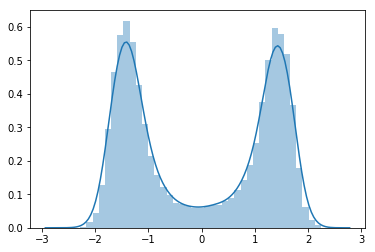

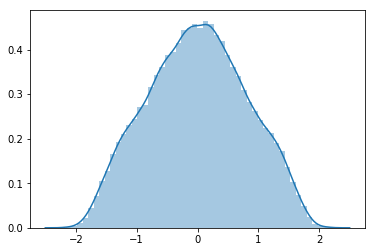

In [161]:

sns.distplot(coefficient_matrix[:, 0])
plt.show()
sns.distplot(coefficient_matrix[:, 1])
plt.show()